# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'contr_r_STD', 'corr_r_Q25'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,contr_r_STD,corr_r_Q25
0,6.824,9.240,1912,784,-0.73,2.58,2.33,360.273487,0.488754
1,8.189,9.622,2005,818,0.59,2.92,2.47,323.958625,0.501683
2,8.380,9.589,2001,818,0.78,2.88,2.44,299.438354,0.540056
3,8.137,9.449,2040,833,0.52,2.72,2.55,319.773395,0.480991
4,7.696,9.401,1758,717,0.22,2.83,2.14,353.104284,0.505257


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   contr_r_STD    103 non-null    float64
 8   corr_r_Q25     103 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 7.4 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_11554/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,contr_r_STD,corr_r_Q25
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,327.115078,0.393571
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,167.617957,0.151801
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,0.091058,0.033797
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,283.887328,0.407228
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,353.034542,0.449670
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,448.017711,0.476635
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,652.546648,0.555648


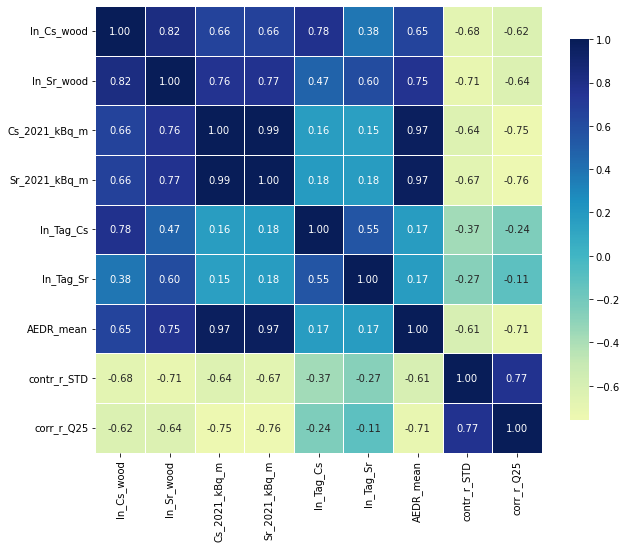

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['AEDR_mean'])
y = pd.DataFrame(select, columns= ['ln_Cs_wood'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,AEDR_mean
0,2.33
1,2.47
2,2.44
3,2.55
4,2.14


In [11]:
# Columns in "y" data collections
y.head()

,ln_Cs_wood
0,6.824
1,8.189
2,8.380
3,8.137
4,7.696


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.7375495684857933, -0.2177762652879911, 0.43755007696174153]
    Mean: -0.173
    Std: 0.481

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.28980737 1.35273198 1.66666644]
    Mean: 1.436
    Std: 0.165

 --------------------
Mean absolute error (MAE): 

    Scores: [1.0638677650451662, 1.2857618251127354, 1.3037095958485323]
    Mean: 1.218
    Std: 0.109

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: -0.409 (std: 0.782)
Parameters: {'colsample_bytree': 0.7920311241988536, 'gamma': 0.30176831353190914, 'learning_rate': 0.17633380636047594, 'max_depth': 2, 'n_estimators': 58, 'subsample': 0.3576401266843401}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.26742725, 0.2956986 , 0.28874688, ..., 0.14961224, 0.13556352,
       0.46483932]), 'std_fit_time': array([0.02511189, 0.03073877, 0.02801747, ..., 0.00413336, 0.00237727,
       0.01332365]), 'mean_score_time': array([0.00586486, 0.00610785, 0.00577087, ..., 0.00573525, 0.00585055,
       0.00569854]), 'std_score_time': array([1.93057050e-04, 2.72436411e-04, 4.51847932e-05, ...,
       2.25324988e-04, 3.31411224e-04, 6.23017629e-05]), 'param_colsample_bytree': masked_array(data=[0.7738880839829019, 0.8900664970954999,
                   0.09166445282198737, ..., 0.45756702762482143,
                   0.4583849752745103, 0.9060173230384198],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.13729015274812512, 0.2879839144994218,
                   0.49148951023233484, ..., 0.12698496087464217,
                   0.4023839581847359, 0.1212748647994843],
    

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7920311241988536
Gamma: 0.30176831353190914
Learning_rate: 0.17633380636047594
Max_depth: 2
N_estimators: 58
Subsample: 0.3576401266843401


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:5.71260	validation_1-rmse:5.15359
[1]	validation_0-rmse:4.83272	validation_1-rmse:4.26716
[2]	validation_0-rmse:4.09370	validation_1-rmse:3.52326
[3]	validation_0-rmse:3.44119	validation_1-rmse:2.91289


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2.93404	validation_1-rmse:2.43492
[5]	validation_0-rmse:2.49605	validation_1-rmse:2.02727
[6]	validation_0-rmse:2.24902	validation_1-rmse:1.78746
[7]	validation_0-rmse:2.01074	validation_1-rmse:1.56510
[8]	validation_0-rmse:1.79059	validation_1-rmse:1.39852
[9]	validation_0-rmse:1.58583	validation_1-rmse:1.25484
[10]	validation_0-rmse:1.44506	validation_1-rmse:1.15136
[11]	validation_0-rmse:1.37332	validation_1-rmse:1.13009
[12]	validation_0-rmse:1.29235	validation_1-rmse:1.08060
[13]	validation_0-rmse:1.19487	validation_1-rmse:1.01987
[14]	validation_0-rmse:1.16202	validation_1-rmse:1.02864
[15]	validation_0-rmse:1.12313	validation_1-rmse:1.02208
[16]	validation_0-rmse:1.08921	validation_1-rmse:0.98909
[17]	validation_0-rmse:1.06232	validation_1-rmse:0.99299
[18]	validation_0-rmse:1.04611	validation_1-rmse:1.00416
[19]	validation_0-rmse:1.03850	validation_1-rmse:1.01313
[20]	validation_0-rmse:1.03933	validation_1-rmse:1.01635
[21]	validation_0-rmse:1.03617	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:3.40853	validation_1-rmse:3.46908
[4]	validation_0-rmse:2.98883	validation_1-rmse:3.04455
[5]	validation_0-rmse:2.57942	validation_1-rmse:2.64957
[6]	validation_0-rmse:2.26814	validation_1-rmse:2.30587
[7]	validation_0-rmse:2.01797	validation_1-rmse:2.02698
[8]	validation_0-rmse:1.81691	validation_1-rmse:1.83933
[9]	validation_0-rmse:1.64441	validation_1-rmse:1.65553
[10]	validation_0-rmse:1.51942	validation_1-rmse:1.54331
[11]	validation_0-rmse:1.36598	validation_1-rmse:1.41043
[12]	validation_0-rmse:1.29248	validation_1-rmse:1.31771
[13]	validation_0-rmse:1.23304	validation_1-rmse:1.23281
[14]	validation_0-rmse:1.18160	validation_1-rmse:1.20821
[15]	validation_0-rmse:1.13054	validation_1-rmse:1.14779
[16]	validation_0-rmse:1.09320	validation_1-rmse:1.11371
[17]	validation_0-rmse:1.05035	validation_1-rmse:1.10433
[18]	validation_0-rmse:1.04071	validation_1-rmse:1.10021
[19]	validation_0-rmse:1.01960	validation_1-rmse:1.09404
[20]	validation_0-rmse:1.00422	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.54355	validation_1-rmse:1.81130
[10]	validation_0-rmse:1.40258	validation_1-rmse:1.64164
[11]	validation_0-rmse:1.31130	validation_1-rmse:1.52542
[12]	validation_0-rmse:1.23501	validation_1-rmse:1.42686
[13]	validation_0-rmse:1.17709	validation_1-rmse:1.34471
[14]	validation_0-rmse:1.12308	validation_1-rmse:1.26959
[15]	validation_0-rmse:1.09999	validation_1-rmse:1.22671
[16]	validation_0-rmse:1.08254	validation_1-rmse:1.17991
[17]	validation_0-rmse:1.04864	validation_1-rmse:1.12974
[18]	validation_0-rmse:1.02840	validation_1-rmse:1.13079
[19]	validation_0-rmse:1.02892	validation_1-rmse:1.13117
[20]	validation_0-rmse:1.02754	validation_1-rmse:1.13478
[21]	validation_0-rmse:1.01452	validation_1-rmse:1.11685
[22]	validation_0-rmse:1.00671	validation_1-rmse:1.11940
[23]	validation_0-rmse:0.99575	validation_1-rmse:1.11647
[24]	validation_0-rmse:0.98966	validation_1-rmse:1.08819
[25]	validation_0-rmse:0.98721	validation_1-rmse:1.06185
[26]	validation_0-rmse:0.97647	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.10739	validation_1-rmse:1.18626
[16]	validation_0-rmse:1.07411	validation_1-rmse:1.18506
[17]	validation_0-rmse:1.03576	validation_1-rmse:1.14744
[18]	validation_0-rmse:1.01869	validation_1-rmse:1.13456
[19]	validation_0-rmse:1.00173	validation_1-rmse:1.10508
[20]	validation_0-rmse:0.99181	validation_1-rmse:1.10955
[21]	validation_0-rmse:0.98074	validation_1-rmse:1.11972
[22]	validation_0-rmse:0.97034	validation_1-rmse:1.12089
[23]	validation_0-rmse:0.97123	validation_1-rmse:1.11723
[24]	validation_0-rmse:0.97882	validation_1-rmse:1.12216
[25]	validation_0-rmse:0.96352	validation_1-rmse:1.10591
[26]	validation_0-rmse:0.95575	validation_1-rmse:1.11997
[27]	validation_0-rmse:0.95173	validation_1-rmse:1.11363
[28]	validation_0-rmse:0.94271	validation_1-rmse:1.10124
[29]	validation_0-rmse:0.94156	validation_1-rmse:1.10154
[30]	validation_0-rmse:0.93820	validation_1-rmse:1.11211
[31]	validation_0-rmse:0.92687	validation_1-rmse:1.13608
[32]	validation_0-rmse:0.92785	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.00753	validation_1-rmse:1.34564
[17]	validation_0-rmse:0.97446	validation_1-rmse:1.34679
[18]	validation_0-rmse:0.96965	validation_1-rmse:1.36562
[19]	validation_0-rmse:0.95097	validation_1-rmse:1.34543
[20]	validation_0-rmse:0.92690	validation_1-rmse:1.34478
[21]	validation_0-rmse:0.91338	validation_1-rmse:1.33213
[22]	validation_0-rmse:0.90345	validation_1-rmse:1.31170
[23]	validation_0-rmse:0.89861	validation_1-rmse:1.31618
[24]	validation_0-rmse:0.89172	validation_1-rmse:1.33047
[25]	validation_0-rmse:0.88665	validation_1-rmse:1.31165
[26]	validation_0-rmse:0.89010	validation_1-rmse:1.34681
[27]	validation_0-rmse:0.89095	validation_1-rmse:1.33003
[28]	validation_0-rmse:0.88375	validation_1-rmse:1.31030
[29]	validation_0-rmse:0.88091	validation_1-rmse:1.32008
[30]	validation_0-rmse:0.88578	validation_1-rmse:1.29974
[31]	validation_0-rmse:0.88391	validation_1-rmse:1.29561
[32]	validation_0-rmse:0.88671	validation_1-rmse:1.30738
[33]	validation_0-rmse:0.88197	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.11202	validation_1-rmse:1.24596
[15]	validation_0-rmse:1.07559	validation_1-rmse:1.23099
[16]	validation_0-rmse:1.06598	validation_1-rmse:1.21126
[17]	validation_0-rmse:1.03349	validation_1-rmse:1.20455
[18]	validation_0-rmse:1.01591	validation_1-rmse:1.17726
[19]	validation_0-rmse:0.99940	validation_1-rmse:1.15971
[20]	validation_0-rmse:0.98619	validation_1-rmse:1.16818
[21]	validation_0-rmse:0.97312	validation_1-rmse:1.20204
[22]	validation_0-rmse:0.96134	validation_1-rmse:1.18703
[23]	validation_0-rmse:0.95959	validation_1-rmse:1.18999
[24]	validation_0-rmse:0.95103	validation_1-rmse:1.16752
[25]	validation_0-rmse:0.95071	validation_1-rmse:1.18391
[26]	validation_0-rmse:0.94921	validation_1-rmse:1.19241
[27]	validation_0-rmse:0.93660	validation_1-rmse:1.20790
[28]	validation_0-rmse:0.93170	validation_1-rmse:1.21109
[29]	validation_0-rmse:0.92597	validation_1-rmse:1.21724
[30]	validation_0-rmse:0.91979	validation_1-rmse:1.20965
[31]	validation_0-rmse:0.91975	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.24767	validation_1-rmse:1.48508
[13]	validation_0-rmse:1.18110	validation_1-rmse:1.42629
[14]	validation_0-rmse:1.14025	validation_1-rmse:1.37961
[15]	validation_0-rmse:1.09228	validation_1-rmse:1.33992
[16]	validation_0-rmse:1.05421	validation_1-rmse:1.31935
[17]	validation_0-rmse:1.02168	validation_1-rmse:1.29076
[18]	validation_0-rmse:0.98885	validation_1-rmse:1.25462
[19]	validation_0-rmse:0.97355	validation_1-rmse:1.27119
[20]	validation_0-rmse:0.96644	validation_1-rmse:1.26746
[21]	validation_0-rmse:0.95803	validation_1-rmse:1.26524
[22]	validation_0-rmse:0.96072	validation_1-rmse:1.26631
[23]	validation_0-rmse:0.95058	validation_1-rmse:1.23247
[24]	validation_0-rmse:0.94866	validation_1-rmse:1.23900
[25]	validation_0-rmse:0.94709	validation_1-rmse:1.23805
[26]	validation_0-rmse:0.94792	validation_1-rmse:1.19760
[27]	validation_0-rmse:0.94276	validation_1-rmse:1.16897
[28]	validation_0-rmse:0.94000	validation_1-rmse:1.16450
[29]	validation_0-rmse:0.93940	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.19705	validation_1-rmse:1.24230
[13]	validation_0-rmse:1.13969	validation_1-rmse:1.22873
[14]	validation_0-rmse:1.08009	validation_1-rmse:1.22236
[15]	validation_0-rmse:1.02201	validation_1-rmse:1.27178
[16]	validation_0-rmse:0.97805	validation_1-rmse:1.27215
[17]	validation_0-rmse:0.94040	validation_1-rmse:1.26934
[18]	validation_0-rmse:0.92502	validation_1-rmse:1.26973
[19]	validation_0-rmse:0.92948	validation_1-rmse:1.26557
[20]	validation_0-rmse:0.92198	validation_1-rmse:1.25660
[21]	validation_0-rmse:0.90747	validation_1-rmse:1.21551
[22]	validation_0-rmse:0.89086	validation_1-rmse:1.26531
[23]	validation_0-rmse:0.87961	validation_1-rmse:1.27485
[24]	validation_0-rmse:0.87485	validation_1-rmse:1.27953
[25]	validation_0-rmse:0.86892	validation_1-rmse:1.30711
[26]	validation_0-rmse:0.86245	validation_1-rmse:1.28651
[27]	validation_0-rmse:0.85632	validation_1-rmse:1.29864
[28]	validation_0-rmse:0.85728	validation_1-rmse:1.31440
[29]	validation_0-rmse:0.85403	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.23599	validation_1-rmse:1.47089
[13]	validation_0-rmse:1.16864	validation_1-rmse:1.45381
[14]	validation_0-rmse:1.13543	validation_1-rmse:1.41821
[15]	validation_0-rmse:1.08252	validation_1-rmse:1.36964
[16]	validation_0-rmse:1.08382	validation_1-rmse:1.38509
[17]	validation_0-rmse:1.05378	validation_1-rmse:1.38221
[18]	validation_0-rmse:1.02132	validation_1-rmse:1.36591
[19]	validation_0-rmse:1.02112	validation_1-rmse:1.40533
[20]	validation_0-rmse:1.00307	validation_1-rmse:1.42419
[21]	validation_0-rmse:0.98444	validation_1-rmse:1.41332
[22]	validation_0-rmse:0.96985	validation_1-rmse:1.39842
[23]	validation_0-rmse:0.95808	validation_1-rmse:1.41098
[24]	validation_0-rmse:0.95505	validation_1-rmse:1.41561
[25]	validation_0-rmse:0.95309	validation_1-rmse:1.42326
[26]	validation_0-rmse:0.94953	validation_1-rmse:1.43523
[27]	validation_0-rmse:0.94669	validation_1-rmse:1.40067
[28]	validation_0-rmse:0.94878	validation_1-rmse:1.40107
[29]	validation_0-rmse:0.93560	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.50059	validation_1-rmse:1.36024
[11]	validation_0-rmse:1.41020	validation_1-rmse:1.23671
[12]	validation_0-rmse:1.33338	validation_1-rmse:1.13788
[13]	validation_0-rmse:1.26466	validation_1-rmse:1.08577
[14]	validation_0-rmse:1.20471	validation_1-rmse:0.99124
[15]	validation_0-rmse:1.15454	validation_1-rmse:0.89418
[16]	validation_0-rmse:1.12213	validation_1-rmse:0.81493
[17]	validation_0-rmse:1.10035	validation_1-rmse:0.80587
[18]	validation_0-rmse:1.08818	validation_1-rmse:0.79706
[19]	validation_0-rmse:1.06372	validation_1-rmse:0.80229
[20]	validation_0-rmse:1.05128	validation_1-rmse:0.76895
[21]	validation_0-rmse:1.03807	validation_1-rmse:0.75617
[22]	validation_0-rmse:1.02982	validation_1-rmse:0.76180
[23]	validation_0-rmse:1.02678	validation_1-rmse:0.73148
[24]	validation_0-rmse:1.01585	validation_1-rmse:0.70096
[25]	validation_0-rmse:1.00483	validation_1-rmse:0.72120
[26]	validation_0-rmse:0.99882	validation_1-rmse:0.74624
[27]	validation_0-rmse:0.99238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.63603	validation_1-rmse:1.89233
[10]	validation_0-rmse:1.52478	validation_1-rmse:1.75524
[11]	validation_0-rmse:1.42588	validation_1-rmse:1.63376
[12]	validation_0-rmse:1.34319	validation_1-rmse:1.51827
[13]	validation_0-rmse:1.25357	validation_1-rmse:1.37996
[14]	validation_0-rmse:1.21969	validation_1-rmse:1.30223
[15]	validation_0-rmse:1.16499	validation_1-rmse:1.22131
[16]	validation_0-rmse:1.12286	validation_1-rmse:1.15675
[17]	validation_0-rmse:1.08319	validation_1-rmse:1.08511
[18]	validation_0-rmse:1.06281	validation_1-rmse:1.06339
[19]	validation_0-rmse:1.03787	validation_1-rmse:1.03360
[20]	validation_0-rmse:1.02981	validation_1-rmse:1.01062
[21]	validation_0-rmse:1.01793	validation_1-rmse:0.99827
[22]	validation_0-rmse:1.00894	validation_1-rmse:0.97351
[23]	validation_0-rmse:1.01145	validation_1-rmse:0.98963
[24]	validation_0-rmse:1.00304	validation_1-rmse:1.03640
[25]	validation_0-rmse:0.99295	validation_1-rmse:1.01482
[26]	validation_0-rmse:0.99979	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97575	validation_1-rmse:1.39033
[18]	validation_0-rmse:0.95329	validation_1-rmse:1.36761
[19]	validation_0-rmse:0.93237	validation_1-rmse:1.34720
[20]	validation_0-rmse:0.91698	validation_1-rmse:1.33729
[21]	validation_0-rmse:0.91149	validation_1-rmse:1.35024
[22]	validation_0-rmse:0.90509	validation_1-rmse:1.36000
[23]	validation_0-rmse:0.90445	validation_1-rmse:1.36293
[24]	validation_0-rmse:0.90483	validation_1-rmse:1.37190
[25]	validation_0-rmse:0.90157	validation_1-rmse:1.36231
[26]	validation_0-rmse:0.89866	validation_1-rmse:1.33378
[27]	validation_0-rmse:0.89424	validation_1-rmse:1.33123
[28]	validation_0-rmse:0.89265	validation_1-rmse:1.36147
[29]	validation_0-rmse:0.88374	validation_1-rmse:1.37252
[30]	validation_0-rmse:0.88351	validation_1-rmse:1.34329
[31]	validation_0-rmse:0.87962	validation_1-rmse:1.33726
[32]	validation_0-rmse:0.86702	validation_1-rmse:1.35906
[33]	validation_0-rmse:0.86851	validation_1-rmse:1.38024
[34]	validation_0-rmse:0.86547	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.12181	validation_1-rmse:1.22690
[16]	validation_0-rmse:1.08655	validation_1-rmse:1.14863
[17]	validation_0-rmse:1.05400	validation_1-rmse:1.13632
[18]	validation_0-rmse:1.04848	validation_1-rmse:1.13165
[19]	validation_0-rmse:1.02371	validation_1-rmse:1.15558
[20]	validation_0-rmse:1.01690	validation_1-rmse:1.12181
[21]	validation_0-rmse:1.00602	validation_1-rmse:1.11330
[22]	validation_0-rmse:0.98710	validation_1-rmse:1.09677
[23]	validation_0-rmse:0.98507	validation_1-rmse:1.05292
[24]	validation_0-rmse:0.97571	validation_1-rmse:1.02991
[25]	validation_0-rmse:0.96236	validation_1-rmse:1.03126
[26]	validation_0-rmse:0.95555	validation_1-rmse:1.04321
[27]	validation_0-rmse:0.95347	validation_1-rmse:1.07639
[28]	validation_0-rmse:0.94221	validation_1-rmse:1.07754
[29]	validation_0-rmse:0.93885	validation_1-rmse:1.08984
[30]	validation_0-rmse:0.93583	validation_1-rmse:1.11321
[31]	validation_0-rmse:0.93162	validation_1-rmse:1.14327
[32]	validation_0-rmse:0.92420	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.10600	validation_1-rmse:1.20622
[15]	validation_0-rmse:1.06945	validation_1-rmse:1.16816
[16]	validation_0-rmse:1.05101	validation_1-rmse:1.15412
[17]	validation_0-rmse:1.02955	validation_1-rmse:1.13093
[18]	validation_0-rmse:1.00379	validation_1-rmse:1.14566
[19]	validation_0-rmse:0.98918	validation_1-rmse:1.13752
[20]	validation_0-rmse:0.98076	validation_1-rmse:1.13831
[21]	validation_0-rmse:0.97129	validation_1-rmse:1.15450
[22]	validation_0-rmse:0.96597	validation_1-rmse:1.14337
[23]	validation_0-rmse:0.96879	validation_1-rmse:1.15491
[24]	validation_0-rmse:0.96635	validation_1-rmse:1.14581
[25]	validation_0-rmse:0.96833	validation_1-rmse:1.14414
[26]	validation_0-rmse:0.96935	validation_1-rmse:1.14247
[27]	validation_0-rmse:0.96223	validation_1-rmse:1.14065
[28]	validation_0-rmse:0.94856	validation_1-rmse:1.13524
[29]	validation_0-rmse:0.93469	validation_1-rmse:1.12484
[30]	validation_0-rmse:0.93586	validation_1-rmse:1.12762
[31]	validation_0-rmse:0.92248	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:4.80063	validation_1-rmse:4.97961
[2]	validation_0-rmse:4.03514	validation_1-rmse:4.24581
[3]	validation_0-rmse:3.44161	validation_1-rmse:3.65862
[4]	validation_0-rmse:2.94605	validation_1-rmse:3.18617
[5]	validation_0-rmse:2.60248	validation_1-rmse:2.85288
[6]	validation_0-rmse:2.26979	validation_1-rmse:2.49387
[7]	validation_0-rmse:2.00528	validation_1-rmse:2.25558
[8]	validation_0-rmse:1.82114	validation_1-rmse:2.04041
[9]	validation_0-rmse:1.64566	validation_1-rmse:1.79289
[10]	validation_0-rmse:1.51007	validation_1-rmse:1.63487
[11]	validation_0-rmse:1.40680	validation_1-rmse:1.49668
[12]	validation_0-rmse:1.31915	validation_1-rmse:1.42097
[13]	validation_0-rmse:1.24191	validation_1-rmse:1.37090
[14]	validation_0-rmse:1.17823	validation_1-rmse:1.27583
[15]	validation_0-rmse:1.13933	validation_1-rmse:1.28190
[16]	validation_0-rmse:1.11408	validation_1-rmse:1.23663
[17]	validation_0-rmse:1.08725	validation_1-rmse:1.23034
[18]	validation_0-rmse:1.05463	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.11622	validation_1-rmse:1.08097
[17]	validation_0-rmse:1.09118	validation_1-rmse:1.07411
[18]	validation_0-rmse:1.06818	validation_1-rmse:1.05627
[19]	validation_0-rmse:1.04722	validation_1-rmse:1.04977
[20]	validation_0-rmse:1.03999	validation_1-rmse:1.04773
[21]	validation_0-rmse:1.02747	validation_1-rmse:1.05423
[22]	validation_0-rmse:1.01563	validation_1-rmse:1.05782
[23]	validation_0-rmse:1.00445	validation_1-rmse:1.03794
[24]	validation_0-rmse:0.99224	validation_1-rmse:1.01634
[25]	validation_0-rmse:0.98174	validation_1-rmse:1.00317
[26]	validation_0-rmse:0.97169	validation_1-rmse:0.98949
[27]	validation_0-rmse:0.96895	validation_1-rmse:0.97904
[28]	validation_0-rmse:0.96800	validation_1-rmse:0.98448
[29]	validation_0-rmse:0.97336	validation_1-rmse:0.97275
[30]	validation_0-rmse:0.97271	validation_1-rmse:0.96425
[31]	validation_0-rmse:0.96057	validation_1-rmse:0.97249
[32]	validation_0-rmse:0.96542	validation_1-rmse:0.97879
[33]	validation_0-rmse:0.95914	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2.98098	validation_1-rmse:3.25841
[5]	validation_0-rmse:2.61116	validation_1-rmse:2.93095
[6]	validation_0-rmse:2.22830	validation_1-rmse:2.52661
[7]	validation_0-rmse:1.96461	validation_1-rmse:2.24696
[8]	validation_0-rmse:1.73288	validation_1-rmse:2.00515
[9]	validation_0-rmse:1.56184	validation_1-rmse:1.82627
[10]	validation_0-rmse:1.42930	validation_1-rmse:1.68525
[11]	validation_0-rmse:1.30003	validation_1-rmse:1.53465
[12]	validation_0-rmse:1.20921	validation_1-rmse:1.42476
[13]	validation_0-rmse:1.13478	validation_1-rmse:1.34565
[14]	validation_0-rmse:1.09555	validation_1-rmse:1.29169
[15]	validation_0-rmse:1.06694	validation_1-rmse:1.26256
[16]	validation_0-rmse:1.03156	validation_1-rmse:1.22235
[17]	validation_0-rmse:1.00511	validation_1-rmse:1.18122
[18]	validation_0-rmse:0.98792	validation_1-rmse:1.15613
[19]	validation_0-rmse:0.98115	validation_1-rmse:1.13770
[20]	validation_0-rmse:0.97966	validation_1-rmse:1.14592
[21]	validation_0-rmse:0.96599	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.43035	validation_1-rmse:1.53564
[12]	validation_0-rmse:1.33331	validation_1-rmse:1.41251
[13]	validation_0-rmse:1.27005	validation_1-rmse:1.35775
[14]	validation_0-rmse:1.21068	validation_1-rmse:1.29331
[15]	validation_0-rmse:1.17539	validation_1-rmse:1.27361
[16]	validation_0-rmse:1.14978	validation_1-rmse:1.24393
[17]	validation_0-rmse:1.11302	validation_1-rmse:1.17799
[18]	validation_0-rmse:1.09786	validation_1-rmse:1.15505
[19]	validation_0-rmse:1.06345	validation_1-rmse:1.08994
[20]	validation_0-rmse:1.04887	validation_1-rmse:1.02920
[21]	validation_0-rmse:1.04328	validation_1-rmse:1.03701
[22]	validation_0-rmse:1.04702	validation_1-rmse:0.99623
[23]	validation_0-rmse:1.03708	validation_1-rmse:0.97645
[24]	validation_0-rmse:1.02962	validation_1-rmse:0.98983
[25]	validation_0-rmse:1.02026	validation_1-rmse:0.96334
[26]	validation_0-rmse:1.01344	validation_1-rmse:0.95737
[27]	validation_0-rmse:1.01357	validation_1-rmse:0.97564
[28]	validation_0-rmse:1.00802	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98655	validation_1-rmse:1.35913
[18]	validation_0-rmse:0.95363	validation_1-rmse:1.36408
[19]	validation_0-rmse:0.93844	validation_1-rmse:1.31826
[20]	validation_0-rmse:0.92222	validation_1-rmse:1.33381
[21]	validation_0-rmse:0.91053	validation_1-rmse:1.34511
[22]	validation_0-rmse:0.90973	validation_1-rmse:1.35213
[23]	validation_0-rmse:0.89972	validation_1-rmse:1.35402
[24]	validation_0-rmse:0.89757	validation_1-rmse:1.38078
[25]	validation_0-rmse:0.89210	validation_1-rmse:1.38870
[26]	validation_0-rmse:0.87582	validation_1-rmse:1.45065
[27]	validation_0-rmse:0.86919	validation_1-rmse:1.41221
[28]	validation_0-rmse:0.86109	validation_1-rmse:1.41478
[29]	validation_0-rmse:0.85952	validation_1-rmse:1.43336
[30]	validation_0-rmse:0.86066	validation_1-rmse:1.46579
[31]	validation_0-rmse:0.85481	validation_1-rmse:1.50420
[32]	validation_0-rmse:0.85193	validation_1-rmse:1.52214
[33]	validation_0-rmse:0.85157	validation_1-rmse:1.52042
[34]	validation_0-rmse:0.84600	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00602	validation_1-rmse:1.06873
[19]	validation_0-rmse:0.99255	validation_1-rmse:1.07968
[20]	validation_0-rmse:0.99060	validation_1-rmse:1.09474
[21]	validation_0-rmse:0.97978	validation_1-rmse:1.12705
[22]	validation_0-rmse:0.99196	validation_1-rmse:1.09348
[23]	validation_0-rmse:0.98162	validation_1-rmse:1.09951
[24]	validation_0-rmse:0.97653	validation_1-rmse:1.09983
[25]	validation_0-rmse:0.96839	validation_1-rmse:1.12095
[26]	validation_0-rmse:0.96311	validation_1-rmse:1.14098
[27]	validation_0-rmse:0.95573	validation_1-rmse:1.15223
[28]	validation_0-rmse:0.95134	validation_1-rmse:1.15688
[29]	validation_0-rmse:0.94966	validation_1-rmse:1.17810
[30]	validation_0-rmse:0.95245	validation_1-rmse:1.17241
[31]	validation_0-rmse:0.95098	validation_1-rmse:1.14721
[32]	validation_0-rmse:0.95868	validation_1-rmse:1.12487
[33]	validation_0-rmse:0.95616	validation_1-rmse:1.13457
[34]	validation_0-rmse:0.94199	validation_1-rmse:1.16378
[35]	validation_0-rmse:0.93670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02147	validation_1-rmse:1.06014
[20]	validation_0-rmse:1.00923	validation_1-rmse:1.05356
[21]	validation_0-rmse:1.00750	validation_1-rmse:1.04714
[22]	validation_0-rmse:1.00329	validation_1-rmse:1.06329
[23]	validation_0-rmse:0.99845	validation_1-rmse:1.05815
[24]	validation_0-rmse:0.99166	validation_1-rmse:1.04852
[25]	validation_0-rmse:0.98892	validation_1-rmse:1.01416
[26]	validation_0-rmse:0.98100	validation_1-rmse:0.99377
[27]	validation_0-rmse:0.97834	validation_1-rmse:1.00997
[28]	validation_0-rmse:0.96603	validation_1-rmse:0.97846
[29]	validation_0-rmse:0.96257	validation_1-rmse:0.97929
[30]	validation_0-rmse:0.95469	validation_1-rmse:0.98796
[31]	validation_0-rmse:0.95295	validation_1-rmse:0.96097
[32]	validation_0-rmse:0.95414	validation_1-rmse:0.98124
[33]	validation_0-rmse:0.95555	validation_1-rmse:0.96737
[34]	validation_0-rmse:0.95121	validation_1-rmse:0.97362
[35]	validation_0-rmse:0.94544	validation_1-rmse:0.97888
[36]	validation_0-rmse:0.94649	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.04552	validation_1-rmse:1.13210
[22]	validation_0-rmse:1.02895	validation_1-rmse:1.14089
[23]	validation_0-rmse:1.00470	validation_1-rmse:1.17366
[24]	validation_0-rmse:0.98635	validation_1-rmse:1.18580
[25]	validation_0-rmse:0.97616	validation_1-rmse:1.18204
[26]	validation_0-rmse:0.97191	validation_1-rmse:1.18268
[27]	validation_0-rmse:0.97179	validation_1-rmse:1.20554
[28]	validation_0-rmse:0.96023	validation_1-rmse:1.16115
[29]	validation_0-rmse:0.95721	validation_1-rmse:1.15571
[30]	validation_0-rmse:0.95953	validation_1-rmse:1.13444
[31]	validation_0-rmse:0.95316	validation_1-rmse:1.15340
[32]	validation_0-rmse:0.94998	validation_1-rmse:1.18842
[33]	validation_0-rmse:0.95182	validation_1-rmse:1.19552
[34]	validation_0-rmse:0.94668	validation_1-rmse:1.19360
[35]	validation_0-rmse:0.94447	validation_1-rmse:1.19033
[36]	validation_0-rmse:0.94214	validation_1-rmse:1.20658
[37]	validation_0-rmse:0.93945	validation_1-rmse:1.19130
[38]	validation_0-rmse:0.94059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.97129	validation_1-rmse:1.25757
[19]	validation_0-rmse:0.96031	validation_1-rmse:1.26631
[20]	validation_0-rmse:0.95132	validation_1-rmse:1.26011
[21]	validation_0-rmse:0.93684	validation_1-rmse:1.23927
[22]	validation_0-rmse:0.93023	validation_1-rmse:1.22699
[23]	validation_0-rmse:0.91517	validation_1-rmse:1.25342
[24]	validation_0-rmse:0.90384	validation_1-rmse:1.28347
[25]	validation_0-rmse:0.90602	validation_1-rmse:1.26041
[26]	validation_0-rmse:0.91455	validation_1-rmse:1.28026
[27]	validation_0-rmse:0.89540	validation_1-rmse:1.28584
[28]	validation_0-rmse:0.88880	validation_1-rmse:1.32383
[29]	validation_0-rmse:0.88405	validation_1-rmse:1.27835
[30]	validation_0-rmse:0.87666	validation_1-rmse:1.30990
[31]	validation_0-rmse:0.87544	validation_1-rmse:1.31145
[32]	validation_0-rmse:0.88438	validation_1-rmse:1.31611
[33]	validation_0-rmse:0.87992	validation_1-rmse:1.32282
[0]	validation_0-rmse:5.73958	validation_1-rmse:5.46960
[1]	validation_0-rmse:4.90169	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.04305	validation_1-rmse:1.23586
[18]	validation_0-rmse:1.02127	validation_1-rmse:1.22268
[19]	validation_0-rmse:1.00130	validation_1-rmse:1.22659
[20]	validation_0-rmse:0.98753	validation_1-rmse:1.20869
[21]	validation_0-rmse:0.97584	validation_1-rmse:1.20638
[22]	validation_0-rmse:0.96785	validation_1-rmse:1.21222
[23]	validation_0-rmse:0.96064	validation_1-rmse:1.18777
[24]	validation_0-rmse:0.95653	validation_1-rmse:1.20947
[25]	validation_0-rmse:0.94867	validation_1-rmse:1.22130
[26]	validation_0-rmse:0.94680	validation_1-rmse:1.21747
[27]	validation_0-rmse:0.94954	validation_1-rmse:1.24407
[28]	validation_0-rmse:0.94940	validation_1-rmse:1.25983
[29]	validation_0-rmse:0.94491	validation_1-rmse:1.24047
[30]	validation_0-rmse:0.94631	validation_1-rmse:1.23599
[31]	validation_0-rmse:0.94235	validation_1-rmse:1.21871
[32]	validation_0-rmse:0.93687	validation_1-rmse:1.22384
[33]	validation_0-rmse:0.93047	validation_1-rmse:1.23576
[34]	validation_0-rmse:0.92795	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.03376	validation_1-rmse:0.95596
[20]	validation_0-rmse:1.01960	validation_1-rmse:0.96184
[21]	validation_0-rmse:1.01821	validation_1-rmse:0.97689
[22]	validation_0-rmse:1.00293	validation_1-rmse:0.94129
[23]	validation_0-rmse:0.98767	validation_1-rmse:0.95132
[24]	validation_0-rmse:0.98698	validation_1-rmse:0.97407
[25]	validation_0-rmse:0.98659	validation_1-rmse:0.92984
[26]	validation_0-rmse:0.97716	validation_1-rmse:0.95363
[27]	validation_0-rmse:0.98176	validation_1-rmse:0.92378
[28]	validation_0-rmse:0.97784	validation_1-rmse:0.91955
[29]	validation_0-rmse:0.96618	validation_1-rmse:0.88315
[30]	validation_0-rmse:0.96687	validation_1-rmse:0.89788
[31]	validation_0-rmse:0.96535	validation_1-rmse:0.91194
[32]	validation_0-rmse:0.96558	validation_1-rmse:0.90516
[33]	validation_0-rmse:0.97075	validation_1-rmse:0.93658
[34]	validation_0-rmse:0.96207	validation_1-rmse:0.94562
[35]	validation_0-rmse:0.97069	validation_1-rmse:0.96194
[36]	validation_0-rmse:0.97065	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01612	validation_1-rmse:1.25433
[21]	validation_0-rmse:1.02412	validation_1-rmse:1.25809
[22]	validation_0-rmse:1.01664	validation_1-rmse:1.24970
[23]	validation_0-rmse:1.00822	validation_1-rmse:1.24669
[24]	validation_0-rmse:0.99152	validation_1-rmse:1.25467
[25]	validation_0-rmse:0.98535	validation_1-rmse:1.23803
[26]	validation_0-rmse:0.98351	validation_1-rmse:1.23277
[27]	validation_0-rmse:0.98518	validation_1-rmse:1.25983
[28]	validation_0-rmse:0.97788	validation_1-rmse:1.27597
[29]	validation_0-rmse:0.96295	validation_1-rmse:1.24310
[30]	validation_0-rmse:0.95473	validation_1-rmse:1.20674
[31]	validation_0-rmse:0.95517	validation_1-rmse:1.20870
[32]	validation_0-rmse:0.96912	validation_1-rmse:1.25525
[33]	validation_0-rmse:0.95295	validation_1-rmse:1.22417
[34]	validation_0-rmse:0.94329	validation_1-rmse:1.21783
[35]	validation_0-rmse:0.93434	validation_1-rmse:1.20164
[36]	validation_0-rmse:0.93104	validation_1-rmse:1.20712
[37]	validation_0-rmse:0.93797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01178	validation_1-rmse:1.18968
[21]	validation_0-rmse:0.99755	validation_1-rmse:1.15000
[22]	validation_0-rmse:0.98630	validation_1-rmse:1.13056
[23]	validation_0-rmse:0.98238	validation_1-rmse:1.12419
[24]	validation_0-rmse:0.97915	validation_1-rmse:1.11243
[25]	validation_0-rmse:0.98142	validation_1-rmse:1.08522
[26]	validation_0-rmse:0.96594	validation_1-rmse:1.11488
[27]	validation_0-rmse:0.96754	validation_1-rmse:1.09256
[28]	validation_0-rmse:0.95546	validation_1-rmse:1.13339
[29]	validation_0-rmse:0.94739	validation_1-rmse:1.15427
[30]	validation_0-rmse:0.94502	validation_1-rmse:1.17483
[31]	validation_0-rmse:0.94181	validation_1-rmse:1.15467
[32]	validation_0-rmse:0.93356	validation_1-rmse:1.19699
[33]	validation_0-rmse:0.93378	validation_1-rmse:1.19688
[34]	validation_0-rmse:0.93346	validation_1-rmse:1.19312
[35]	validation_0-rmse:0.93268	validation_1-rmse:1.19299
[36]	validation_0-rmse:0.92938	validation_1-rmse:1.19329
[37]	validation_0-rmse:0.92246	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02208	validation_1-rmse:1.03818
[20]	validation_0-rmse:1.01794	validation_1-rmse:1.06674
[21]	validation_0-rmse:1.00607	validation_1-rmse:1.03608
[22]	validation_0-rmse:0.99912	validation_1-rmse:1.04077
[23]	validation_0-rmse:0.99608	validation_1-rmse:1.00326
[24]	validation_0-rmse:0.99146	validation_1-rmse:1.01975
[25]	validation_0-rmse:0.98240	validation_1-rmse:0.99471
[26]	validation_0-rmse:0.98498	validation_1-rmse:0.99777
[27]	validation_0-rmse:0.99083	validation_1-rmse:0.99221
[28]	validation_0-rmse:0.98447	validation_1-rmse:0.99477
[29]	validation_0-rmse:0.98123	validation_1-rmse:0.99349
[30]	validation_0-rmse:0.97236	validation_1-rmse:1.03148
[31]	validation_0-rmse:0.96604	validation_1-rmse:1.06522
[32]	validation_0-rmse:0.95669	validation_1-rmse:1.05563
[33]	validation_0-rmse:0.95452	validation_1-rmse:1.02620
[34]	validation_0-rmse:0.95100	validation_1-rmse:1.01464
[35]	validation_0-rmse:0.94851	validation_1-rmse:0.99432
[36]	validation_0-rmse:0.94204	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13550	validation_1-rmse:0.96809
[17]	validation_0-rmse:1.10531	validation_1-rmse:0.94266
[18]	validation_0-rmse:1.07549	validation_1-rmse:0.89757
[19]	validation_0-rmse:1.05315	validation_1-rmse:0.87952
[20]	validation_0-rmse:1.03914	validation_1-rmse:0.90833
[21]	validation_0-rmse:1.01572	validation_1-rmse:0.91281
[22]	validation_0-rmse:1.01054	validation_1-rmse:0.90458
[23]	validation_0-rmse:1.00654	validation_1-rmse:0.89910
[24]	validation_0-rmse:1.00345	validation_1-rmse:0.90289
[25]	validation_0-rmse:0.99359	validation_1-rmse:0.91866
[26]	validation_0-rmse:0.98978	validation_1-rmse:0.93204
[27]	validation_0-rmse:0.98814	validation_1-rmse:0.93013
[28]	validation_0-rmse:0.98428	validation_1-rmse:0.91650
[29]	validation_0-rmse:0.98163	validation_1-rmse:0.91820
[30]	validation_0-rmse:0.98525	validation_1-rmse:0.94446
[31]	validation_0-rmse:0.97987	validation_1-rmse:0.90837
[32]	validation_0-rmse:0.97600	validation_1-rmse:0.90889
[33]	validation_0-rmse:0.97365	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00260	validation_1-rmse:1.15137
[22]	validation_0-rmse:1.00088	validation_1-rmse:1.14939
[23]	validation_0-rmse:0.98806	validation_1-rmse:1.11981
[24]	validation_0-rmse:0.98807	validation_1-rmse:1.09973
[25]	validation_0-rmse:0.98572	validation_1-rmse:1.08606
[26]	validation_0-rmse:0.97892	validation_1-rmse:1.09805
[27]	validation_0-rmse:0.97879	validation_1-rmse:1.10646
[28]	validation_0-rmse:0.97216	validation_1-rmse:1.11197
[29]	validation_0-rmse:0.96841	validation_1-rmse:1.13610
[30]	validation_0-rmse:0.97354	validation_1-rmse:1.13569
[31]	validation_0-rmse:0.98297	validation_1-rmse:1.14604
[32]	validation_0-rmse:0.99001	validation_1-rmse:1.13888
[33]	validation_0-rmse:1.00146	validation_1-rmse:1.14502
[34]	validation_0-rmse:0.98299	validation_1-rmse:1.13624
[35]	validation_0-rmse:0.97880	validation_1-rmse:1.15720
[36]	validation_0-rmse:0.97305	validation_1-rmse:1.17181
[37]	validation_0-rmse:0.96846	validation_1-rmse:1.17209
[38]	validation_0-rmse:0.97335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.95450	validation_1-rmse:1.17782
[21]	validation_0-rmse:0.95184	validation_1-rmse:1.15679
[22]	validation_0-rmse:0.95095	validation_1-rmse:1.14650
[23]	validation_0-rmse:0.94970	validation_1-rmse:1.11168
[24]	validation_0-rmse:0.94336	validation_1-rmse:1.11348
[25]	validation_0-rmse:0.93623	validation_1-rmse:1.11965
[26]	validation_0-rmse:0.93125	validation_1-rmse:1.11207
[27]	validation_0-rmse:0.92121	validation_1-rmse:1.12299
[28]	validation_0-rmse:0.91640	validation_1-rmse:1.11463
[29]	validation_0-rmse:0.91701	validation_1-rmse:1.11683
[30]	validation_0-rmse:0.91416	validation_1-rmse:1.11707
[31]	validation_0-rmse:0.90769	validation_1-rmse:1.09377
[32]	validation_0-rmse:0.91125	validation_1-rmse:1.10059
[33]	validation_0-rmse:0.90393	validation_1-rmse:1.09532
[34]	validation_0-rmse:0.90063	validation_1-rmse:1.09880
[35]	validation_0-rmse:0.89651	validation_1-rmse:1.10786
[36]	validation_0-rmse:0.89584	validation_1-rmse:1.12698
[37]	validation_0-rmse:0.89604	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.92018	validation_1-rmse:1.49435
[22]	validation_0-rmse:0.91713	validation_1-rmse:1.47918
[23]	validation_0-rmse:0.91277	validation_1-rmse:1.47805
[24]	validation_0-rmse:0.91435	validation_1-rmse:1.48293
[25]	validation_0-rmse:0.90567	validation_1-rmse:1.48780
[26]	validation_0-rmse:0.89902	validation_1-rmse:1.51096
[27]	validation_0-rmse:0.89346	validation_1-rmse:1.47362
[28]	validation_0-rmse:0.88023	validation_1-rmse:1.48214
[29]	validation_0-rmse:0.87991	validation_1-rmse:1.47801
[30]	validation_0-rmse:0.87855	validation_1-rmse:1.52540
[31]	validation_0-rmse:0.87702	validation_1-rmse:1.55759
[0]	validation_0-rmse:5.82090	validation_1-rmse:4.85086
[1]	validation_0-rmse:4.92009	validation_1-rmse:4.00600
[2]	validation_0-rmse:4.14406	validation_1-rmse:3.29974
[3]	validation_0-rmse:3.53201	validation_1-rmse:2.71123
[4]	validation_0-rmse:3.10718	validation_1-rmse:2.37005
[5]	validation_0-rmse:2.71967	validation_1-rmse:2.04828
[6]	validation_0-rmse:2.39504	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.05673	validation_1-rmse:0.93655
[22]	validation_0-rmse:1.03839	validation_1-rmse:0.97157
[23]	validation_0-rmse:1.02835	validation_1-rmse:0.95859
[24]	validation_0-rmse:1.01368	validation_1-rmse:0.96167
[25]	validation_0-rmse:1.00801	validation_1-rmse:0.95202
[26]	validation_0-rmse:0.99669	validation_1-rmse:0.95089
[27]	validation_0-rmse:0.99132	validation_1-rmse:0.93995
[28]	validation_0-rmse:0.97847	validation_1-rmse:0.94464
[29]	validation_0-rmse:0.97561	validation_1-rmse:0.96117
[30]	validation_0-rmse:0.97267	validation_1-rmse:0.97199
[31]	validation_0-rmse:0.97715	validation_1-rmse:0.95868
[32]	validation_0-rmse:0.97262	validation_1-rmse:0.93789
[33]	validation_0-rmse:0.96849	validation_1-rmse:0.94546
[34]	validation_0-rmse:0.96892	validation_1-rmse:0.94455
[0]	validation_0-rmse:5.65740	validation_1-rmse:5.72673
[1]	validation_0-rmse:4.83850	validation_1-rmse:4.88488
[2]	validation_0-rmse:4.07381	validation_1-rmse:4.11480
[3]	validation_0-rmse:3.50817	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.03528	validation_1-rmse:1.07668
[18]	validation_0-rmse:1.02099	validation_1-rmse:1.05591
[19]	validation_0-rmse:1.01508	validation_1-rmse:1.07449
[20]	validation_0-rmse:1.00377	validation_1-rmse:1.10561
[21]	validation_0-rmse:0.98422	validation_1-rmse:1.08101
[22]	validation_0-rmse:0.97087	validation_1-rmse:1.11265
[23]	validation_0-rmse:0.96608	validation_1-rmse:1.09719
[24]	validation_0-rmse:0.96299	validation_1-rmse:1.09641
[25]	validation_0-rmse:0.95733	validation_1-rmse:1.10790
[26]	validation_0-rmse:0.95748	validation_1-rmse:1.11735
[27]	validation_0-rmse:0.95159	validation_1-rmse:1.09145
[28]	validation_0-rmse:0.94935	validation_1-rmse:1.09246
[29]	validation_0-rmse:0.95049	validation_1-rmse:1.06890
[30]	validation_0-rmse:0.95057	validation_1-rmse:1.05425
[31]	validation_0-rmse:0.94664	validation_1-rmse:1.06838
[32]	validation_0-rmse:0.94652	validation_1-rmse:1.08973
[33]	validation_0-rmse:0.94430	validation_1-rmse:1.08371
[34]	validation_0-rmse:0.94105	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.97457	validation_1-rmse:1.27786
[21]	validation_0-rmse:0.96040	validation_1-rmse:1.29387
[22]	validation_0-rmse:0.95592	validation_1-rmse:1.24956
[23]	validation_0-rmse:0.95281	validation_1-rmse:1.22580
[24]	validation_0-rmse:0.94546	validation_1-rmse:1.23945
[25]	validation_0-rmse:0.94260	validation_1-rmse:1.25857
[26]	validation_0-rmse:0.94383	validation_1-rmse:1.30585
[27]	validation_0-rmse:0.94283	validation_1-rmse:1.30889
[28]	validation_0-rmse:0.93676	validation_1-rmse:1.26456
[29]	validation_0-rmse:0.94073	validation_1-rmse:1.28213
[30]	validation_0-rmse:0.93015	validation_1-rmse:1.27284
[31]	validation_0-rmse:0.93058	validation_1-rmse:1.29924
[32]	validation_0-rmse:0.92305	validation_1-rmse:1.27154
[33]	validation_0-rmse:0.92060	validation_1-rmse:1.28034
[34]	validation_0-rmse:0.92313	validation_1-rmse:1.29463
[35]	validation_0-rmse:0.92515	validation_1-rmse:1.35039
[36]	validation_0-rmse:0.92385	validation_1-rmse:1.32004
[37]	validation_0-rmse:0.92688	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.94374	validation_1-rmse:1.36327
[20]	validation_0-rmse:0.93057	validation_1-rmse:1.33474
[21]	validation_0-rmse:0.91789	validation_1-rmse:1.31957
[22]	validation_0-rmse:0.90746	validation_1-rmse:1.30946
[23]	validation_0-rmse:0.89270	validation_1-rmse:1.29012
[24]	validation_0-rmse:0.89008	validation_1-rmse:1.31892
[25]	validation_0-rmse:0.89293	validation_1-rmse:1.33484
[26]	validation_0-rmse:0.88557	validation_1-rmse:1.31721
[27]	validation_0-rmse:0.89144	validation_1-rmse:1.33675
[28]	validation_0-rmse:0.87927	validation_1-rmse:1.29153
[29]	validation_0-rmse:0.87458	validation_1-rmse:1.27711
[30]	validation_0-rmse:0.87608	validation_1-rmse:1.27878
[31]	validation_0-rmse:0.87698	validation_1-rmse:1.25965
[32]	validation_0-rmse:0.87552	validation_1-rmse:1.23134
[33]	validation_0-rmse:0.87211	validation_1-rmse:1.23128
[34]	validation_0-rmse:0.86346	validation_1-rmse:1.25396
[35]	validation_0-rmse:0.85811	validation_1-rmse:1.26286
[36]	validation_0-rmse:0.85692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.98807	validation_1-rmse:1.19441
[20]	validation_0-rmse:0.97295	validation_1-rmse:1.19643
[21]	validation_0-rmse:0.95247	validation_1-rmse:1.19195
[22]	validation_0-rmse:0.94456	validation_1-rmse:1.22579
[23]	validation_0-rmse:0.92889	validation_1-rmse:1.23494
[24]	validation_0-rmse:0.92015	validation_1-rmse:1.24084
[25]	validation_0-rmse:0.91019	validation_1-rmse:1.23303
[26]	validation_0-rmse:0.90527	validation_1-rmse:1.21114
[27]	validation_0-rmse:0.90315	validation_1-rmse:1.21282
[28]	validation_0-rmse:0.89661	validation_1-rmse:1.21686
[29]	validation_0-rmse:0.88922	validation_1-rmse:1.24514
[30]	validation_0-rmse:0.88320	validation_1-rmse:1.25861
[31]	validation_0-rmse:0.88371	validation_1-rmse:1.25914
[32]	validation_0-rmse:0.87965	validation_1-rmse:1.27892
[33]	validation_0-rmse:0.87718	validation_1-rmse:1.26115
[34]	validation_0-rmse:0.87417	validation_1-rmse:1.25796
[35]	validation_0-rmse:0.87876	validation_1-rmse:1.24440
[36]	validation_0-rmse:0.87693	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.93103	validation_1-rmse:1.27478
[21]	validation_0-rmse:0.92020	validation_1-rmse:1.25254
[22]	validation_0-rmse:0.91877	validation_1-rmse:1.23441
[23]	validation_0-rmse:0.90870	validation_1-rmse:1.22721
[24]	validation_0-rmse:0.90107	validation_1-rmse:1.22054
[25]	validation_0-rmse:0.89289	validation_1-rmse:1.23299
[26]	validation_0-rmse:0.88653	validation_1-rmse:1.23409
[27]	validation_0-rmse:0.88080	validation_1-rmse:1.25307
[28]	validation_0-rmse:0.87551	validation_1-rmse:1.26954
[29]	validation_0-rmse:0.87713	validation_1-rmse:1.27965
[30]	validation_0-rmse:0.87491	validation_1-rmse:1.27989
[31]	validation_0-rmse:0.88149	validation_1-rmse:1.27449
[32]	validation_0-rmse:0.87930	validation_1-rmse:1.29085
[33]	validation_0-rmse:0.87786	validation_1-rmse:1.29021
[34]	validation_0-rmse:0.87112	validation_1-rmse:1.30045
[35]	validation_0-rmse:0.87152	validation_1-rmse:1.29775
[36]	validation_0-rmse:0.87951	validation_1-rmse:1.31335
[37]	validation_0-rmse:0.86919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.05687	validation_1-rmse:1.34112
[21]	validation_0-rmse:1.03759	validation_1-rmse:1.29282
[22]	validation_0-rmse:1.03728	validation_1-rmse:1.31045
[23]	validation_0-rmse:1.02605	validation_1-rmse:1.28656
[24]	validation_0-rmse:1.01513	validation_1-rmse:1.21879
[25]	validation_0-rmse:1.01606	validation_1-rmse:1.22679
[26]	validation_0-rmse:1.02102	validation_1-rmse:1.24958
[27]	validation_0-rmse:0.99954	validation_1-rmse:1.19544
[28]	validation_0-rmse:0.99230	validation_1-rmse:1.16998
[29]	validation_0-rmse:0.98579	validation_1-rmse:1.15361
[30]	validation_0-rmse:0.97535	validation_1-rmse:1.13429
[31]	validation_0-rmse:0.97315	validation_1-rmse:1.12898
[32]	validation_0-rmse:0.97042	validation_1-rmse:1.11868
[33]	validation_0-rmse:0.96876	validation_1-rmse:1.09546
[34]	validation_0-rmse:0.96872	validation_1-rmse:1.09679
[35]	validation_0-rmse:0.97877	validation_1-rmse:1.11995
[36]	validation_0-rmse:0.97792	validation_1-rmse:1.10736
[37]	validation_0-rmse:0.97537	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.91669	validation_1-rmse:1.28794
[23]	validation_0-rmse:0.90724	validation_1-rmse:1.28168
[24]	validation_0-rmse:0.89999	validation_1-rmse:1.31912
[25]	validation_0-rmse:0.90053	validation_1-rmse:1.28817
[26]	validation_0-rmse:0.89928	validation_1-rmse:1.29392
[27]	validation_0-rmse:0.89846	validation_1-rmse:1.29368
[28]	validation_0-rmse:0.89664	validation_1-rmse:1.28327
[29]	validation_0-rmse:0.89678	validation_1-rmse:1.28452
[30]	validation_0-rmse:0.89435	validation_1-rmse:1.28463
[31]	validation_0-rmse:0.88567	validation_1-rmse:1.28800
[32]	validation_0-rmse:0.88284	validation_1-rmse:1.29829
[33]	validation_0-rmse:0.87979	validation_1-rmse:1.30267
[34]	validation_0-rmse:0.87829	validation_1-rmse:1.33160
[0]	validation_0-rmse:5.70130	validation_1-rmse:5.37997
[1]	validation_0-rmse:4.80980	validation_1-rmse:4.48693
[2]	validation_0-rmse:4.00099	validation_1-rmse:3.66526
[3]	validation_0-rmse:3.44523	validation_1-rmse:3.09701
[4]	validation_0-rmse:3.00650	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99218	validation_1-rmse:1.16793
[21]	validation_0-rmse:0.99586	validation_1-rmse:1.17540
[22]	validation_0-rmse:0.98335	validation_1-rmse:1.18300
[23]	validation_0-rmse:0.95997	validation_1-rmse:1.18391
[24]	validation_0-rmse:0.95477	validation_1-rmse:1.19074
[25]	validation_0-rmse:0.95041	validation_1-rmse:1.19931
[26]	validation_0-rmse:0.94452	validation_1-rmse:1.18779
[27]	validation_0-rmse:0.93760	validation_1-rmse:1.18808
[28]	validation_0-rmse:0.93647	validation_1-rmse:1.17630
[29]	validation_0-rmse:0.93453	validation_1-rmse:1.17115
[30]	validation_0-rmse:0.93323	validation_1-rmse:1.15727
[31]	validation_0-rmse:0.93104	validation_1-rmse:1.14566
[32]	validation_0-rmse:0.92363	validation_1-rmse:1.15346
[33]	validation_0-rmse:0.92310	validation_1-rmse:1.15881
[34]	validation_0-rmse:0.92103	validation_1-rmse:1.17922
[35]	validation_0-rmse:0.91751	validation_1-rmse:1.18118
[36]	validation_0-rmse:0.91586	validation_1-rmse:1.16322
[37]	validation_0-rmse:0.91481	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95131	validation_1-rmse:1.02890
[22]	validation_0-rmse:0.94041	validation_1-rmse:1.01757
[23]	validation_0-rmse:0.92712	validation_1-rmse:1.01373
[24]	validation_0-rmse:0.92504	validation_1-rmse:1.02867
[25]	validation_0-rmse:0.92555	validation_1-rmse:1.03228
[26]	validation_0-rmse:0.92267	validation_1-rmse:1.02506
[27]	validation_0-rmse:0.91120	validation_1-rmse:1.06051
[28]	validation_0-rmse:0.90271	validation_1-rmse:1.07350
[29]	validation_0-rmse:0.90526	validation_1-rmse:1.08346
[30]	validation_0-rmse:0.90255	validation_1-rmse:1.07752
[31]	validation_0-rmse:0.89714	validation_1-rmse:1.08361
[32]	validation_0-rmse:0.89444	validation_1-rmse:1.07033
[33]	validation_0-rmse:0.89075	validation_1-rmse:1.05915
[34]	validation_0-rmse:0.88592	validation_1-rmse:1.09396
[35]	validation_0-rmse:0.88771	validation_1-rmse:1.09760
[36]	validation_0-rmse:0.88831	validation_1-rmse:1.09649
[37]	validation_0-rmse:0.89020	validation_1-rmse:1.12299
[38]	validation_0-rmse:0.89001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.17913	validation_1-rmse:1.26134
[15]	validation_0-rmse:1.12930	validation_1-rmse:1.21659
[16]	validation_0-rmse:1.09667	validation_1-rmse:1.18954
[17]	validation_0-rmse:1.05218	validation_1-rmse:1.18870
[18]	validation_0-rmse:1.04401	validation_1-rmse:1.19520
[19]	validation_0-rmse:1.01368	validation_1-rmse:1.19041
[20]	validation_0-rmse:1.00292	validation_1-rmse:1.19336
[21]	validation_0-rmse:1.01193	validation_1-rmse:1.19211
[22]	validation_0-rmse:0.98696	validation_1-rmse:1.19608
[23]	validation_0-rmse:0.98202	validation_1-rmse:1.19041
[24]	validation_0-rmse:0.96012	validation_1-rmse:1.21614
[25]	validation_0-rmse:0.93962	validation_1-rmse:1.21367
[26]	validation_0-rmse:0.94332	validation_1-rmse:1.21393
[27]	validation_0-rmse:0.94811	validation_1-rmse:1.21907
[28]	validation_0-rmse:0.94449	validation_1-rmse:1.21322
[29]	validation_0-rmse:0.93379	validation_1-rmse:1.21961
[30]	validation_0-rmse:0.93171	validation_1-rmse:1.23251
[31]	validation_0-rmse:0.92254	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01366	validation_1-rmse:0.99252
[21]	validation_0-rmse:1.00566	validation_1-rmse:0.99156
[22]	validation_0-rmse:0.99620	validation_1-rmse:0.99571
[23]	validation_0-rmse:0.98894	validation_1-rmse:1.02085
[24]	validation_0-rmse:0.97949	validation_1-rmse:1.03696
[25]	validation_0-rmse:0.97059	validation_1-rmse:1.01812
[26]	validation_0-rmse:0.97798	validation_1-rmse:0.99928
[27]	validation_0-rmse:0.96211	validation_1-rmse:1.00633
[28]	validation_0-rmse:0.95716	validation_1-rmse:1.00848
[29]	validation_0-rmse:0.95372	validation_1-rmse:1.02398
[30]	validation_0-rmse:0.94297	validation_1-rmse:1.03487
[31]	validation_0-rmse:0.94302	validation_1-rmse:1.03615
[32]	validation_0-rmse:0.93906	validation_1-rmse:1.06632
[33]	validation_0-rmse:0.93620	validation_1-rmse:1.06835
[34]	validation_0-rmse:0.93280	validation_1-rmse:1.06663
[35]	validation_0-rmse:0.93044	validation_1-rmse:1.08086
[36]	validation_0-rmse:0.93310	validation_1-rmse:1.10933
[37]	validation_0-rmse:0.92367	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.01376	validation_1-rmse:1.12798
[22]	validation_0-rmse:1.00545	validation_1-rmse:1.10112
[23]	validation_0-rmse:0.99763	validation_1-rmse:1.10811
[24]	validation_0-rmse:0.98454	validation_1-rmse:1.08771
[25]	validation_0-rmse:0.97642	validation_1-rmse:1.06071
[26]	validation_0-rmse:0.97031	validation_1-rmse:1.06958
[27]	validation_0-rmse:0.95866	validation_1-rmse:1.07092
[28]	validation_0-rmse:0.95468	validation_1-rmse:1.09218
[29]	validation_0-rmse:0.95257	validation_1-rmse:1.09651
[30]	validation_0-rmse:0.94654	validation_1-rmse:1.10229
[31]	validation_0-rmse:0.94462	validation_1-rmse:1.11157
[32]	validation_0-rmse:0.94609	validation_1-rmse:1.13683
[33]	validation_0-rmse:0.93972	validation_1-rmse:1.16242
[34]	validation_0-rmse:0.92687	validation_1-rmse:1.16057
[35]	validation_0-rmse:0.92428	validation_1-rmse:1.13542
[36]	validation_0-rmse:0.92615	validation_1-rmse:1.17335
[37]	validation_0-rmse:0.92737	validation_1-rmse:1.17368
[38]	validation_0-rmse:0.92196	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.98248	validation_1-rmse:1.35389
[20]	validation_0-rmse:0.96827	validation_1-rmse:1.35951
[21]	validation_0-rmse:0.95674	validation_1-rmse:1.39026
[22]	validation_0-rmse:0.95456	validation_1-rmse:1.39829
[23]	validation_0-rmse:0.94651	validation_1-rmse:1.38442
[24]	validation_0-rmse:0.95107	validation_1-rmse:1.39198
[25]	validation_0-rmse:0.94240	validation_1-rmse:1.40690
[26]	validation_0-rmse:0.93445	validation_1-rmse:1.41082
[27]	validation_0-rmse:0.93153	validation_1-rmse:1.42097
[28]	validation_0-rmse:0.92352	validation_1-rmse:1.40756
[29]	validation_0-rmse:0.92422	validation_1-rmse:1.40580
[30]	validation_0-rmse:0.91964	validation_1-rmse:1.43029
[31]	validation_0-rmse:0.91337	validation_1-rmse:1.47221
[32]	validation_0-rmse:0.90730	validation_1-rmse:1.41835
[33]	validation_0-rmse:0.90078	validation_1-rmse:1.44159
[34]	validation_0-rmse:0.90256	validation_1-rmse:1.45987
[35]	validation_0-rmse:0.90516	validation_1-rmse:1.48707
[36]	validation_0-rmse:0.89698	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98565	validation_1-rmse:1.06328
[21]	validation_0-rmse:0.96657	validation_1-rmse:1.05337
[22]	validation_0-rmse:0.96352	validation_1-rmse:1.05188
[23]	validation_0-rmse:0.95975	validation_1-rmse:1.04901
[24]	validation_0-rmse:0.95545	validation_1-rmse:1.03310
[25]	validation_0-rmse:0.95379	validation_1-rmse:1.03825
[26]	validation_0-rmse:0.95561	validation_1-rmse:1.03781
[27]	validation_0-rmse:0.95004	validation_1-rmse:1.02847
[28]	validation_0-rmse:0.93884	validation_1-rmse:1.03074
[29]	validation_0-rmse:0.93258	validation_1-rmse:1.04681
[30]	validation_0-rmse:0.93463	validation_1-rmse:1.04208
[31]	validation_0-rmse:0.92942	validation_1-rmse:1.03404
[32]	validation_0-rmse:0.92465	validation_1-rmse:1.02327
[33]	validation_0-rmse:0.91747	validation_1-rmse:1.03423
[34]	validation_0-rmse:0.91520	validation_1-rmse:1.03066
[35]	validation_0-rmse:0.92207	validation_1-rmse:1.02338
[36]	validation_0-rmse:0.91667	validation_1-rmse:1.02545
[37]	validation_0-rmse:0.91116	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04137	validation_1-rmse:1.13442
[19]	validation_0-rmse:1.03367	validation_1-rmse:1.09312
[20]	validation_0-rmse:1.02222	validation_1-rmse:1.05613
[21]	validation_0-rmse:1.01769	validation_1-rmse:1.05904
[22]	validation_0-rmse:1.00738	validation_1-rmse:1.06366
[23]	validation_0-rmse:1.00304	validation_1-rmse:1.03090
[24]	validation_0-rmse:0.99627	validation_1-rmse:1.00186
[25]	validation_0-rmse:0.99213	validation_1-rmse:1.00684
[26]	validation_0-rmse:0.98263	validation_1-rmse:1.00141
[27]	validation_0-rmse:0.97555	validation_1-rmse:0.99790
[28]	validation_0-rmse:0.96919	validation_1-rmse:0.97707
[29]	validation_0-rmse:0.96994	validation_1-rmse:1.00491
[30]	validation_0-rmse:0.96270	validation_1-rmse:0.99273
[31]	validation_0-rmse:0.96320	validation_1-rmse:0.97054
[32]	validation_0-rmse:0.96331	validation_1-rmse:0.95162
[33]	validation_0-rmse:0.96137	validation_1-rmse:0.94644
[34]	validation_0-rmse:0.95694	validation_1-rmse:0.94243
[35]	validation_0-rmse:0.95761	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98287	validation_1-rmse:1.29153
[21]	validation_0-rmse:0.98247	validation_1-rmse:1.28091
[22]	validation_0-rmse:0.97213	validation_1-rmse:1.28816
[23]	validation_0-rmse:0.96080	validation_1-rmse:1.26557
[24]	validation_0-rmse:0.94816	validation_1-rmse:1.28368
[25]	validation_0-rmse:0.93727	validation_1-rmse:1.30133
[26]	validation_0-rmse:0.91929	validation_1-rmse:1.30491
[27]	validation_0-rmse:0.91708	validation_1-rmse:1.31362
[28]	validation_0-rmse:0.89580	validation_1-rmse:1.32120
[29]	validation_0-rmse:0.89985	validation_1-rmse:1.33675
[30]	validation_0-rmse:0.89669	validation_1-rmse:1.34553
[31]	validation_0-rmse:0.88927	validation_1-rmse:1.35653
[32]	validation_0-rmse:0.89319	validation_1-rmse:1.34432
[33]	validation_0-rmse:0.88715	validation_1-rmse:1.34891
[34]	validation_0-rmse:0.87258	validation_1-rmse:1.33922
[35]	validation_0-rmse:0.87465	validation_1-rmse:1.34465
[36]	validation_0-rmse:0.86819	validation_1-rmse:1.35040
[37]	validation_0-rmse:0.86723	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00414	validation_1-rmse:1.06480
[19]	validation_0-rmse:0.99713	validation_1-rmse:1.07419
[20]	validation_0-rmse:0.98519	validation_1-rmse:1.07406
[21]	validation_0-rmse:0.97079	validation_1-rmse:1.10108
[22]	validation_0-rmse:0.96329	validation_1-rmse:1.07962
[23]	validation_0-rmse:0.96577	validation_1-rmse:1.06931
[24]	validation_0-rmse:0.96885	validation_1-rmse:1.06054
[25]	validation_0-rmse:0.96398	validation_1-rmse:1.05431
[26]	validation_0-rmse:0.95844	validation_1-rmse:1.06022
[27]	validation_0-rmse:0.95176	validation_1-rmse:1.07020
[28]	validation_0-rmse:0.94133	validation_1-rmse:1.06815
[29]	validation_0-rmse:0.93577	validation_1-rmse:1.09184
[30]	validation_0-rmse:0.92931	validation_1-rmse:1.09568
[31]	validation_0-rmse:0.92237	validation_1-rmse:1.09130
[32]	validation_0-rmse:0.92030	validation_1-rmse:1.09444
[33]	validation_0-rmse:0.92076	validation_1-rmse:1.09203
[34]	validation_0-rmse:0.91557	validation_1-rmse:1.08508
[35]	validation_0-rmse:0.91884	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.96244	validation_1-rmse:1.14658
[20]	validation_0-rmse:0.95023	validation_1-rmse:1.14375
[21]	validation_0-rmse:0.94269	validation_1-rmse:1.13474
[22]	validation_0-rmse:0.93409	validation_1-rmse:1.11448
[23]	validation_0-rmse:0.93287	validation_1-rmse:1.13481
[24]	validation_0-rmse:0.93131	validation_1-rmse:1.14508
[25]	validation_0-rmse:0.93807	validation_1-rmse:1.12804
[26]	validation_0-rmse:0.93209	validation_1-rmse:1.14625
[27]	validation_0-rmse:0.91863	validation_1-rmse:1.16829
[28]	validation_0-rmse:0.91428	validation_1-rmse:1.20020
[29]	validation_0-rmse:0.91159	validation_1-rmse:1.20725
[30]	validation_0-rmse:0.91458	validation_1-rmse:1.20979
[31]	validation_0-rmse:0.90616	validation_1-rmse:1.19968
[32]	validation_0-rmse:0.90975	validation_1-rmse:1.22327
[33]	validation_0-rmse:0.91181	validation_1-rmse:1.25543
[34]	validation_0-rmse:0.90370	validation_1-rmse:1.25576
[35]	validation_0-rmse:0.89854	validation_1-rmse:1.25002
[36]	validation_0-rmse:0.89640	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.24582	validation_1-rmse:1.35262
[13]	validation_0-rmse:1.18670	validation_1-rmse:1.27187
[14]	validation_0-rmse:1.15223	validation_1-rmse:1.26553
[15]	validation_0-rmse:1.10368	validation_1-rmse:1.19451
[16]	validation_0-rmse:1.07466	validation_1-rmse:1.15703
[17]	validation_0-rmse:1.04626	validation_1-rmse:1.15176
[18]	validation_0-rmse:1.02109	validation_1-rmse:1.13026
[19]	validation_0-rmse:1.00754	validation_1-rmse:1.11438
[20]	validation_0-rmse:0.99235	validation_1-rmse:1.10384
[21]	validation_0-rmse:0.98461	validation_1-rmse:1.13374
[22]	validation_0-rmse:0.97911	validation_1-rmse:1.11359
[23]	validation_0-rmse:0.97731	validation_1-rmse:1.13186
[24]	validation_0-rmse:0.97377	validation_1-rmse:1.16553
[25]	validation_0-rmse:0.96528	validation_1-rmse:1.14660
[26]	validation_0-rmse:0.95826	validation_1-rmse:1.16655
[27]	validation_0-rmse:0.95008	validation_1-rmse:1.15070
[28]	validation_0-rmse:0.94279	validation_1-rmse:1.16683
[29]	validation_0-rmse:0.94251	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04387	validation_1-rmse:1.04118
[20]	validation_0-rmse:1.03202	validation_1-rmse:1.04169
[21]	validation_0-rmse:1.02114	validation_1-rmse:1.07094
[22]	validation_0-rmse:1.02011	validation_1-rmse:1.07441
[23]	validation_0-rmse:1.00548	validation_1-rmse:1.05711
[24]	validation_0-rmse:0.99257	validation_1-rmse:1.01897
[25]	validation_0-rmse:0.98899	validation_1-rmse:1.02892
[26]	validation_0-rmse:0.98637	validation_1-rmse:1.03203
[27]	validation_0-rmse:0.98254	validation_1-rmse:1.04735
[28]	validation_0-rmse:0.96881	validation_1-rmse:1.05239
[29]	validation_0-rmse:0.97067	validation_1-rmse:1.09660
[30]	validation_0-rmse:0.96399	validation_1-rmse:1.11043
[31]	validation_0-rmse:0.96809	validation_1-rmse:1.12361
[32]	validation_0-rmse:0.97343	validation_1-rmse:1.14496
[33]	validation_0-rmse:0.96570	validation_1-rmse:1.12222
[34]	validation_0-rmse:0.96098	validation_1-rmse:1.11867
[35]	validation_0-rmse:0.97255	validation_1-rmse:1.16872
[36]	validation_0-rmse:0.96754	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00057	validation_1-rmse:1.15123
[21]	validation_0-rmse:1.00151	validation_1-rmse:1.13519
[22]	validation_0-rmse:0.99806	validation_1-rmse:1.12690
[23]	validation_0-rmse:0.99711	validation_1-rmse:1.13294
[24]	validation_0-rmse:0.98627	validation_1-rmse:1.12370
[25]	validation_0-rmse:0.96896	validation_1-rmse:1.11369
[26]	validation_0-rmse:0.95858	validation_1-rmse:1.08900
[27]	validation_0-rmse:0.96204	validation_1-rmse:1.09605
[28]	validation_0-rmse:0.94762	validation_1-rmse:1.09450
[29]	validation_0-rmse:0.94400	validation_1-rmse:1.11445
[30]	validation_0-rmse:0.94217	validation_1-rmse:1.10922
[31]	validation_0-rmse:0.94221	validation_1-rmse:1.10300
[32]	validation_0-rmse:0.93898	validation_1-rmse:1.07961
[33]	validation_0-rmse:0.94467	validation_1-rmse:1.07389
[34]	validation_0-rmse:0.94613	validation_1-rmse:1.08756
[35]	validation_0-rmse:0.94392	validation_1-rmse:1.09179
[36]	validation_0-rmse:0.93345	validation_1-rmse:1.11978
[37]	validation_0-rmse:0.93158	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.03414	validation_1-rmse:1.25817
[18]	validation_0-rmse:1.02036	validation_1-rmse:1.26254
[19]	validation_0-rmse:1.00042	validation_1-rmse:1.18982
[20]	validation_0-rmse:0.98144	validation_1-rmse:1.19305
[21]	validation_0-rmse:0.98212	validation_1-rmse:1.24169
[22]	validation_0-rmse:0.97495	validation_1-rmse:1.25912
[23]	validation_0-rmse:0.97163	validation_1-rmse:1.22477
[24]	validation_0-rmse:0.96851	validation_1-rmse:1.20053
[25]	validation_0-rmse:0.96930	validation_1-rmse:1.23231
[26]	validation_0-rmse:0.97105	validation_1-rmse:1.25490
[27]	validation_0-rmse:0.96339	validation_1-rmse:1.26426
[28]	validation_0-rmse:0.96039	validation_1-rmse:1.27083
[29]	validation_0-rmse:0.95614	validation_1-rmse:1.28823
[30]	validation_0-rmse:0.95973	validation_1-rmse:1.30937
[31]	validation_0-rmse:0.95723	validation_1-rmse:1.28247
[32]	validation_0-rmse:0.96223	validation_1-rmse:1.30897
[33]	validation_0-rmse:0.95599	validation_1-rmse:1.28997
[34]	validation_0-rmse:0.94481	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.95459	validation_1-rmse:1.21178
[21]	validation_0-rmse:0.93606	validation_1-rmse:1.19841
[22]	validation_0-rmse:0.93611	validation_1-rmse:1.22443
[23]	validation_0-rmse:0.92167	validation_1-rmse:1.19569
[24]	validation_0-rmse:0.91368	validation_1-rmse:1.20901
[25]	validation_0-rmse:0.91270	validation_1-rmse:1.20658
[26]	validation_0-rmse:0.90650	validation_1-rmse:1.19882
[27]	validation_0-rmse:0.91120	validation_1-rmse:1.20007
[28]	validation_0-rmse:0.89705	validation_1-rmse:1.20956
[29]	validation_0-rmse:0.88732	validation_1-rmse:1.20845
[30]	validation_0-rmse:0.88661	validation_1-rmse:1.21801
[31]	validation_0-rmse:0.88670	validation_1-rmse:1.22316
[32]	validation_0-rmse:0.87517	validation_1-rmse:1.23050
[33]	validation_0-rmse:0.86806	validation_1-rmse:1.22823
[34]	validation_0-rmse:0.86930	validation_1-rmse:1.22141
[35]	validation_0-rmse:0.86435	validation_1-rmse:1.21899
[36]	validation_0-rmse:0.86586	validation_1-rmse:1.22685
[37]	validation_0-rmse:0.86811	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.96468	validation_1-rmse:1.18549
[22]	validation_0-rmse:0.95046	validation_1-rmse:1.20760
[23]	validation_0-rmse:0.93564	validation_1-rmse:1.21423
[24]	validation_0-rmse:0.93045	validation_1-rmse:1.22306
[25]	validation_0-rmse:0.92590	validation_1-rmse:1.24323
[26]	validation_0-rmse:0.91948	validation_1-rmse:1.26236
[27]	validation_0-rmse:0.91672	validation_1-rmse:1.27285
[28]	validation_0-rmse:0.91494	validation_1-rmse:1.26601
[29]	validation_0-rmse:0.92196	validation_1-rmse:1.28183
[30]	validation_0-rmse:0.91991	validation_1-rmse:1.28167
[31]	validation_0-rmse:0.90981	validation_1-rmse:1.27102
[32]	validation_0-rmse:0.91299	validation_1-rmse:1.29092
[33]	validation_0-rmse:0.90579	validation_1-rmse:1.29450
[34]	validation_0-rmse:0.89893	validation_1-rmse:1.28357
[35]	validation_0-rmse:0.89948	validation_1-rmse:1.25878
[36]	validation_0-rmse:0.89392	validation_1-rmse:1.26018
[37]	validation_0-rmse:0.88715	validation_1-rmse:1.25185
[0]	validation_0-rmse:5.71089	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99079	validation_1-rmse:1.04615
[21]	validation_0-rmse:0.97969	validation_1-rmse:1.01807
[22]	validation_0-rmse:0.97939	validation_1-rmse:1.01940
[23]	validation_0-rmse:0.97112	validation_1-rmse:1.02248
[24]	validation_0-rmse:0.96607	validation_1-rmse:1.03819
[25]	validation_0-rmse:0.95717	validation_1-rmse:1.03055
[26]	validation_0-rmse:0.96610	validation_1-rmse:1.01210
[27]	validation_0-rmse:0.96677	validation_1-rmse:1.01173
[28]	validation_0-rmse:0.95946	validation_1-rmse:0.99330
[29]	validation_0-rmse:0.95524	validation_1-rmse:0.98937
[30]	validation_0-rmse:0.94646	validation_1-rmse:0.97176
[31]	validation_0-rmse:0.94334	validation_1-rmse:0.96133
[32]	validation_0-rmse:0.94086	validation_1-rmse:0.97762
[33]	validation_0-rmse:0.93110	validation_1-rmse:0.99503
[34]	validation_0-rmse:0.91931	validation_1-rmse:1.00838
[35]	validation_0-rmse:0.91281	validation_1-rmse:1.04421
[36]	validation_0-rmse:0.91597	validation_1-rmse:1.04707
[37]	validation_0-rmse:0.91089	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93780	validation_1-rmse:1.17410
[22]	validation_0-rmse:0.92923	validation_1-rmse:1.25612
[23]	validation_0-rmse:0.93005	validation_1-rmse:1.26546
[24]	validation_0-rmse:0.92415	validation_1-rmse:1.21211
[25]	validation_0-rmse:0.91539	validation_1-rmse:1.22581
[26]	validation_0-rmse:0.90970	validation_1-rmse:1.24599
[27]	validation_0-rmse:0.90550	validation_1-rmse:1.24397
[28]	validation_0-rmse:0.89771	validation_1-rmse:1.27127
[29]	validation_0-rmse:0.89109	validation_1-rmse:1.28486
[30]	validation_0-rmse:0.88758	validation_1-rmse:1.32393
[31]	validation_0-rmse:0.88773	validation_1-rmse:1.33795
[32]	validation_0-rmse:0.89223	validation_1-rmse:1.38037
[33]	validation_0-rmse:0.88907	validation_1-rmse:1.39620
[34]	validation_0-rmse:0.88166	validation_1-rmse:1.35581
[35]	validation_0-rmse:0.88046	validation_1-rmse:1.38058
[36]	validation_0-rmse:0.88039	validation_1-rmse:1.36144
[37]	validation_0-rmse:0.87379	validation_1-rmse:1.43011
[38]	validation_0-rmse:0.86505	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.85810	validation_1-rmse:1.47249
[21]	validation_0-rmse:0.85473	validation_1-rmse:1.51929
[22]	validation_0-rmse:0.84746	validation_1-rmse:1.52635
[23]	validation_0-rmse:0.83619	validation_1-rmse:1.53530
[24]	validation_0-rmse:0.83774	validation_1-rmse:1.53178
[25]	validation_0-rmse:0.83513	validation_1-rmse:1.54501
[26]	validation_0-rmse:0.83254	validation_1-rmse:1.57883
[27]	validation_0-rmse:0.82631	validation_1-rmse:1.55466
[28]	validation_0-rmse:0.81470	validation_1-rmse:1.55342
[29]	validation_0-rmse:0.81185	validation_1-rmse:1.55423
[30]	validation_0-rmse:0.80422	validation_1-rmse:1.53911
[31]	validation_0-rmse:0.79610	validation_1-rmse:1.54235
[32]	validation_0-rmse:0.79648	validation_1-rmse:1.56079
[0]	validation_0-rmse:5.51867	validation_1-rmse:6.48765
[1]	validation_0-rmse:4.69504	validation_1-rmse:5.66531
[2]	validation_0-rmse:3.97428	validation_1-rmse:4.88959
[3]	validation_0-rmse:3.42837	validation_1-rmse:4.34348
[4]	validation_0-rmse:2.91310	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00463	validation_1-rmse:1.32798
[20]	validation_0-rmse:0.99300	validation_1-rmse:1.28741
[21]	validation_0-rmse:0.98942	validation_1-rmse:1.27518
[22]	validation_0-rmse:0.97792	validation_1-rmse:1.23781
[23]	validation_0-rmse:0.96625	validation_1-rmse:1.18987
[24]	validation_0-rmse:0.95560	validation_1-rmse:1.16177
[25]	validation_0-rmse:0.95305	validation_1-rmse:1.19519
[26]	validation_0-rmse:0.95425	validation_1-rmse:1.20625
[27]	validation_0-rmse:0.94277	validation_1-rmse:1.16925
[28]	validation_0-rmse:0.93492	validation_1-rmse:1.12103
[29]	validation_0-rmse:0.92693	validation_1-rmse:1.13251
[30]	validation_0-rmse:0.92688	validation_1-rmse:1.15148
[31]	validation_0-rmse:0.92702	validation_1-rmse:1.16532
[32]	validation_0-rmse:0.93766	validation_1-rmse:1.17146
[33]	validation_0-rmse:0.93271	validation_1-rmse:1.16230
[34]	validation_0-rmse:0.93166	validation_1-rmse:1.18429
[35]	validation_0-rmse:0.93959	validation_1-rmse:1.19575
[36]	validation_0-rmse:0.93366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.92961	validation_1-rmse:1.34936
[22]	validation_0-rmse:0.92244	validation_1-rmse:1.36045
[23]	validation_0-rmse:0.90986	validation_1-rmse:1.31533
[24]	validation_0-rmse:0.90595	validation_1-rmse:1.31517
[25]	validation_0-rmse:0.89511	validation_1-rmse:1.32690
[26]	validation_0-rmse:0.88824	validation_1-rmse:1.32447
[27]	validation_0-rmse:0.88149	validation_1-rmse:1.33779
[28]	validation_0-rmse:0.87922	validation_1-rmse:1.33686
[29]	validation_0-rmse:0.87540	validation_1-rmse:1.32499
[30]	validation_0-rmse:0.87218	validation_1-rmse:1.31834
[31]	validation_0-rmse:0.87212	validation_1-rmse:1.32050
[32]	validation_0-rmse:0.87248	validation_1-rmse:1.32220
[33]	validation_0-rmse:0.87149	validation_1-rmse:1.33449
[34]	validation_0-rmse:0.86369	validation_1-rmse:1.32562
[35]	validation_0-rmse:0.85922	validation_1-rmse:1.33681
[36]	validation_0-rmse:0.85498	validation_1-rmse:1.34640
[37]	validation_0-rmse:0.85447	validation_1-rmse:1.34211
[38]	validation_0-rmse:0.85368	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.95823	validation_1-rmse:1.29624
[20]	validation_0-rmse:0.94932	validation_1-rmse:1.27609
[21]	validation_0-rmse:0.94176	validation_1-rmse:1.28462
[22]	validation_0-rmse:0.93567	validation_1-rmse:1.27675
[23]	validation_0-rmse:0.93040	validation_1-rmse:1.24564
[24]	validation_0-rmse:0.92041	validation_1-rmse:1.24242
[25]	validation_0-rmse:0.92146	validation_1-rmse:1.23179
[26]	validation_0-rmse:0.92669	validation_1-rmse:1.20150
[27]	validation_0-rmse:0.92434	validation_1-rmse:1.20622
[28]	validation_0-rmse:0.91271	validation_1-rmse:1.22034
[29]	validation_0-rmse:0.90347	validation_1-rmse:1.21997
[30]	validation_0-rmse:0.89294	validation_1-rmse:1.24734
[31]	validation_0-rmse:0.89799	validation_1-rmse:1.25473
[32]	validation_0-rmse:0.89193	validation_1-rmse:1.28539
[33]	validation_0-rmse:0.89188	validation_1-rmse:1.29280
[34]	validation_0-rmse:0.88445	validation_1-rmse:1.29967
[35]	validation_0-rmse:0.89905	validation_1-rmse:1.31029
[36]	validation_0-rmse:0.89831	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98967	validation_1-rmse:1.20852
[21]	validation_0-rmse:0.97350	validation_1-rmse:1.20693
[22]	validation_0-rmse:0.95851	validation_1-rmse:1.21466
[23]	validation_0-rmse:0.95494	validation_1-rmse:1.22065
[24]	validation_0-rmse:0.95235	validation_1-rmse:1.22359
[25]	validation_0-rmse:0.95024	validation_1-rmse:1.20485
[26]	validation_0-rmse:0.95529	validation_1-rmse:1.20426
[27]	validation_0-rmse:0.95246	validation_1-rmse:1.21775
[28]	validation_0-rmse:0.94353	validation_1-rmse:1.21302
[29]	validation_0-rmse:0.94263	validation_1-rmse:1.21333
[30]	validation_0-rmse:0.94656	validation_1-rmse:1.20951
[31]	validation_0-rmse:0.94360	validation_1-rmse:1.23671
[32]	validation_0-rmse:0.94037	validation_1-rmse:1.25481
[33]	validation_0-rmse:0.93240	validation_1-rmse:1.26352
[34]	validation_0-rmse:0.92598	validation_1-rmse:1.24369
[35]	validation_0-rmse:0.93145	validation_1-rmse:1.27005
[36]	validation_0-rmse:0.92542	validation_1-rmse:1.29344
[37]	validation_0-rmse:0.92866	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.97673	validation_1-rmse:1.35477
[21]	validation_0-rmse:0.97512	validation_1-rmse:1.38714
[22]	validation_0-rmse:0.97926	validation_1-rmse:1.42407
[23]	validation_0-rmse:0.96529	validation_1-rmse:1.41241
[24]	validation_0-rmse:0.95879	validation_1-rmse:1.40728
[25]	validation_0-rmse:0.95341	validation_1-rmse:1.39017
[26]	validation_0-rmse:0.94612	validation_1-rmse:1.39829
[27]	validation_0-rmse:0.95239	validation_1-rmse:1.41744
[28]	validation_0-rmse:0.94452	validation_1-rmse:1.41723
[29]	validation_0-rmse:0.93515	validation_1-rmse:1.37940
[30]	validation_0-rmse:0.93563	validation_1-rmse:1.36901
[31]	validation_0-rmse:0.93423	validation_1-rmse:1.37114
[32]	validation_0-rmse:0.93002	validation_1-rmse:1.36115
[33]	validation_0-rmse:0.91824	validation_1-rmse:1.30322
[34]	validation_0-rmse:0.90952	validation_1-rmse:1.28318
[35]	validation_0-rmse:0.90370	validation_1-rmse:1.27028
[36]	validation_0-rmse:0.90330	validation_1-rmse:1.28254
[37]	validation_0-rmse:0.89585	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.98620	validation_1-rmse:1.22339
[20]	validation_0-rmse:0.97294	validation_1-rmse:1.19739
[21]	validation_0-rmse:0.96119	validation_1-rmse:1.22466
[22]	validation_0-rmse:0.94958	validation_1-rmse:1.22351
[23]	validation_0-rmse:0.94727	validation_1-rmse:1.18894
[24]	validation_0-rmse:0.94256	validation_1-rmse:1.20050
[25]	validation_0-rmse:0.94159	validation_1-rmse:1.20628
[26]	validation_0-rmse:0.94031	validation_1-rmse:1.22553
[27]	validation_0-rmse:0.94790	validation_1-rmse:1.22811
[28]	validation_0-rmse:0.93910	validation_1-rmse:1.28685
[29]	validation_0-rmse:0.92558	validation_1-rmse:1.30711
[30]	validation_0-rmse:0.92985	validation_1-rmse:1.35035
[31]	validation_0-rmse:0.92717	validation_1-rmse:1.31633
[32]	validation_0-rmse:0.92756	validation_1-rmse:1.35278
[33]	validation_0-rmse:0.92372	validation_1-rmse:1.33250
[34]	validation_0-rmse:0.91324	validation_1-rmse:1.33958
[35]	validation_0-rmse:0.90836	validation_1-rmse:1.38564
[36]	validation_0-rmse:0.89716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00534	validation_1-rmse:1.27605
[19]	validation_0-rmse:0.99551	validation_1-rmse:1.28124
[20]	validation_0-rmse:0.98936	validation_1-rmse:1.25255
[21]	validation_0-rmse:0.98657	validation_1-rmse:1.23757
[22]	validation_0-rmse:0.98473	validation_1-rmse:1.24172
[23]	validation_0-rmse:0.98151	validation_1-rmse:1.22409
[24]	validation_0-rmse:0.97799	validation_1-rmse:1.19939
[25]	validation_0-rmse:0.97101	validation_1-rmse:1.17669
[26]	validation_0-rmse:0.97220	validation_1-rmse:1.15668
[27]	validation_0-rmse:0.97219	validation_1-rmse:1.13288
[28]	validation_0-rmse:0.96408	validation_1-rmse:1.13680
[29]	validation_0-rmse:0.95956	validation_1-rmse:1.12186
[30]	validation_0-rmse:0.95667	validation_1-rmse:1.11933
[31]	validation_0-rmse:0.95687	validation_1-rmse:1.10717
[32]	validation_0-rmse:0.95235	validation_1-rmse:1.11496
[33]	validation_0-rmse:0.95061	validation_1-rmse:1.12303
[34]	validation_0-rmse:0.95064	validation_1-rmse:1.11422
[35]	validation_0-rmse:0.94571	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.97498	validation_1-rmse:1.09859
[21]	validation_0-rmse:0.96454	validation_1-rmse:1.10041
[22]	validation_0-rmse:0.95618	validation_1-rmse:1.11172
[23]	validation_0-rmse:0.95116	validation_1-rmse:1.12290
[24]	validation_0-rmse:0.94488	validation_1-rmse:1.14570
[25]	validation_0-rmse:0.93845	validation_1-rmse:1.14998
[26]	validation_0-rmse:0.93342	validation_1-rmse:1.15226
[27]	validation_0-rmse:0.93114	validation_1-rmse:1.17112
[28]	validation_0-rmse:0.92827	validation_1-rmse:1.16075
[29]	validation_0-rmse:0.92814	validation_1-rmse:1.18915
[30]	validation_0-rmse:0.92692	validation_1-rmse:1.20317
[31]	validation_0-rmse:0.93130	validation_1-rmse:1.17844
[32]	validation_0-rmse:0.92378	validation_1-rmse:1.18145
[33]	validation_0-rmse:0.91542	validation_1-rmse:1.14921
[34]	validation_0-rmse:0.91473	validation_1-rmse:1.13572
[35]	validation_0-rmse:0.91153	validation_1-rmse:1.15813
[36]	validation_0-rmse:0.90858	validation_1-rmse:1.15044
[37]	validation_0-rmse:0.91292	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.98235	validation_1-rmse:1.61899
[17]	validation_0-rmse:0.94835	validation_1-rmse:1.56564
[18]	validation_0-rmse:0.93765	validation_1-rmse:1.59155
[19]	validation_0-rmse:0.92123	validation_1-rmse:1.54926
[20]	validation_0-rmse:0.91518	validation_1-rmse:1.54230
[21]	validation_0-rmse:0.89352	validation_1-rmse:1.51647
[22]	validation_0-rmse:0.88750	validation_1-rmse:1.49286
[23]	validation_0-rmse:0.88308	validation_1-rmse:1.48160
[24]	validation_0-rmse:0.87306	validation_1-rmse:1.46899
[25]	validation_0-rmse:0.86666	validation_1-rmse:1.46606
[26]	validation_0-rmse:0.86565	validation_1-rmse:1.45964
[27]	validation_0-rmse:0.84974	validation_1-rmse:1.44269
[28]	validation_0-rmse:0.84192	validation_1-rmse:1.42825
[29]	validation_0-rmse:0.83680	validation_1-rmse:1.43331
[30]	validation_0-rmse:0.83742	validation_1-rmse:1.41485
[31]	validation_0-rmse:0.82643	validation_1-rmse:1.39899
[32]	validation_0-rmse:0.82541	validation_1-rmse:1.42068
[33]	validation_0-rmse:0.82696	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01059	validation_1-rmse:1.01609
[21]	validation_0-rmse:1.00804	validation_1-rmse:0.99277
[22]	validation_0-rmse:1.00425	validation_1-rmse:0.98326
[23]	validation_0-rmse:0.99971	validation_1-rmse:1.00842
[24]	validation_0-rmse:0.99415	validation_1-rmse:1.03789
[25]	validation_0-rmse:0.98808	validation_1-rmse:1.02050
[26]	validation_0-rmse:0.98753	validation_1-rmse:1.03035
[27]	validation_0-rmse:0.98208	validation_1-rmse:1.02938
[28]	validation_0-rmse:0.98173	validation_1-rmse:1.01594
[29]	validation_0-rmse:0.96630	validation_1-rmse:1.00863
[30]	validation_0-rmse:0.96633	validation_1-rmse:1.05424
[31]	validation_0-rmse:0.95736	validation_1-rmse:1.02409
[32]	validation_0-rmse:0.95609	validation_1-rmse:1.03718
[33]	validation_0-rmse:0.95436	validation_1-rmse:1.01088
[34]	validation_0-rmse:0.94815	validation_1-rmse:1.01281
[35]	validation_0-rmse:0.94646	validation_1-rmse:0.98723
[36]	validation_0-rmse:0.94092	validation_1-rmse:0.98248
[37]	validation_0-rmse:0.94140	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.98456	validation_1-rmse:1.10441
[19]	validation_0-rmse:0.96551	validation_1-rmse:1.09658
[20]	validation_0-rmse:0.95710	validation_1-rmse:1.11360
[21]	validation_0-rmse:0.94986	validation_1-rmse:1.11576
[22]	validation_0-rmse:0.95403	validation_1-rmse:1.09711
[23]	validation_0-rmse:0.94853	validation_1-rmse:1.10877
[24]	validation_0-rmse:0.93915	validation_1-rmse:1.13453
[25]	validation_0-rmse:0.92728	validation_1-rmse:1.14990
[26]	validation_0-rmse:0.92435	validation_1-rmse:1.16435
[27]	validation_0-rmse:0.91830	validation_1-rmse:1.16916
[28]	validation_0-rmse:0.91180	validation_1-rmse:1.19071
[29]	validation_0-rmse:0.90663	validation_1-rmse:1.17179
[30]	validation_0-rmse:0.90797	validation_1-rmse:1.19012
[31]	validation_0-rmse:0.90946	validation_1-rmse:1.18893
[32]	validation_0-rmse:0.90296	validation_1-rmse:1.22373
[33]	validation_0-rmse:0.89702	validation_1-rmse:1.23650
[34]	validation_0-rmse:0.89549	validation_1-rmse:1.24297
[35]	validation_0-rmse:0.89634	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.99037	validation_1-rmse:1.19429
[19]	validation_0-rmse:0.98972	validation_1-rmse:1.16210
[20]	validation_0-rmse:0.96867	validation_1-rmse:1.17636
[21]	validation_0-rmse:0.95282	validation_1-rmse:1.15340
[22]	validation_0-rmse:0.94223	validation_1-rmse:1.15252
[23]	validation_0-rmse:0.94190	validation_1-rmse:1.13805
[24]	validation_0-rmse:0.93398	validation_1-rmse:1.15580
[25]	validation_0-rmse:0.93462	validation_1-rmse:1.17839
[26]	validation_0-rmse:0.93148	validation_1-rmse:1.20208
[27]	validation_0-rmse:0.92525	validation_1-rmse:1.19280
[28]	validation_0-rmse:0.91731	validation_1-rmse:1.20028
[29]	validation_0-rmse:0.91614	validation_1-rmse:1.15839
[30]	validation_0-rmse:0.91018	validation_1-rmse:1.13462
[31]	validation_0-rmse:0.90226	validation_1-rmse:1.15921
[32]	validation_0-rmse:0.89863	validation_1-rmse:1.20289
[33]	validation_0-rmse:0.89418	validation_1-rmse:1.22442
[34]	validation_0-rmse:0.89465	validation_1-rmse:1.20642
[35]	validation_0-rmse:0.88931	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.96314	validation_1-rmse:1.28604
[20]	validation_0-rmse:0.95685	validation_1-rmse:1.32427
[21]	validation_0-rmse:0.94326	validation_1-rmse:1.32346
[22]	validation_0-rmse:0.94408	validation_1-rmse:1.35817
[23]	validation_0-rmse:0.93896	validation_1-rmse:1.38744
[24]	validation_0-rmse:0.93066	validation_1-rmse:1.40491
[25]	validation_0-rmse:0.91680	validation_1-rmse:1.40367
[26]	validation_0-rmse:0.90804	validation_1-rmse:1.36320
[27]	validation_0-rmse:0.90209	validation_1-rmse:1.36855
[28]	validation_0-rmse:0.89998	validation_1-rmse:1.38082
[29]	validation_0-rmse:0.89491	validation_1-rmse:1.35955
[30]	validation_0-rmse:0.89206	validation_1-rmse:1.34894
[31]	validation_0-rmse:0.89343	validation_1-rmse:1.35927
[32]	validation_0-rmse:0.89038	validation_1-rmse:1.37831
[33]	validation_0-rmse:0.88514	validation_1-rmse:1.35284
[34]	validation_0-rmse:0.88826	validation_1-rmse:1.36781
[35]	validation_0-rmse:0.88952	validation_1-rmse:1.35030
[36]	validation_0-rmse:0.88343	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07576	validation_1-rmse:1.10045
[17]	validation_0-rmse:1.04604	validation_1-rmse:1.09744
[18]	validation_0-rmse:1.02133	validation_1-rmse:1.09494
[19]	validation_0-rmse:1.01949	validation_1-rmse:1.11884
[20]	validation_0-rmse:1.00719	validation_1-rmse:1.12678
[21]	validation_0-rmse:0.99822	validation_1-rmse:1.12877
[22]	validation_0-rmse:0.99078	validation_1-rmse:1.12486
[23]	validation_0-rmse:0.97239	validation_1-rmse:1.08494
[24]	validation_0-rmse:0.95924	validation_1-rmse:1.05327
[25]	validation_0-rmse:0.94973	validation_1-rmse:1.04301
[26]	validation_0-rmse:0.94821	validation_1-rmse:1.06578
[27]	validation_0-rmse:0.94189	validation_1-rmse:1.09091
[28]	validation_0-rmse:0.94155	validation_1-rmse:1.12288
[29]	validation_0-rmse:0.94052	validation_1-rmse:1.15958
[30]	validation_0-rmse:0.93612	validation_1-rmse:1.12440
[31]	validation_0-rmse:0.93591	validation_1-rmse:1.11875
[32]	validation_0-rmse:0.93935	validation_1-rmse:1.13880
[33]	validation_0-rmse:0.93300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.88229	validation_1-rmse:1.31231
[22]	validation_0-rmse:0.87461	validation_1-rmse:1.31812
[23]	validation_0-rmse:0.88010	validation_1-rmse:1.34229
[24]	validation_0-rmse:0.87434	validation_1-rmse:1.31777
[25]	validation_0-rmse:0.87426	validation_1-rmse:1.32654
[26]	validation_0-rmse:0.87930	validation_1-rmse:1.35084
[27]	validation_0-rmse:0.87386	validation_1-rmse:1.36472
[28]	validation_0-rmse:0.86405	validation_1-rmse:1.35180
[29]	validation_0-rmse:0.86812	validation_1-rmse:1.37274
[30]	validation_0-rmse:0.86695	validation_1-rmse:1.36168
[31]	validation_0-rmse:0.86107	validation_1-rmse:1.35568
[32]	validation_0-rmse:0.85675	validation_1-rmse:1.38175
[33]	validation_0-rmse:0.85308	validation_1-rmse:1.39961
[34]	validation_0-rmse:0.84233	validation_1-rmse:1.37344
[35]	validation_0-rmse:0.83661	validation_1-rmse:1.37757
[36]	validation_0-rmse:0.83710	validation_1-rmse:1.37928
[37]	validation_0-rmse:0.84135	validation_1-rmse:1.39009
[38]	validation_0-rmse:0.83326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99272	validation_1-rmse:1.07793
[20]	validation_0-rmse:0.97578	validation_1-rmse:1.05089
[21]	validation_0-rmse:0.96025	validation_1-rmse:1.05086
[22]	validation_0-rmse:0.94742	validation_1-rmse:1.02955
[23]	validation_0-rmse:0.95200	validation_1-rmse:1.03800
[24]	validation_0-rmse:0.94373	validation_1-rmse:1.00253
[25]	validation_0-rmse:0.93151	validation_1-rmse:1.00397
[26]	validation_0-rmse:0.92731	validation_1-rmse:1.00013
[27]	validation_0-rmse:0.93123	validation_1-rmse:1.01927
[28]	validation_0-rmse:0.92380	validation_1-rmse:1.02856
[29]	validation_0-rmse:0.92221	validation_1-rmse:1.04273
[30]	validation_0-rmse:0.92158	validation_1-rmse:1.03309
[31]	validation_0-rmse:0.91739	validation_1-rmse:1.05454
[32]	validation_0-rmse:0.91125	validation_1-rmse:1.06155
[33]	validation_0-rmse:0.91298	validation_1-rmse:1.05869
[34]	validation_0-rmse:0.91001	validation_1-rmse:1.06786
[35]	validation_0-rmse:0.90564	validation_1-rmse:1.07087
[36]	validation_0-rmse:0.90523	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.03993	validation_1-rmse:1.01341
[22]	validation_0-rmse:1.02449	validation_1-rmse:1.01099
[23]	validation_0-rmse:1.01410	validation_1-rmse:1.00996
[24]	validation_0-rmse:1.01005	validation_1-rmse:1.01685
[25]	validation_0-rmse:1.00769	validation_1-rmse:1.03694
[26]	validation_0-rmse:1.00469	validation_1-rmse:1.04037
[27]	validation_0-rmse:0.98684	validation_1-rmse:1.00984
[28]	validation_0-rmse:0.98136	validation_1-rmse:0.98820
[29]	validation_0-rmse:0.97446	validation_1-rmse:0.99277
[30]	validation_0-rmse:0.97387	validation_1-rmse:0.98647
[31]	validation_0-rmse:0.97582	validation_1-rmse:0.99726
[32]	validation_0-rmse:0.96884	validation_1-rmse:0.96893
[33]	validation_0-rmse:0.96063	validation_1-rmse:0.97458
[34]	validation_0-rmse:0.96234	validation_1-rmse:0.99638
[35]	validation_0-rmse:0.96088	validation_1-rmse:0.99769
[36]	validation_0-rmse:0.95871	validation_1-rmse:0.98598
[37]	validation_0-rmse:0.95468	validation_1-rmse:0.98375
[38]	validation_0-rmse:0.95201	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.96642	validation_1-rmse:1.14003
[20]	validation_0-rmse:0.95101	validation_1-rmse:1.12710
[21]	validation_0-rmse:0.94429	validation_1-rmse:1.15009
[22]	validation_0-rmse:0.94045	validation_1-rmse:1.16191
[23]	validation_0-rmse:0.93108	validation_1-rmse:1.20629
[24]	validation_0-rmse:0.93305	validation_1-rmse:1.16470
[25]	validation_0-rmse:0.92926	validation_1-rmse:1.14157
[26]	validation_0-rmse:0.93548	validation_1-rmse:1.14562
[27]	validation_0-rmse:0.92041	validation_1-rmse:1.13294
[28]	validation_0-rmse:0.91408	validation_1-rmse:1.10108
[29]	validation_0-rmse:0.90987	validation_1-rmse:1.10253
[30]	validation_0-rmse:0.91475	validation_1-rmse:1.05891
[31]	validation_0-rmse:0.89148	validation_1-rmse:1.10366
[32]	validation_0-rmse:0.88350	validation_1-rmse:1.10474
[33]	validation_0-rmse:0.87961	validation_1-rmse:1.12690
[34]	validation_0-rmse:0.87992	validation_1-rmse:1.11542
[35]	validation_0-rmse:0.87709	validation_1-rmse:1.11377
[36]	validation_0-rmse:0.87559	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.97243	validation_1-rmse:1.32636
[20]	validation_0-rmse:0.96068	validation_1-rmse:1.32966
[21]	validation_0-rmse:0.95858	validation_1-rmse:1.31981
[22]	validation_0-rmse:0.95421	validation_1-rmse:1.31585
[23]	validation_0-rmse:0.94480	validation_1-rmse:1.33119
[24]	validation_0-rmse:0.93957	validation_1-rmse:1.36097
[25]	validation_0-rmse:0.93611	validation_1-rmse:1.35598
[26]	validation_0-rmse:0.92765	validation_1-rmse:1.34470
[27]	validation_0-rmse:0.92974	validation_1-rmse:1.32099
[28]	validation_0-rmse:0.92245	validation_1-rmse:1.31984
[29]	validation_0-rmse:0.92233	validation_1-rmse:1.31168
[30]	validation_0-rmse:0.92525	validation_1-rmse:1.31396
[31]	validation_0-rmse:0.91719	validation_1-rmse:1.33229
[32]	validation_0-rmse:0.91343	validation_1-rmse:1.30523
[33]	validation_0-rmse:0.90896	validation_1-rmse:1.31188
[34]	validation_0-rmse:0.90453	validation_1-rmse:1.32951
[35]	validation_0-rmse:0.90681	validation_1-rmse:1.35303
[36]	validation_0-rmse:0.90492	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00641	validation_1-rmse:1.15352
[21]	validation_0-rmse:0.99207	validation_1-rmse:1.13760
[22]	validation_0-rmse:0.97205	validation_1-rmse:1.13221
[23]	validation_0-rmse:0.96572	validation_1-rmse:1.12650
[24]	validation_0-rmse:0.95517	validation_1-rmse:1.11777
[25]	validation_0-rmse:0.94823	validation_1-rmse:1.12071
[26]	validation_0-rmse:0.94456	validation_1-rmse:1.13335
[27]	validation_0-rmse:0.94797	validation_1-rmse:1.13273
[28]	validation_0-rmse:0.94163	validation_1-rmse:1.15334
[29]	validation_0-rmse:0.93844	validation_1-rmse:1.17337
[30]	validation_0-rmse:0.93125	validation_1-rmse:1.17376
[31]	validation_0-rmse:0.92273	validation_1-rmse:1.18032
[32]	validation_0-rmse:0.92521	validation_1-rmse:1.20489
[33]	validation_0-rmse:0.92419	validation_1-rmse:1.20485
[34]	validation_0-rmse:0.92015	validation_1-rmse:1.19987
[35]	validation_0-rmse:0.91885	validation_1-rmse:1.20889
[36]	validation_0-rmse:0.91354	validation_1-rmse:1.19648
[37]	validation_0-rmse:0.91577	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.00466	validation_1-rmse:1.57082
[18]	validation_0-rmse:0.97844	validation_1-rmse:1.52390
[19]	validation_0-rmse:0.95485	validation_1-rmse:1.44369
[20]	validation_0-rmse:0.94088	validation_1-rmse:1.40150
[21]	validation_0-rmse:0.94552	validation_1-rmse:1.42030
[22]	validation_0-rmse:0.94216	validation_1-rmse:1.41928
[23]	validation_0-rmse:0.93608	validation_1-rmse:1.42384
[24]	validation_0-rmse:0.94184	validation_1-rmse:1.41768
[25]	validation_0-rmse:0.93922	validation_1-rmse:1.40583
[26]	validation_0-rmse:0.92314	validation_1-rmse:1.39818
[27]	validation_0-rmse:0.92234	validation_1-rmse:1.39337
[28]	validation_0-rmse:0.91817	validation_1-rmse:1.34275
[29]	validation_0-rmse:0.90550	validation_1-rmse:1.32625
[30]	validation_0-rmse:0.90507	validation_1-rmse:1.29136
[31]	validation_0-rmse:0.90288	validation_1-rmse:1.31625
[32]	validation_0-rmse:0.89714	validation_1-rmse:1.29493
[33]	validation_0-rmse:0.89340	validation_1-rmse:1.34394
[34]	validation_0-rmse:0.89426	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00647	validation_1-rmse:1.19018
[19]	validation_0-rmse:0.98671	validation_1-rmse:1.20493
[20]	validation_0-rmse:0.97445	validation_1-rmse:1.19806
[21]	validation_0-rmse:0.96055	validation_1-rmse:1.19246
[22]	validation_0-rmse:0.95035	validation_1-rmse:1.19609
[23]	validation_0-rmse:0.95623	validation_1-rmse:1.19211
[24]	validation_0-rmse:0.94260	validation_1-rmse:1.18933
[25]	validation_0-rmse:0.92916	validation_1-rmse:1.17131
[26]	validation_0-rmse:0.92325	validation_1-rmse:1.16555
[27]	validation_0-rmse:0.92261	validation_1-rmse:1.18488
[28]	validation_0-rmse:0.91399	validation_1-rmse:1.17937
[29]	validation_0-rmse:0.90463	validation_1-rmse:1.17441
[30]	validation_0-rmse:0.90518	validation_1-rmse:1.18403
[31]	validation_0-rmse:0.89892	validation_1-rmse:1.19356
[32]	validation_0-rmse:0.89280	validation_1-rmse:1.17273
[33]	validation_0-rmse:0.88347	validation_1-rmse:1.18491
[34]	validation_0-rmse:0.87205	validation_1-rmse:1.21049
[35]	validation_0-rmse:0.87665	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00996	validation_1-rmse:1.18237
[22]	validation_0-rmse:0.99699	validation_1-rmse:1.15375
[23]	validation_0-rmse:0.98195	validation_1-rmse:1.12225
[24]	validation_0-rmse:0.97674	validation_1-rmse:1.10026
[25]	validation_0-rmse:0.96769	validation_1-rmse:1.07426
[26]	validation_0-rmse:0.97107	validation_1-rmse:1.09070
[27]	validation_0-rmse:0.97233	validation_1-rmse:1.07167
[28]	validation_0-rmse:0.96192	validation_1-rmse:1.04313
[29]	validation_0-rmse:0.96335	validation_1-rmse:1.05994
[30]	validation_0-rmse:0.95533	validation_1-rmse:1.03950
[31]	validation_0-rmse:0.95096	validation_1-rmse:1.01833
[32]	validation_0-rmse:0.94541	validation_1-rmse:1.00406
[33]	validation_0-rmse:0.94792	validation_1-rmse:1.01666
[34]	validation_0-rmse:0.94893	validation_1-rmse:1.01330
[35]	validation_0-rmse:0.95561	validation_1-rmse:0.98346
[36]	validation_0-rmse:0.95066	validation_1-rmse:0.95889
[37]	validation_0-rmse:0.94454	validation_1-rmse:0.97550
[38]	validation_0-rmse:0.94267	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00732	validation_1-rmse:1.13115
[20]	validation_0-rmse:0.99715	validation_1-rmse:1.12869
[21]	validation_0-rmse:0.98879	validation_1-rmse:1.14469
[22]	validation_0-rmse:0.98112	validation_1-rmse:1.14634
[23]	validation_0-rmse:0.97236	validation_1-rmse:1.13639
[24]	validation_0-rmse:0.95938	validation_1-rmse:1.15302
[25]	validation_0-rmse:0.94288	validation_1-rmse:1.17763
[26]	validation_0-rmse:0.93710	validation_1-rmse:1.19353
[27]	validation_0-rmse:0.93573	validation_1-rmse:1.19917
[28]	validation_0-rmse:0.92991	validation_1-rmse:1.18323
[29]	validation_0-rmse:0.92476	validation_1-rmse:1.17508
[30]	validation_0-rmse:0.91980	validation_1-rmse:1.16061
[31]	validation_0-rmse:0.91573	validation_1-rmse:1.15326
[32]	validation_0-rmse:0.91620	validation_1-rmse:1.16564
[33]	validation_0-rmse:0.91733	validation_1-rmse:1.16498
[34]	validation_0-rmse:0.91701	validation_1-rmse:1.14887
[35]	validation_0-rmse:0.92214	validation_1-rmse:1.11919
[36]	validation_0-rmse:0.92021	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01425	validation_1-rmse:1.11675
[21]	validation_0-rmse:1.00466	validation_1-rmse:1.12102
[22]	validation_0-rmse:1.00512	validation_1-rmse:1.10458
[23]	validation_0-rmse:0.99587	validation_1-rmse:1.09660
[24]	validation_0-rmse:0.99130	validation_1-rmse:1.03764
[25]	validation_0-rmse:0.98140	validation_1-rmse:1.05879
[26]	validation_0-rmse:0.97427	validation_1-rmse:1.05698
[27]	validation_0-rmse:0.97524	validation_1-rmse:1.07572
[28]	validation_0-rmse:0.97015	validation_1-rmse:1.07066
[29]	validation_0-rmse:0.97074	validation_1-rmse:1.09174
[30]	validation_0-rmse:0.96746	validation_1-rmse:1.09258
[31]	validation_0-rmse:0.96122	validation_1-rmse:1.07767
[32]	validation_0-rmse:0.96803	validation_1-rmse:1.04580
[33]	validation_0-rmse:0.96442	validation_1-rmse:1.10109
[34]	validation_0-rmse:0.96160	validation_1-rmse:1.11421
[35]	validation_0-rmse:0.96281	validation_1-rmse:1.14424
[36]	validation_0-rmse:0.95971	validation_1-rmse:1.10969
[37]	validation_0-rmse:0.96195	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11318	validation_1-rmse:0.96665
[18]	validation_0-rmse:1.09826	validation_1-rmse:0.97338
[19]	validation_0-rmse:1.09408	validation_1-rmse:0.98380
[20]	validation_0-rmse:1.07257	validation_1-rmse:0.95772
[21]	validation_0-rmse:1.06106	validation_1-rmse:0.92261
[22]	validation_0-rmse:1.05919	validation_1-rmse:0.94812
[23]	validation_0-rmse:1.06265	validation_1-rmse:0.92397
[24]	validation_0-rmse:1.05022	validation_1-rmse:0.91833
[25]	validation_0-rmse:1.03389	validation_1-rmse:0.89638
[26]	validation_0-rmse:1.02429	validation_1-rmse:0.93280
[27]	validation_0-rmse:1.01175	validation_1-rmse:0.90731
[28]	validation_0-rmse:1.00498	validation_1-rmse:0.90559
[29]	validation_0-rmse:1.01178	validation_1-rmse:0.90213
[30]	validation_0-rmse:1.01345	validation_1-rmse:0.89235
[31]	validation_0-rmse:1.00887	validation_1-rmse:0.90387
[32]	validation_0-rmse:1.00014	validation_1-rmse:0.94450
[33]	validation_0-rmse:0.99622	validation_1-rmse:0.96630
[34]	validation_0-rmse:0.99076	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99954	validation_1-rmse:0.97450
[20]	validation_0-rmse:0.98664	validation_1-rmse:0.99344
[21]	validation_0-rmse:0.97379	validation_1-rmse:1.00239
[22]	validation_0-rmse:0.96997	validation_1-rmse:0.99881
[23]	validation_0-rmse:0.95434	validation_1-rmse:1.06050
[24]	validation_0-rmse:0.94952	validation_1-rmse:1.05770
[25]	validation_0-rmse:0.93934	validation_1-rmse:1.06794
[26]	validation_0-rmse:0.93469	validation_1-rmse:1.10793
[27]	validation_0-rmse:0.92896	validation_1-rmse:1.12988
[28]	validation_0-rmse:0.91761	validation_1-rmse:1.14365
[29]	validation_0-rmse:0.91084	validation_1-rmse:1.12669
[30]	validation_0-rmse:0.90633	validation_1-rmse:1.16555
[31]	validation_0-rmse:0.90528	validation_1-rmse:1.18447
[32]	validation_0-rmse:0.90520	validation_1-rmse:1.19997
[33]	validation_0-rmse:0.90390	validation_1-rmse:1.17710
[34]	validation_0-rmse:0.90143	validation_1-rmse:1.16614
[0]	validation_0-rmse:5.79174	validation_1-rmse:5.47906
[1]	validation_0-rmse:4.82564	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.01419	validation_1-rmse:1.03375
[22]	validation_0-rmse:1.00742	validation_1-rmse:1.03705
[23]	validation_0-rmse:1.00466	validation_1-rmse:1.03529
[24]	validation_0-rmse:1.00582	validation_1-rmse:1.04693
[25]	validation_0-rmse:1.00400	validation_1-rmse:1.06226
[26]	validation_0-rmse:1.00336	validation_1-rmse:1.07653
[27]	validation_0-rmse:0.99632	validation_1-rmse:1.04934
[28]	validation_0-rmse:0.98369	validation_1-rmse:1.01884
[29]	validation_0-rmse:0.97700	validation_1-rmse:1.00822
[30]	validation_0-rmse:0.96237	validation_1-rmse:1.01776
[31]	validation_0-rmse:0.95915	validation_1-rmse:1.02152
[32]	validation_0-rmse:0.96536	validation_1-rmse:1.01880
[33]	validation_0-rmse:0.96797	validation_1-rmse:1.00575
[34]	validation_0-rmse:0.95958	validation_1-rmse:1.02229
[35]	validation_0-rmse:0.95939	validation_1-rmse:1.02500
[36]	validation_0-rmse:0.95295	validation_1-rmse:1.02866
[37]	validation_0-rmse:0.95032	validation_1-rmse:1.02797
[0]	validation_0-rmse:5.67611	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.24833	validation_1-rmse:1.37165
[13]	validation_0-rmse:1.17018	validation_1-rmse:1.29579
[14]	validation_0-rmse:1.11802	validation_1-rmse:1.23905
[15]	validation_0-rmse:1.07525	validation_1-rmse:1.19813
[16]	validation_0-rmse:1.04599	validation_1-rmse:1.16127
[17]	validation_0-rmse:1.02743	validation_1-rmse:1.15218
[18]	validation_0-rmse:1.01190	validation_1-rmse:1.15673
[19]	validation_0-rmse:0.99335	validation_1-rmse:1.12552
[20]	validation_0-rmse:0.97028	validation_1-rmse:1.12070
[21]	validation_0-rmse:0.96411	validation_1-rmse:1.11089
[22]	validation_0-rmse:0.95444	validation_1-rmse:1.10510
[23]	validation_0-rmse:0.94560	validation_1-rmse:1.10171
[24]	validation_0-rmse:0.93869	validation_1-rmse:1.10533
[25]	validation_0-rmse:0.92667	validation_1-rmse:1.13150
[26]	validation_0-rmse:0.92370	validation_1-rmse:1.11951
[27]	validation_0-rmse:0.91888	validation_1-rmse:1.11965
[28]	validation_0-rmse:0.91071	validation_1-rmse:1.11166
[29]	validation_0-rmse:0.90035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.96653	validation_1-rmse:1.24164
[20]	validation_0-rmse:0.95992	validation_1-rmse:1.27161
[21]	validation_0-rmse:0.93399	validation_1-rmse:1.25847
[22]	validation_0-rmse:0.93605	validation_1-rmse:1.24682
[23]	validation_0-rmse:0.93466	validation_1-rmse:1.23939
[24]	validation_0-rmse:0.91297	validation_1-rmse:1.23377
[25]	validation_0-rmse:0.91642	validation_1-rmse:1.24575
[26]	validation_0-rmse:0.90981	validation_1-rmse:1.27070
[27]	validation_0-rmse:0.90364	validation_1-rmse:1.27517
[28]	validation_0-rmse:0.89123	validation_1-rmse:1.28156
[29]	validation_0-rmse:0.89247	validation_1-rmse:1.25976
[30]	validation_0-rmse:0.89193	validation_1-rmse:1.23483
[31]	validation_0-rmse:0.89095	validation_1-rmse:1.24586
[32]	validation_0-rmse:0.88464	validation_1-rmse:1.26646
[33]	validation_0-rmse:0.88034	validation_1-rmse:1.27827
[34]	validation_0-rmse:0.88031	validation_1-rmse:1.29399
[35]	validation_0-rmse:0.87577	validation_1-rmse:1.28826
[36]	validation_0-rmse:0.87824	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00901	validation_1-rmse:1.23716
[19]	validation_0-rmse:1.00975	validation_1-rmse:1.24065
[20]	validation_0-rmse:0.99702	validation_1-rmse:1.22059
[21]	validation_0-rmse:0.99914	validation_1-rmse:1.22528
[22]	validation_0-rmse:0.98686	validation_1-rmse:1.20937
[23]	validation_0-rmse:0.97881	validation_1-rmse:1.19480
[24]	validation_0-rmse:0.97504	validation_1-rmse:1.19826
[25]	validation_0-rmse:0.97360	validation_1-rmse:1.25355
[26]	validation_0-rmse:0.96692	validation_1-rmse:1.25850
[27]	validation_0-rmse:0.96014	validation_1-rmse:1.25826
[28]	validation_0-rmse:0.95180	validation_1-rmse:1.24860
[29]	validation_0-rmse:0.94717	validation_1-rmse:1.23461
[30]	validation_0-rmse:0.94945	validation_1-rmse:1.21924
[31]	validation_0-rmse:0.94570	validation_1-rmse:1.22285
[32]	validation_0-rmse:0.94239	validation_1-rmse:1.21845
[33]	validation_0-rmse:0.93766	validation_1-rmse:1.22025
[34]	validation_0-rmse:0.92527	validation_1-rmse:1.21823
[35]	validation_0-rmse:0.93012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03666	validation_1-rmse:1.06498
[21]	validation_0-rmse:1.02763	validation_1-rmse:1.01541
[22]	validation_0-rmse:1.01887	validation_1-rmse:1.00831
[23]	validation_0-rmse:1.01120	validation_1-rmse:1.03964
[24]	validation_0-rmse:1.00810	validation_1-rmse:1.07769
[25]	validation_0-rmse:0.99935	validation_1-rmse:1.06738
[26]	validation_0-rmse:0.99769	validation_1-rmse:1.09036
[27]	validation_0-rmse:0.99647	validation_1-rmse:1.09908
[28]	validation_0-rmse:0.99278	validation_1-rmse:1.05689
[29]	validation_0-rmse:0.98764	validation_1-rmse:1.05108
[30]	validation_0-rmse:0.98344	validation_1-rmse:1.07138
[31]	validation_0-rmse:0.99033	validation_1-rmse:1.06366
[32]	validation_0-rmse:0.98966	validation_1-rmse:1.09918
[33]	validation_0-rmse:0.98389	validation_1-rmse:1.08430
[34]	validation_0-rmse:0.97811	validation_1-rmse:1.10259
[35]	validation_0-rmse:0.97398	validation_1-rmse:1.12522
[36]	validation_0-rmse:0.97255	validation_1-rmse:1.09092
[37]	validation_0-rmse:0.96720	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.03492	validation_1-rmse:1.18594
[19]	validation_0-rmse:1.01870	validation_1-rmse:1.13989
[20]	validation_0-rmse:0.99939	validation_1-rmse:1.11937
[21]	validation_0-rmse:0.99504	validation_1-rmse:1.14153
[22]	validation_0-rmse:0.97565	validation_1-rmse:1.17454
[23]	validation_0-rmse:0.97894	validation_1-rmse:1.16190
[24]	validation_0-rmse:0.96770	validation_1-rmse:1.14749
[25]	validation_0-rmse:0.96597	validation_1-rmse:1.14986
[26]	validation_0-rmse:0.96627	validation_1-rmse:1.17283
[27]	validation_0-rmse:0.97016	validation_1-rmse:1.21042
[28]	validation_0-rmse:0.95438	validation_1-rmse:1.23229
[29]	validation_0-rmse:0.95940	validation_1-rmse:1.24791
[30]	validation_0-rmse:0.95002	validation_1-rmse:1.23547
[31]	validation_0-rmse:0.95268	validation_1-rmse:1.26319
[32]	validation_0-rmse:0.95428	validation_1-rmse:1.28965
[33]	validation_0-rmse:0.95615	validation_1-rmse:1.29209
[34]	validation_0-rmse:0.94714	validation_1-rmse:1.27387
[35]	validation_0-rmse:0.95122	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.05460	validation_1-rmse:1.09276
[17]	validation_0-rmse:1.04515	validation_1-rmse:1.08637
[18]	validation_0-rmse:1.02342	validation_1-rmse:1.10849
[19]	validation_0-rmse:1.01681	validation_1-rmse:1.12611
[20]	validation_0-rmse:1.00424	validation_1-rmse:1.12996
[21]	validation_0-rmse:0.98370	validation_1-rmse:1.14442
[22]	validation_0-rmse:0.97315	validation_1-rmse:1.16012
[23]	validation_0-rmse:0.96766	validation_1-rmse:1.15759
[24]	validation_0-rmse:0.97110	validation_1-rmse:1.15399
[25]	validation_0-rmse:0.95828	validation_1-rmse:1.15629
[26]	validation_0-rmse:0.95984	validation_1-rmse:1.15424
[27]	validation_0-rmse:0.94738	validation_1-rmse:1.15526
[28]	validation_0-rmse:0.93641	validation_1-rmse:1.17557
[29]	validation_0-rmse:0.93022	validation_1-rmse:1.16902
[30]	validation_0-rmse:0.93714	validation_1-rmse:1.16503
[31]	validation_0-rmse:0.93830	validation_1-rmse:1.14714
[32]	validation_0-rmse:0.93224	validation_1-rmse:1.14675
[33]	validation_0-rmse:0.92737	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04005	validation_1-rmse:0.89500
[19]	validation_0-rmse:1.03148	validation_1-rmse:0.90811
[20]	validation_0-rmse:1.02558	validation_1-rmse:0.91066
[21]	validation_0-rmse:1.02140	validation_1-rmse:0.91664
[22]	validation_0-rmse:1.01204	validation_1-rmse:0.90958
[23]	validation_0-rmse:1.00192	validation_1-rmse:0.91530
[24]	validation_0-rmse:0.99034	validation_1-rmse:0.91831
[25]	validation_0-rmse:0.99237	validation_1-rmse:0.93260
[26]	validation_0-rmse:0.99355	validation_1-rmse:0.95241
[27]	validation_0-rmse:0.98995	validation_1-rmse:0.96752
[28]	validation_0-rmse:0.98845	validation_1-rmse:0.95934
[29]	validation_0-rmse:0.98520	validation_1-rmse:0.99091
[30]	validation_0-rmse:0.98534	validation_1-rmse:0.97217
[31]	validation_0-rmse:0.98659	validation_1-rmse:0.99418
[32]	validation_0-rmse:0.98883	validation_1-rmse:1.00244
[33]	validation_0-rmse:0.98010	validation_1-rmse:1.00775
[34]	validation_0-rmse:0.97739	validation_1-rmse:0.98254
[35]	validation_0-rmse:0.98080	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.06634	validation_1-rmse:1.02177
[17]	validation_0-rmse:1.02419	validation_1-rmse:0.99382
[18]	validation_0-rmse:1.01186	validation_1-rmse:0.96381
[19]	validation_0-rmse:0.98952	validation_1-rmse:0.94227
[20]	validation_0-rmse:0.97263	validation_1-rmse:0.95860
[21]	validation_0-rmse:0.96659	validation_1-rmse:0.98120
[22]	validation_0-rmse:0.94632	validation_1-rmse:1.01041
[23]	validation_0-rmse:0.93646	validation_1-rmse:1.03554
[24]	validation_0-rmse:0.93445	validation_1-rmse:1.06465
[25]	validation_0-rmse:0.93487	validation_1-rmse:1.07655
[26]	validation_0-rmse:0.92728	validation_1-rmse:1.09753
[27]	validation_0-rmse:0.91850	validation_1-rmse:1.12396
[28]	validation_0-rmse:0.91328	validation_1-rmse:1.12907
[29]	validation_0-rmse:0.91080	validation_1-rmse:1.13886
[30]	validation_0-rmse:0.91422	validation_1-rmse:1.14803
[31]	validation_0-rmse:0.90441	validation_1-rmse:1.13196
[32]	validation_0-rmse:0.91207	validation_1-rmse:1.16790
[33]	validation_0-rmse:0.90611	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.88933	validation_1-rmse:1.28667
[21]	validation_0-rmse:0.87716	validation_1-rmse:1.29023
[22]	validation_0-rmse:0.86583	validation_1-rmse:1.30591
[23]	validation_0-rmse:0.86857	validation_1-rmse:1.29591
[24]	validation_0-rmse:0.86085	validation_1-rmse:1.31390
[25]	validation_0-rmse:0.86413	validation_1-rmse:1.29562
[26]	validation_0-rmse:0.85857	validation_1-rmse:1.28245
[27]	validation_0-rmse:0.85166	validation_1-rmse:1.30251
[28]	validation_0-rmse:0.84499	validation_1-rmse:1.33167
[29]	validation_0-rmse:0.83924	validation_1-rmse:1.34525
[30]	validation_0-rmse:0.83595	validation_1-rmse:1.37115
[31]	validation_0-rmse:0.82879	validation_1-rmse:1.37855
[0]	validation_0-rmse:5.72407	validation_1-rmse:5.53715
[1]	validation_0-rmse:4.87822	validation_1-rmse:4.76925
[2]	validation_0-rmse:4.11731	validation_1-rmse:3.99956
[3]	validation_0-rmse:3.49652	validation_1-rmse:3.46479
[4]	validation_0-rmse:2.96801	validation_1-rmse:2.92235
[5]	validation_0-rmse:2.60099	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.98636	validation_1-rmse:1.07169
[20]	validation_0-rmse:0.98042	validation_1-rmse:1.07470
[21]	validation_0-rmse:0.96347	validation_1-rmse:1.05382
[22]	validation_0-rmse:0.95826	validation_1-rmse:1.05715
[23]	validation_0-rmse:0.94701	validation_1-rmse:1.05413
[24]	validation_0-rmse:0.94593	validation_1-rmse:1.03705
[25]	validation_0-rmse:0.94167	validation_1-rmse:1.01112
[26]	validation_0-rmse:0.93820	validation_1-rmse:1.03250
[27]	validation_0-rmse:0.93054	validation_1-rmse:0.98735
[28]	validation_0-rmse:0.92407	validation_1-rmse:1.01575
[29]	validation_0-rmse:0.92275	validation_1-rmse:0.99506
[30]	validation_0-rmse:0.91829	validation_1-rmse:0.99546
[31]	validation_0-rmse:0.91717	validation_1-rmse:1.01486
[32]	validation_0-rmse:0.91571	validation_1-rmse:1.04165
[33]	validation_0-rmse:0.90360	validation_1-rmse:1.05009
[34]	validation_0-rmse:0.89739	validation_1-rmse:1.03924
[35]	validation_0-rmse:0.89830	validation_1-rmse:1.02504
[36]	validation_0-rmse:0.90097	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.05826	validation_1-rmse:1.12811
[18]	validation_0-rmse:1.05806	validation_1-rmse:1.12656
[19]	validation_0-rmse:1.03325	validation_1-rmse:1.09312
[20]	validation_0-rmse:1.02622	validation_1-rmse:1.09146
[21]	validation_0-rmse:1.02510	validation_1-rmse:1.08942
[22]	validation_0-rmse:1.01226	validation_1-rmse:1.06560
[23]	validation_0-rmse:0.99837	validation_1-rmse:1.03935
[24]	validation_0-rmse:0.98837	validation_1-rmse:1.01717
[25]	validation_0-rmse:0.98507	validation_1-rmse:1.01376
[26]	validation_0-rmse:0.99494	validation_1-rmse:1.02655
[27]	validation_0-rmse:0.99811	validation_1-rmse:1.03053
[28]	validation_0-rmse:0.97457	validation_1-rmse:1.03142
[29]	validation_0-rmse:0.96582	validation_1-rmse:1.01603
[30]	validation_0-rmse:0.95981	validation_1-rmse:0.98710
[31]	validation_0-rmse:0.96632	validation_1-rmse:0.99948
[32]	validation_0-rmse:0.97305	validation_1-rmse:0.99430
[33]	validation_0-rmse:0.96481	validation_1-rmse:0.98095
[34]	validation_0-rmse:0.95412	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99421	validation_1-rmse:1.00963
[21]	validation_0-rmse:0.98493	validation_1-rmse:1.00904
[22]	validation_0-rmse:0.98298	validation_1-rmse:1.00182
[23]	validation_0-rmse:0.97574	validation_1-rmse:1.00598
[24]	validation_0-rmse:0.96064	validation_1-rmse:0.97236
[25]	validation_0-rmse:0.95177	validation_1-rmse:0.96754
[26]	validation_0-rmse:0.96181	validation_1-rmse:0.98476
[27]	validation_0-rmse:0.96504	validation_1-rmse:0.98319
[28]	validation_0-rmse:0.95188	validation_1-rmse:0.96401
[29]	validation_0-rmse:0.94648	validation_1-rmse:0.95008
[30]	validation_0-rmse:0.94376	validation_1-rmse:0.94588
[31]	validation_0-rmse:0.93251	validation_1-rmse:0.93520
[32]	validation_0-rmse:0.93248	validation_1-rmse:0.96262
[33]	validation_0-rmse:0.92819	validation_1-rmse:0.95371
[34]	validation_0-rmse:0.91716	validation_1-rmse:0.95627
[35]	validation_0-rmse:0.92388	validation_1-rmse:0.95132
[36]	validation_0-rmse:0.92286	validation_1-rmse:0.95588
[37]	validation_0-rmse:0.91511	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.04389	validation_1-rmse:1.21596
[18]	validation_0-rmse:1.02944	validation_1-rmse:1.21108
[19]	validation_0-rmse:1.02802	validation_1-rmse:1.19042
[20]	validation_0-rmse:1.01417	validation_1-rmse:1.20405
[21]	validation_0-rmse:1.02221	validation_1-rmse:1.20919
[22]	validation_0-rmse:1.02018	validation_1-rmse:1.22528
[23]	validation_0-rmse:1.00676	validation_1-rmse:1.22670
[24]	validation_0-rmse:0.99541	validation_1-rmse:1.21349
[25]	validation_0-rmse:0.98389	validation_1-rmse:1.19864
[26]	validation_0-rmse:0.98295	validation_1-rmse:1.20546
[27]	validation_0-rmse:0.98667	validation_1-rmse:1.19329
[28]	validation_0-rmse:0.97750	validation_1-rmse:1.19961
[29]	validation_0-rmse:0.96736	validation_1-rmse:1.18749
[30]	validation_0-rmse:0.95938	validation_1-rmse:1.16698
[31]	validation_0-rmse:0.95428	validation_1-rmse:1.16433
[32]	validation_0-rmse:0.95408	validation_1-rmse:1.16493
[33]	validation_0-rmse:0.95797	validation_1-rmse:1.18156
[34]	validation_0-rmse:0.95739	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.01978	validation_1-rmse:0.95771
[20]	validation_0-rmse:0.99813	validation_1-rmse:0.93636
[21]	validation_0-rmse:0.99517	validation_1-rmse:0.92731
[22]	validation_0-rmse:0.98031	validation_1-rmse:0.89981
[23]	validation_0-rmse:0.98486	validation_1-rmse:0.91639
[24]	validation_0-rmse:0.97604	validation_1-rmse:0.92020
[25]	validation_0-rmse:0.97112	validation_1-rmse:0.93653
[26]	validation_0-rmse:0.96258	validation_1-rmse:0.92605
[27]	validation_0-rmse:0.95706	validation_1-rmse:0.91744
[28]	validation_0-rmse:0.96112	validation_1-rmse:0.90970
[29]	validation_0-rmse:0.96564	validation_1-rmse:0.91581
[30]	validation_0-rmse:0.96694	validation_1-rmse:0.94361
[31]	validation_0-rmse:0.96056	validation_1-rmse:0.90907
[32]	validation_0-rmse:0.95335	validation_1-rmse:0.89398
[33]	validation_0-rmse:0.95036	validation_1-rmse:0.89878
[34]	validation_0-rmse:0.94251	validation_1-rmse:0.90759
[35]	validation_0-rmse:0.93334	validation_1-rmse:0.89718
[36]	validation_0-rmse:0.92545	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.01808	validation_1-rmse:1.17249
[19]	validation_0-rmse:0.99087	validation_1-rmse:1.18275
[20]	validation_0-rmse:0.97361	validation_1-rmse:1.17271
[21]	validation_0-rmse:0.97684	validation_1-rmse:1.17294
[22]	validation_0-rmse:0.96766	validation_1-rmse:1.17539
[23]	validation_0-rmse:0.95908	validation_1-rmse:1.16411
[24]	validation_0-rmse:0.96775	validation_1-rmse:1.18220
[25]	validation_0-rmse:0.96382	validation_1-rmse:1.17177
[26]	validation_0-rmse:0.94089	validation_1-rmse:1.15865
[27]	validation_0-rmse:0.94080	validation_1-rmse:1.15916
[28]	validation_0-rmse:0.93130	validation_1-rmse:1.17031
[29]	validation_0-rmse:0.91919	validation_1-rmse:1.16668
[30]	validation_0-rmse:0.91735	validation_1-rmse:1.17082
[31]	validation_0-rmse:0.90911	validation_1-rmse:1.16349
[32]	validation_0-rmse:0.91141	validation_1-rmse:1.17247
[33]	validation_0-rmse:0.90035	validation_1-rmse:1.16867
[34]	validation_0-rmse:0.90316	validation_1-rmse:1.16732
[35]	validation_0-rmse:0.90434	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.99894	validation_1-rmse:1.27507
[19]	validation_0-rmse:0.98360	validation_1-rmse:1.25949
[20]	validation_0-rmse:0.97409	validation_1-rmse:1.27558
[21]	validation_0-rmse:0.96710	validation_1-rmse:1.24899
[22]	validation_0-rmse:0.96132	validation_1-rmse:1.23626
[23]	validation_0-rmse:0.96345	validation_1-rmse:1.19662
[24]	validation_0-rmse:0.96069	validation_1-rmse:1.16992
[25]	validation_0-rmse:0.94599	validation_1-rmse:1.15267
[26]	validation_0-rmse:0.94515	validation_1-rmse:1.18519
[27]	validation_0-rmse:0.94070	validation_1-rmse:1.16379
[28]	validation_0-rmse:0.93635	validation_1-rmse:1.17737
[29]	validation_0-rmse:0.93112	validation_1-rmse:1.18860
[30]	validation_0-rmse:0.93261	validation_1-rmse:1.15432
[31]	validation_0-rmse:0.92448	validation_1-rmse:1.15873
[32]	validation_0-rmse:0.93154	validation_1-rmse:1.16242
[33]	validation_0-rmse:0.92323	validation_1-rmse:1.15381
[34]	validation_0-rmse:0.92333	validation_1-rmse:1.13617
[35]	validation_0-rmse:0.91419	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.98706	validation_1-rmse:1.14616
[20]	validation_0-rmse:0.97564	validation_1-rmse:1.15499
[21]	validation_0-rmse:0.97655	validation_1-rmse:1.16497
[22]	validation_0-rmse:0.97144	validation_1-rmse:1.16037
[23]	validation_0-rmse:0.97598	validation_1-rmse:1.16483
[24]	validation_0-rmse:0.97102	validation_1-rmse:1.18359
[25]	validation_0-rmse:0.96353	validation_1-rmse:1.21693
[26]	validation_0-rmse:0.96008	validation_1-rmse:1.23696
[27]	validation_0-rmse:0.95228	validation_1-rmse:1.22776
[28]	validation_0-rmse:0.95317	validation_1-rmse:1.22189
[29]	validation_0-rmse:0.94977	validation_1-rmse:1.23606
[30]	validation_0-rmse:0.95053	validation_1-rmse:1.22748
[31]	validation_0-rmse:0.95292	validation_1-rmse:1.20079
[32]	validation_0-rmse:0.95595	validation_1-rmse:1.18050
[33]	validation_0-rmse:0.94576	validation_1-rmse:1.17145
[34]	validation_0-rmse:0.93986	validation_1-rmse:1.16162
[0]	validation_0-rmse:5.61133	validation_1-rmse:6.11910
[1]	validation_0-rmse:4.71001	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.92636	validation_1-rmse:1.31118
[21]	validation_0-rmse:0.91526	validation_1-rmse:1.28236
[22]	validation_0-rmse:0.91147	validation_1-rmse:1.22409
[23]	validation_0-rmse:0.92059	validation_1-rmse:1.19641
[24]	validation_0-rmse:0.90607	validation_1-rmse:1.19479
[25]	validation_0-rmse:0.89853	validation_1-rmse:1.23173
[26]	validation_0-rmse:0.90210	validation_1-rmse:1.25217
[27]	validation_0-rmse:0.89578	validation_1-rmse:1.23670
[28]	validation_0-rmse:0.88845	validation_1-rmse:1.23403
[29]	validation_0-rmse:0.88215	validation_1-rmse:1.22965
[30]	validation_0-rmse:0.87779	validation_1-rmse:1.21931
[31]	validation_0-rmse:0.87206	validation_1-rmse:1.26023
[32]	validation_0-rmse:0.87019	validation_1-rmse:1.26153
[33]	validation_0-rmse:0.87493	validation_1-rmse:1.27714
[34]	validation_0-rmse:0.87114	validation_1-rmse:1.27012
[35]	validation_0-rmse:0.86973	validation_1-rmse:1.24612
[36]	validation_0-rmse:0.86012	validation_1-rmse:1.26113
[37]	validation_0-rmse:0.85670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93822	validation_1-rmse:1.27290
[22]	validation_0-rmse:0.93246	validation_1-rmse:1.28701
[23]	validation_0-rmse:0.93314	validation_1-rmse:1.26327
[24]	validation_0-rmse:0.91722	validation_1-rmse:1.27200
[25]	validation_0-rmse:0.91538	validation_1-rmse:1.31311
[26]	validation_0-rmse:0.90806	validation_1-rmse:1.32011
[27]	validation_0-rmse:0.90935	validation_1-rmse:1.34609
[28]	validation_0-rmse:0.90042	validation_1-rmse:1.35210
[29]	validation_0-rmse:0.90032	validation_1-rmse:1.35967
[30]	validation_0-rmse:0.90324	validation_1-rmse:1.37943
[31]	validation_0-rmse:0.89594	validation_1-rmse:1.37721
[32]	validation_0-rmse:0.89159	validation_1-rmse:1.38201
[33]	validation_0-rmse:0.88918	validation_1-rmse:1.38896
[0]	validation_0-rmse:5.73334	validation_1-rmse:5.47083
[1]	validation_0-rmse:4.91606	validation_1-rmse:4.58680
[2]	validation_0-rmse:4.21526	validation_1-rmse:3.88247
[3]	validation_0-rmse:3.64746	validation_1-rmse:3.31654
[4]	validation_0-rmse:3.09485	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.02818	validation_1-rmse:1.03748
[18]	validation_0-rmse:1.00976	validation_1-rmse:1.04951
[19]	validation_0-rmse:0.99352	validation_1-rmse:1.02968
[20]	validation_0-rmse:0.97811	validation_1-rmse:1.01673
[21]	validation_0-rmse:0.96784	validation_1-rmse:1.02685
[22]	validation_0-rmse:0.97057	validation_1-rmse:1.00814
[23]	validation_0-rmse:0.97943	validation_1-rmse:0.99624
[24]	validation_0-rmse:0.97648	validation_1-rmse:0.99785
[25]	validation_0-rmse:0.97513	validation_1-rmse:0.99459
[26]	validation_0-rmse:0.97397	validation_1-rmse:0.99606
[27]	validation_0-rmse:0.97217	validation_1-rmse:0.99430
[28]	validation_0-rmse:0.96497	validation_1-rmse:0.99508
[29]	validation_0-rmse:0.97316	validation_1-rmse:1.01222
[30]	validation_0-rmse:0.96828	validation_1-rmse:1.01917
[31]	validation_0-rmse:0.95315	validation_1-rmse:1.02883
[32]	validation_0-rmse:0.94639	validation_1-rmse:1.03162
[33]	validation_0-rmse:0.93743	validation_1-rmse:1.02487
[34]	validation_0-rmse:0.93588	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.97504	validation_1-rmse:1.20330
[21]	validation_0-rmse:0.95875	validation_1-rmse:1.21453
[22]	validation_0-rmse:0.95431	validation_1-rmse:1.21975
[23]	validation_0-rmse:0.95453	validation_1-rmse:1.21389
[24]	validation_0-rmse:0.94561	validation_1-rmse:1.22328
[25]	validation_0-rmse:0.93772	validation_1-rmse:1.24409
[26]	validation_0-rmse:0.93019	validation_1-rmse:1.22743
[27]	validation_0-rmse:0.92908	validation_1-rmse:1.22858
[28]	validation_0-rmse:0.92640	validation_1-rmse:1.22168
[29]	validation_0-rmse:0.91799	validation_1-rmse:1.22723
[30]	validation_0-rmse:0.91149	validation_1-rmse:1.22051
[31]	validation_0-rmse:0.90903	validation_1-rmse:1.23653
[32]	validation_0-rmse:0.90617	validation_1-rmse:1.23741
[33]	validation_0-rmse:0.90428	validation_1-rmse:1.24194
[34]	validation_0-rmse:0.90322	validation_1-rmse:1.25003
[35]	validation_0-rmse:0.89086	validation_1-rmse:1.27072
[0]	validation_0-rmse:5.64449	validation_1-rmse:5.70105
[1]	validation_0-rmse:4.77541	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02548	validation_1-rmse:1.02531
[20]	validation_0-rmse:1.00779	validation_1-rmse:1.00049
[21]	validation_0-rmse:1.00703	validation_1-rmse:0.99504
[22]	validation_0-rmse:0.98707	validation_1-rmse:0.96360
[23]	validation_0-rmse:0.98305	validation_1-rmse:0.93850
[24]	validation_0-rmse:0.97867	validation_1-rmse:0.93343
[25]	validation_0-rmse:0.97608	validation_1-rmse:0.92318
[26]	validation_0-rmse:0.96880	validation_1-rmse:0.93691
[27]	validation_0-rmse:0.96791	validation_1-rmse:0.93346
[28]	validation_0-rmse:0.96975	validation_1-rmse:0.96290
[29]	validation_0-rmse:0.97531	validation_1-rmse:0.98225
[30]	validation_0-rmse:0.96573	validation_1-rmse:0.96486
[31]	validation_0-rmse:0.96289	validation_1-rmse:0.97051
[32]	validation_0-rmse:0.96262	validation_1-rmse:0.98325
[33]	validation_0-rmse:0.95602	validation_1-rmse:0.96021
[34]	validation_0-rmse:0.95772	validation_1-rmse:0.95661
[35]	validation_0-rmse:0.96411	validation_1-rmse:0.95868
[36]	validation_0-rmse:0.95720	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.08170	validation_1-rmse:1.34464
[18]	validation_0-rmse:1.06922	validation_1-rmse:1.30085
[19]	validation_0-rmse:1.05214	validation_1-rmse:1.28002
[20]	validation_0-rmse:1.05402	validation_1-rmse:1.24551
[21]	validation_0-rmse:1.04087	validation_1-rmse:1.18641
[22]	validation_0-rmse:1.02373	validation_1-rmse:1.15117
[23]	validation_0-rmse:1.01279	validation_1-rmse:1.13038
[24]	validation_0-rmse:1.00470	validation_1-rmse:1.10745
[25]	validation_0-rmse:1.00464	validation_1-rmse:1.11675
[26]	validation_0-rmse:0.99892	validation_1-rmse:1.13447
[27]	validation_0-rmse:0.99036	validation_1-rmse:1.10634
[28]	validation_0-rmse:0.98049	validation_1-rmse:1.11833
[29]	validation_0-rmse:0.97483	validation_1-rmse:1.09076
[30]	validation_0-rmse:0.97514	validation_1-rmse:1.03957
[31]	validation_0-rmse:0.97730	validation_1-rmse:1.01423
[32]	validation_0-rmse:0.96912	validation_1-rmse:1.01709
[33]	validation_0-rmse:0.96509	validation_1-rmse:0.96830
[34]	validation_0-rmse:0.95732	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.86458	validation_1-rmse:1.69346
[21]	validation_0-rmse:0.85559	validation_1-rmse:1.68572
[22]	validation_0-rmse:0.85131	validation_1-rmse:1.73598
[23]	validation_0-rmse:0.84699	validation_1-rmse:1.72475
[24]	validation_0-rmse:0.84940	validation_1-rmse:1.72450
[25]	validation_0-rmse:0.83411	validation_1-rmse:1.71216
[26]	validation_0-rmse:0.83176	validation_1-rmse:1.73007
[27]	validation_0-rmse:0.82536	validation_1-rmse:1.75085
[28]	validation_0-rmse:0.81107	validation_1-rmse:1.73942
[29]	validation_0-rmse:0.80226	validation_1-rmse:1.72022
[30]	validation_0-rmse:0.79874	validation_1-rmse:1.69749
[31]	validation_0-rmse:0.79736	validation_1-rmse:1.70967
[0]	validation_0-rmse:5.66530	validation_1-rmse:5.90133
[1]	validation_0-rmse:4.85239	validation_1-rmse:5.13052
[2]	validation_0-rmse:4.16786	validation_1-rmse:4.46360
[3]	validation_0-rmse:3.60329	validation_1-rmse:3.90312
[4]	validation_0-rmse:3.06671	validation_1-rmse:3.37238
[5]	validation_0-rmse:2.73049	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02272	validation_1-rmse:1.18941
[20]	validation_0-rmse:1.00576	validation_1-rmse:1.15151
[21]	validation_0-rmse:0.98818	validation_1-rmse:1.12201
[22]	validation_0-rmse:0.98122	validation_1-rmse:1.14009
[23]	validation_0-rmse:0.97386	validation_1-rmse:1.12166
[24]	validation_0-rmse:0.96419	validation_1-rmse:1.12023
[25]	validation_0-rmse:0.95976	validation_1-rmse:1.10818
[26]	validation_0-rmse:0.95558	validation_1-rmse:1.10593
[27]	validation_0-rmse:0.95658	validation_1-rmse:1.08559
[28]	validation_0-rmse:0.96189	validation_1-rmse:1.06668
[29]	validation_0-rmse:0.95960	validation_1-rmse:1.03112
[30]	validation_0-rmse:0.95554	validation_1-rmse:1.06516
[31]	validation_0-rmse:0.95016	validation_1-rmse:1.08870
[32]	validation_0-rmse:0.95127	validation_1-rmse:1.07586
[33]	validation_0-rmse:0.94434	validation_1-rmse:1.08369
[34]	validation_0-rmse:0.94152	validation_1-rmse:1.10546
[35]	validation_0-rmse:0.93835	validation_1-rmse:1.08474
[36]	validation_0-rmse:0.94191	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99310	validation_1-rmse:1.15438
[20]	validation_0-rmse:0.98961	validation_1-rmse:1.18040
[21]	validation_0-rmse:0.98081	validation_1-rmse:1.16658
[22]	validation_0-rmse:0.96646	validation_1-rmse:1.13675
[23]	validation_0-rmse:0.96100	validation_1-rmse:1.14408
[24]	validation_0-rmse:0.95265	validation_1-rmse:1.10310
[25]	validation_0-rmse:0.95079	validation_1-rmse:1.07749
[26]	validation_0-rmse:0.95101	validation_1-rmse:1.11694
[27]	validation_0-rmse:0.94942	validation_1-rmse:1.14780
[28]	validation_0-rmse:0.93236	validation_1-rmse:1.13945
[29]	validation_0-rmse:0.92371	validation_1-rmse:1.12399
[30]	validation_0-rmse:0.92134	validation_1-rmse:1.08792
[31]	validation_0-rmse:0.91701	validation_1-rmse:1.09253
[32]	validation_0-rmse:0.91411	validation_1-rmse:1.09826
[33]	validation_0-rmse:0.91143	validation_1-rmse:1.09404
[34]	validation_0-rmse:0.91237	validation_1-rmse:1.10059
[35]	validation_0-rmse:0.90482	validation_1-rmse:1.10552
[36]	validation_0-rmse:0.90225	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97034	validation_1-rmse:1.19533
[18]	validation_0-rmse:0.97305	validation_1-rmse:1.20139
[19]	validation_0-rmse:0.94273	validation_1-rmse:1.18655
[20]	validation_0-rmse:0.93044	validation_1-rmse:1.17765
[21]	validation_0-rmse:0.91936	validation_1-rmse:1.14462
[22]	validation_0-rmse:0.92056	validation_1-rmse:1.14103
[23]	validation_0-rmse:0.91322	validation_1-rmse:1.15366
[24]	validation_0-rmse:0.91097	validation_1-rmse:1.15169
[25]	validation_0-rmse:0.90466	validation_1-rmse:1.15407
[26]	validation_0-rmse:0.89830	validation_1-rmse:1.18543
[27]	validation_0-rmse:0.89625	validation_1-rmse:1.18832
[28]	validation_0-rmse:0.89518	validation_1-rmse:1.19554
[29]	validation_0-rmse:0.88257	validation_1-rmse:1.16672
[30]	validation_0-rmse:0.88421	validation_1-rmse:1.15543
[31]	validation_0-rmse:0.88265	validation_1-rmse:1.17845
[32]	validation_0-rmse:0.88165	validation_1-rmse:1.18640
[33]	validation_0-rmse:0.88080	validation_1-rmse:1.17916
[34]	validation_0-rmse:0.87817	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.02112	validation_1-rmse:1.07607
[18]	validation_0-rmse:1.01748	validation_1-rmse:1.05448
[19]	validation_0-rmse:0.99477	validation_1-rmse:1.04698
[20]	validation_0-rmse:0.97638	validation_1-rmse:1.05312
[21]	validation_0-rmse:0.95914	validation_1-rmse:1.06832
[22]	validation_0-rmse:0.95105	validation_1-rmse:1.06443
[23]	validation_0-rmse:0.94158	validation_1-rmse:1.06980
[24]	validation_0-rmse:0.94523	validation_1-rmse:1.02677
[25]	validation_0-rmse:0.93545	validation_1-rmse:1.01634
[26]	validation_0-rmse:0.92802	validation_1-rmse:1.01929
[27]	validation_0-rmse:0.92615	validation_1-rmse:1.01456
[28]	validation_0-rmse:0.92507	validation_1-rmse:1.03228
[29]	validation_0-rmse:0.92671	validation_1-rmse:1.05656
[30]	validation_0-rmse:0.92681	validation_1-rmse:1.07151
[31]	validation_0-rmse:0.91599	validation_1-rmse:1.07526
[32]	validation_0-rmse:0.91710	validation_1-rmse:1.05610
[33]	validation_0-rmse:0.91789	validation_1-rmse:1.05611
[34]	validation_0-rmse:0.91669	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.12737	validation_1-rmse:1.21320
[17]	validation_0-rmse:1.11073	validation_1-rmse:1.14912
[18]	validation_0-rmse:1.09152	validation_1-rmse:1.10471
[19]	validation_0-rmse:1.07754	validation_1-rmse:1.08334
[20]	validation_0-rmse:1.05491	validation_1-rmse:1.08055
[21]	validation_0-rmse:1.05057	validation_1-rmse:1.09731
[22]	validation_0-rmse:1.04706	validation_1-rmse:1.08639
[23]	validation_0-rmse:1.04015	validation_1-rmse:1.08118
[24]	validation_0-rmse:1.02439	validation_1-rmse:1.04420
[25]	validation_0-rmse:1.01634	validation_1-rmse:1.07149
[26]	validation_0-rmse:1.01298	validation_1-rmse:1.05052
[27]	validation_0-rmse:1.01794	validation_1-rmse:1.05850
[28]	validation_0-rmse:1.00335	validation_1-rmse:1.03709
[29]	validation_0-rmse:0.99799	validation_1-rmse:1.00420
[30]	validation_0-rmse:0.98376	validation_1-rmse:0.95997
[31]	validation_0-rmse:0.97951	validation_1-rmse:0.97174
[32]	validation_0-rmse:0.98099	validation_1-rmse:0.97939
[33]	validation_0-rmse:0.98270	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.04815	validation_1-rmse:1.31984
[17]	validation_0-rmse:1.02317	validation_1-rmse:1.29540
[18]	validation_0-rmse:0.98884	validation_1-rmse:1.29470
[19]	validation_0-rmse:0.98194	validation_1-rmse:1.30137
[20]	validation_0-rmse:0.97521	validation_1-rmse:1.30379
[21]	validation_0-rmse:0.96499	validation_1-rmse:1.31016
[22]	validation_0-rmse:0.95575	validation_1-rmse:1.25681
[23]	validation_0-rmse:0.94972	validation_1-rmse:1.24310
[24]	validation_0-rmse:0.94518	validation_1-rmse:1.24531
[25]	validation_0-rmse:0.93857	validation_1-rmse:1.20916
[26]	validation_0-rmse:0.93326	validation_1-rmse:1.21878
[27]	validation_0-rmse:0.92389	validation_1-rmse:1.20321
[28]	validation_0-rmse:0.91435	validation_1-rmse:1.19193
[29]	validation_0-rmse:0.91504	validation_1-rmse:1.20027
[30]	validation_0-rmse:0.91529	validation_1-rmse:1.17478
[31]	validation_0-rmse:0.90836	validation_1-rmse:1.18339
[32]	validation_0-rmse:0.90713	validation_1-rmse:1.17836
[33]	validation_0-rmse:0.90463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.95952	validation_1-rmse:1.26072
[20]	validation_0-rmse:0.95000	validation_1-rmse:1.24376
[21]	validation_0-rmse:0.94097	validation_1-rmse:1.25374
[22]	validation_0-rmse:0.94133	validation_1-rmse:1.24023
[23]	validation_0-rmse:0.92848	validation_1-rmse:1.23623
[24]	validation_0-rmse:0.91662	validation_1-rmse:1.24696
[25]	validation_0-rmse:0.90733	validation_1-rmse:1.24466
[26]	validation_0-rmse:0.89861	validation_1-rmse:1.24749
[27]	validation_0-rmse:0.89342	validation_1-rmse:1.24969
[28]	validation_0-rmse:0.88275	validation_1-rmse:1.26204
[29]	validation_0-rmse:0.87509	validation_1-rmse:1.25969
[30]	validation_0-rmse:0.86544	validation_1-rmse:1.28075
[31]	validation_0-rmse:0.86111	validation_1-rmse:1.28767
[32]	validation_0-rmse:0.85933	validation_1-rmse:1.28116
[33]	validation_0-rmse:0.85952	validation_1-rmse:1.30564
[34]	validation_0-rmse:0.86191	validation_1-rmse:1.30642
[35]	validation_0-rmse:0.86328	validation_1-rmse:1.31423
[36]	validation_0-rmse:0.86284	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00970	validation_1-rmse:1.20434
[20]	validation_0-rmse:0.98917	validation_1-rmse:1.17776
[21]	validation_0-rmse:0.98175	validation_1-rmse:1.17141
[22]	validation_0-rmse:0.97750	validation_1-rmse:1.15189
[23]	validation_0-rmse:0.97191	validation_1-rmse:1.15057
[24]	validation_0-rmse:0.96417	validation_1-rmse:1.14667
[25]	validation_0-rmse:0.95936	validation_1-rmse:1.17641
[26]	validation_0-rmse:0.94897	validation_1-rmse:1.14767
[27]	validation_0-rmse:0.94372	validation_1-rmse:1.11239
[28]	validation_0-rmse:0.94058	validation_1-rmse:1.11589
[29]	validation_0-rmse:0.93991	validation_1-rmse:1.12762
[30]	validation_0-rmse:0.94136	validation_1-rmse:1.14029
[31]	validation_0-rmse:0.93865	validation_1-rmse:1.18047
[32]	validation_0-rmse:0.93553	validation_1-rmse:1.16543
[33]	validation_0-rmse:0.93193	validation_1-rmse:1.18400
[34]	validation_0-rmse:0.92211	validation_1-rmse:1.18362
[35]	validation_0-rmse:0.91963	validation_1-rmse:1.19175
[36]	validation_0-rmse:0.91814	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92696	validation_1-rmse:1.41767
[19]	validation_0-rmse:0.90462	validation_1-rmse:1.43164
[20]	validation_0-rmse:0.89270	validation_1-rmse:1.42299
[21]	validation_0-rmse:0.88206	validation_1-rmse:1.42412
[22]	validation_0-rmse:0.87082	validation_1-rmse:1.41310
[23]	validation_0-rmse:0.86157	validation_1-rmse:1.40121
[24]	validation_0-rmse:0.85157	validation_1-rmse:1.41472
[25]	validation_0-rmse:0.84202	validation_1-rmse:1.41531
[26]	validation_0-rmse:0.83655	validation_1-rmse:1.41754
[27]	validation_0-rmse:0.83737	validation_1-rmse:1.42449
[28]	validation_0-rmse:0.83194	validation_1-rmse:1.42703
[29]	validation_0-rmse:0.82723	validation_1-rmse:1.40444
[30]	validation_0-rmse:0.82793	validation_1-rmse:1.40632
[31]	validation_0-rmse:0.81951	validation_1-rmse:1.41497
[32]	validation_0-rmse:0.82906	validation_1-rmse:1.40457
[33]	validation_0-rmse:0.83165	validation_1-rmse:1.40931
[34]	validation_0-rmse:0.82018	validation_1-rmse:1.41728
[35]	validation_0-rmse:0.82061	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.05273	validation_1-rmse:1.04598
[20]	validation_0-rmse:1.03809	validation_1-rmse:1.06109
[21]	validation_0-rmse:1.02747	validation_1-rmse:1.04339
[22]	validation_0-rmse:1.01728	validation_1-rmse:1.06938
[23]	validation_0-rmse:1.01622	validation_1-rmse:1.07095
[24]	validation_0-rmse:1.01547	validation_1-rmse:1.05224
[25]	validation_0-rmse:1.00841	validation_1-rmse:1.05107
[26]	validation_0-rmse:1.00556	validation_1-rmse:1.05851
[27]	validation_0-rmse:1.00966	validation_1-rmse:1.03219
[28]	validation_0-rmse:1.00346	validation_1-rmse:1.03871
[29]	validation_0-rmse:0.99934	validation_1-rmse:1.00966
[30]	validation_0-rmse:1.00278	validation_1-rmse:0.99992
[31]	validation_0-rmse:0.99845	validation_1-rmse:0.99670
[32]	validation_0-rmse:0.99656	validation_1-rmse:1.01107
[33]	validation_0-rmse:1.00601	validation_1-rmse:1.06004
[34]	validation_0-rmse:0.99867	validation_1-rmse:1.01972
[35]	validation_0-rmse:0.99412	validation_1-rmse:1.00006
[36]	validation_0-rmse:0.99402	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.97761	validation_1-rmse:1.32883
[20]	validation_0-rmse:0.96392	validation_1-rmse:1.33448
[21]	validation_0-rmse:0.95406	validation_1-rmse:1.34577
[22]	validation_0-rmse:0.95010	validation_1-rmse:1.33365
[23]	validation_0-rmse:0.94889	validation_1-rmse:1.33084
[24]	validation_0-rmse:0.93282	validation_1-rmse:1.36627
[25]	validation_0-rmse:0.93218	validation_1-rmse:1.35296
[26]	validation_0-rmse:0.93198	validation_1-rmse:1.35104
[27]	validation_0-rmse:0.92728	validation_1-rmse:1.34097
[28]	validation_0-rmse:0.92446	validation_1-rmse:1.35168
[29]	validation_0-rmse:0.92114	validation_1-rmse:1.35453
[30]	validation_0-rmse:0.92281	validation_1-rmse:1.39014
[31]	validation_0-rmse:0.91990	validation_1-rmse:1.39968
[32]	validation_0-rmse:0.92182	validation_1-rmse:1.39607
[33]	validation_0-rmse:0.91085	validation_1-rmse:1.40254
[34]	validation_0-rmse:0.89898	validation_1-rmse:1.37768
[35]	validation_0-rmse:0.89855	validation_1-rmse:1.36640
[36]	validation_0-rmse:0.89435	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99382	validation_1-rmse:0.97950
[21]	validation_0-rmse:0.98953	validation_1-rmse:0.98449
[22]	validation_0-rmse:0.98102	validation_1-rmse:0.97159
[23]	validation_0-rmse:0.98041	validation_1-rmse:0.95979
[24]	validation_0-rmse:0.97895	validation_1-rmse:0.94010
[25]	validation_0-rmse:0.98096	validation_1-rmse:0.93684
[26]	validation_0-rmse:0.97198	validation_1-rmse:0.94176
[27]	validation_0-rmse:0.98430	validation_1-rmse:0.94095
[28]	validation_0-rmse:0.97871	validation_1-rmse:0.96128
[29]	validation_0-rmse:0.96742	validation_1-rmse:0.95954
[30]	validation_0-rmse:0.95978	validation_1-rmse:0.96931
[31]	validation_0-rmse:0.95574	validation_1-rmse:0.97400
[32]	validation_0-rmse:0.95499	validation_1-rmse:0.97189
[33]	validation_0-rmse:0.95564	validation_1-rmse:0.96546
[34]	validation_0-rmse:0.95195	validation_1-rmse:0.97253
[0]	validation_0-rmse:5.82164	validation_1-rmse:5.26935
[1]	validation_0-rmse:4.88684	validation_1-rmse:4.32347
[2]	validation_0-rmse:4.16747	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.95801	validation_1-rmse:1.04143
[20]	validation_0-rmse:0.94101	validation_1-rmse:1.04613
[21]	validation_0-rmse:0.93097	validation_1-rmse:1.06254
[22]	validation_0-rmse:0.92111	validation_1-rmse:1.05513
[23]	validation_0-rmse:0.91126	validation_1-rmse:1.08600
[24]	validation_0-rmse:0.90805	validation_1-rmse:1.11138
[25]	validation_0-rmse:0.91185	validation_1-rmse:1.10862
[26]	validation_0-rmse:0.91111	validation_1-rmse:1.12604
[27]	validation_0-rmse:0.91051	validation_1-rmse:1.12786
[28]	validation_0-rmse:0.90680	validation_1-rmse:1.11751
[29]	validation_0-rmse:0.90385	validation_1-rmse:1.12606
[30]	validation_0-rmse:0.90084	validation_1-rmse:1.11888
[31]	validation_0-rmse:0.89534	validation_1-rmse:1.12757
[32]	validation_0-rmse:0.89495	validation_1-rmse:1.10924
[33]	validation_0-rmse:0.89799	validation_1-rmse:1.11979
[34]	validation_0-rmse:0.88595	validation_1-rmse:1.13201
[0]	validation_0-rmse:5.67568	validation_1-rmse:5.86700
[1]	validation_0-rmse:4.80344	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01132	validation_1-rmse:1.16358
[21]	validation_0-rmse:0.99048	validation_1-rmse:1.12033
[22]	validation_0-rmse:0.98353	validation_1-rmse:1.13487
[23]	validation_0-rmse:0.97487	validation_1-rmse:1.15749
[24]	validation_0-rmse:0.97333	validation_1-rmse:1.15419
[25]	validation_0-rmse:0.97505	validation_1-rmse:1.14867
[26]	validation_0-rmse:0.97031	validation_1-rmse:1.15283
[27]	validation_0-rmse:0.97003	validation_1-rmse:1.14504
[28]	validation_0-rmse:0.96584	validation_1-rmse:1.13651
[29]	validation_0-rmse:0.95775	validation_1-rmse:1.14138
[30]	validation_0-rmse:0.95797	validation_1-rmse:1.13682
[31]	validation_0-rmse:0.95668	validation_1-rmse:1.13502
[32]	validation_0-rmse:0.96514	validation_1-rmse:1.14171
[33]	validation_0-rmse:0.96184	validation_1-rmse:1.11091
[34]	validation_0-rmse:0.95882	validation_1-rmse:1.11498
[35]	validation_0-rmse:0.96131	validation_1-rmse:1.11987
[36]	validation_0-rmse:0.96176	validation_1-rmse:1.12533
[37]	validation_0-rmse:0.95549	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.93234	validation_1-rmse:1.37014
[21]	validation_0-rmse:0.92255	validation_1-rmse:1.40779
[22]	validation_0-rmse:0.90456	validation_1-rmse:1.43604
[23]	validation_0-rmse:0.89086	validation_1-rmse:1.45386
[24]	validation_0-rmse:0.88904	validation_1-rmse:1.47550
[25]	validation_0-rmse:0.88714	validation_1-rmse:1.45750
[26]	validation_0-rmse:0.89006	validation_1-rmse:1.46966
[27]	validation_0-rmse:0.88917	validation_1-rmse:1.48510
[28]	validation_0-rmse:0.88571	validation_1-rmse:1.47493
[29]	validation_0-rmse:0.87920	validation_1-rmse:1.47743
[30]	validation_0-rmse:0.87748	validation_1-rmse:1.46763
[31]	validation_0-rmse:0.86788	validation_1-rmse:1.47336
[32]	validation_0-rmse:0.86950	validation_1-rmse:1.51135
[33]	validation_0-rmse:0.86897	validation_1-rmse:1.48202
[34]	validation_0-rmse:0.86360	validation_1-rmse:1.48920
[0]	validation_0-rmse:5.68929	validation_1-rmse:5.73307
[1]	validation_0-rmse:4.79222	validation_1-rmse:4.82437
[2]	validation_0-rmse:4.09527	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.95777	validation_1-rmse:1.37601
[21]	validation_0-rmse:0.95500	validation_1-rmse:1.39459
[22]	validation_0-rmse:0.94772	validation_1-rmse:1.39066
[23]	validation_0-rmse:0.94022	validation_1-rmse:1.38051
[24]	validation_0-rmse:0.93374	validation_1-rmse:1.38779
[25]	validation_0-rmse:0.92843	validation_1-rmse:1.39742
[26]	validation_0-rmse:0.92007	validation_1-rmse:1.39780
[27]	validation_0-rmse:0.91729	validation_1-rmse:1.41500
[28]	validation_0-rmse:0.90919	validation_1-rmse:1.41290
[29]	validation_0-rmse:0.91390	validation_1-rmse:1.41015
[30]	validation_0-rmse:0.91110	validation_1-rmse:1.42269
[31]	validation_0-rmse:0.90465	validation_1-rmse:1.40947
[32]	validation_0-rmse:0.90371	validation_1-rmse:1.40583
[33]	validation_0-rmse:0.90109	validation_1-rmse:1.39137
[34]	validation_0-rmse:0.89324	validation_1-rmse:1.41299
[35]	validation_0-rmse:0.89037	validation_1-rmse:1.40781
[36]	validation_0-rmse:0.88853	validation_1-rmse:1.39954
[37]	validation_0-rmse:0.88742	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.85668	validation_1-rmse:1.65484
[21]	validation_0-rmse:0.85733	validation_1-rmse:1.65352
[22]	validation_0-rmse:0.84933	validation_1-rmse:1.66085
[23]	validation_0-rmse:0.83369	validation_1-rmse:1.63778
[24]	validation_0-rmse:0.81913	validation_1-rmse:1.57859
[25]	validation_0-rmse:0.81359	validation_1-rmse:1.58121
[26]	validation_0-rmse:0.81414	validation_1-rmse:1.55845
[27]	validation_0-rmse:0.80616	validation_1-rmse:1.55710
[28]	validation_0-rmse:0.80503	validation_1-rmse:1.53055
[29]	validation_0-rmse:0.80255	validation_1-rmse:1.53464
[30]	validation_0-rmse:0.80016	validation_1-rmse:1.55110
[31]	validation_0-rmse:0.79729	validation_1-rmse:1.56564
[32]	validation_0-rmse:0.79740	validation_1-rmse:1.55598
[33]	validation_0-rmse:0.79541	validation_1-rmse:1.57445
[34]	validation_0-rmse:0.78919	validation_1-rmse:1.57611
[35]	validation_0-rmse:0.78977	validation_1-rmse:1.59566
[36]	validation_0-rmse:0.78701	validation_1-rmse:1.61727
[37]	validation_0-rmse:0.78668	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.06296	validation_1-rmse:1.14075
[16]	validation_0-rmse:1.04878	validation_1-rmse:1.13720
[17]	validation_0-rmse:1.01593	validation_1-rmse:1.11572
[18]	validation_0-rmse:1.00189	validation_1-rmse:1.13516
[19]	validation_0-rmse:0.99326	validation_1-rmse:1.14063
[20]	validation_0-rmse:0.98488	validation_1-rmse:1.11980
[21]	validation_0-rmse:0.97783	validation_1-rmse:1.10779
[22]	validation_0-rmse:0.96667	validation_1-rmse:1.10424
[23]	validation_0-rmse:0.96785	validation_1-rmse:1.10814
[24]	validation_0-rmse:0.95821	validation_1-rmse:1.10633
[25]	validation_0-rmse:0.95112	validation_1-rmse:1.10820
[26]	validation_0-rmse:0.94639	validation_1-rmse:1.10139
[27]	validation_0-rmse:0.94551	validation_1-rmse:1.09150
[28]	validation_0-rmse:0.93741	validation_1-rmse:1.09346
[29]	validation_0-rmse:0.93016	validation_1-rmse:1.09233
[30]	validation_0-rmse:0.93563	validation_1-rmse:1.09997
[31]	validation_0-rmse:0.93207	validation_1-rmse:1.09209
[32]	validation_0-rmse:0.92373	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.97711	validation_1-rmse:1.20504
[21]	validation_0-rmse:0.95342	validation_1-rmse:1.18727
[22]	validation_0-rmse:0.95117	validation_1-rmse:1.20077
[23]	validation_0-rmse:0.94780	validation_1-rmse:1.19875
[24]	validation_0-rmse:0.94698	validation_1-rmse:1.20305
[25]	validation_0-rmse:0.94235	validation_1-rmse:1.19541
[26]	validation_0-rmse:0.94403	validation_1-rmse:1.15896
[27]	validation_0-rmse:0.93977	validation_1-rmse:1.16905
[28]	validation_0-rmse:0.93002	validation_1-rmse:1.18312
[29]	validation_0-rmse:0.93094	validation_1-rmse:1.19014
[30]	validation_0-rmse:0.92534	validation_1-rmse:1.21832
[31]	validation_0-rmse:0.92392	validation_1-rmse:1.22243
[32]	validation_0-rmse:0.92259	validation_1-rmse:1.19653
[33]	validation_0-rmse:0.92127	validation_1-rmse:1.18459
[34]	validation_0-rmse:0.91908	validation_1-rmse:1.18898
[35]	validation_0-rmse:0.92191	validation_1-rmse:1.20429
[36]	validation_0-rmse:0.91290	validation_1-rmse:1.19196
[37]	validation_0-rmse:0.90720	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2.86563	validation_1-rmse:2.91169
[5]	validation_0-rmse:2.46353	validation_1-rmse:2.54630
[6]	validation_0-rmse:2.18172	validation_1-rmse:2.28055
[7]	validation_0-rmse:1.87944	validation_1-rmse:2.01097
[8]	validation_0-rmse:1.65505	validation_1-rmse:1.80487
[9]	validation_0-rmse:1.51683	validation_1-rmse:1.67973
[10]	validation_0-rmse:1.39997	validation_1-rmse:1.57362
[11]	validation_0-rmse:1.33502	validation_1-rmse:1.52201
[12]	validation_0-rmse:1.21383	validation_1-rmse:1.39511
[13]	validation_0-rmse:1.13928	validation_1-rmse:1.32508
[14]	validation_0-rmse:1.10681	validation_1-rmse:1.29295
[15]	validation_0-rmse:1.06956	validation_1-rmse:1.25369
[16]	validation_0-rmse:1.03791	validation_1-rmse:1.24375
[17]	validation_0-rmse:1.01249	validation_1-rmse:1.23848
[18]	validation_0-rmse:1.01001	validation_1-rmse:1.23132
[19]	validation_0-rmse:0.98522	validation_1-rmse:1.20810
[20]	validation_0-rmse:0.95993	validation_1-rmse:1.22312
[21]	validation_0-rmse:0.96619	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:4.11531	validation_1-rmse:3.90921
[3]	validation_0-rmse:3.52873	validation_1-rmse:3.26104
[4]	validation_0-rmse:3.00623	validation_1-rmse:2.74145
[5]	validation_0-rmse:2.60068	validation_1-rmse:2.36691
[6]	validation_0-rmse:2.23550	validation_1-rmse:2.05808
[7]	validation_0-rmse:1.98227	validation_1-rmse:1.84713
[8]	validation_0-rmse:1.77227	validation_1-rmse:1.66637
[9]	validation_0-rmse:1.57516	validation_1-rmse:1.49811
[10]	validation_0-rmse:1.44147	validation_1-rmse:1.42443
[11]	validation_0-rmse:1.34554	validation_1-rmse:1.35244
[12]	validation_0-rmse:1.26486	validation_1-rmse:1.29677
[13]	validation_0-rmse:1.17700	validation_1-rmse:1.26351
[14]	validation_0-rmse:1.11696	validation_1-rmse:1.22226
[15]	validation_0-rmse:1.07388	validation_1-rmse:1.20265
[16]	validation_0-rmse:1.04019	validation_1-rmse:1.18633
[17]	validation_0-rmse:1.02175	validation_1-rmse:1.17905
[18]	validation_0-rmse:0.98520	validation_1-rmse:1.17172
[19]	validation_0-rmse:0.97372	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.89729	validation_1-rmse:1.31924
[20]	validation_0-rmse:0.88706	validation_1-rmse:1.33842
[21]	validation_0-rmse:0.87382	validation_1-rmse:1.35623
[22]	validation_0-rmse:0.86546	validation_1-rmse:1.36625
[23]	validation_0-rmse:0.85751	validation_1-rmse:1.37955
[24]	validation_0-rmse:0.85242	validation_1-rmse:1.39787
[25]	validation_0-rmse:0.84658	validation_1-rmse:1.42010
[26]	validation_0-rmse:0.84712	validation_1-rmse:1.44413
[27]	validation_0-rmse:0.84061	validation_1-rmse:1.44257
[28]	validation_0-rmse:0.83043	validation_1-rmse:1.44881
[29]	validation_0-rmse:0.82959	validation_1-rmse:1.43846
[30]	validation_0-rmse:0.82785	validation_1-rmse:1.44953
[31]	validation_0-rmse:0.82552	validation_1-rmse:1.45239
[32]	validation_0-rmse:0.82681	validation_1-rmse:1.46553
[33]	validation_0-rmse:0.81679	validation_1-rmse:1.49583
[34]	validation_0-rmse:0.81365	validation_1-rmse:1.50157
[35]	validation_0-rmse:0.81340	validation_1-rmse:1.49637
[36]	validation_0-rmse:0.81919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00967	validation_1-rmse:1.15502
[20]	validation_0-rmse:0.98860	validation_1-rmse:1.12796
[21]	validation_0-rmse:0.97282	validation_1-rmse:1.14631
[22]	validation_0-rmse:0.95892	validation_1-rmse:1.13360
[23]	validation_0-rmse:0.94880	validation_1-rmse:1.13255
[24]	validation_0-rmse:0.94512	validation_1-rmse:1.12426
[25]	validation_0-rmse:0.93694	validation_1-rmse:1.10398
[26]	validation_0-rmse:0.93006	validation_1-rmse:1.10882
[27]	validation_0-rmse:0.92824	validation_1-rmse:1.11656
[28]	validation_0-rmse:0.92458	validation_1-rmse:1.14963
[29]	validation_0-rmse:0.92488	validation_1-rmse:1.15235
[30]	validation_0-rmse:0.91826	validation_1-rmse:1.16782
[31]	validation_0-rmse:0.91504	validation_1-rmse:1.16702
[32]	validation_0-rmse:0.91781	validation_1-rmse:1.16161
[33]	validation_0-rmse:0.91025	validation_1-rmse:1.14816
[34]	validation_0-rmse:0.90102	validation_1-rmse:1.17170
[35]	validation_0-rmse:0.89955	validation_1-rmse:1.15361
[36]	validation_0-rmse:0.89922	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04556	validation_1-rmse:1.08768
[20]	validation_0-rmse:1.01834	validation_1-rmse:1.08431
[21]	validation_0-rmse:1.01019	validation_1-rmse:1.08601
[22]	validation_0-rmse:0.99750	validation_1-rmse:1.09233
[23]	validation_0-rmse:0.99551	validation_1-rmse:1.07286
[24]	validation_0-rmse:0.98820	validation_1-rmse:1.04963
[25]	validation_0-rmse:0.96745	validation_1-rmse:1.09808
[26]	validation_0-rmse:0.97045	validation_1-rmse:1.12408
[27]	validation_0-rmse:0.96646	validation_1-rmse:1.13479
[28]	validation_0-rmse:0.96193	validation_1-rmse:1.13278
[29]	validation_0-rmse:0.96162	validation_1-rmse:1.13784
[30]	validation_0-rmse:0.96714	validation_1-rmse:1.14499
[31]	validation_0-rmse:0.95909	validation_1-rmse:1.11489
[32]	validation_0-rmse:0.95642	validation_1-rmse:1.08048
[33]	validation_0-rmse:0.94697	validation_1-rmse:1.10642
[34]	validation_0-rmse:0.94055	validation_1-rmse:1.16755
[35]	validation_0-rmse:0.94075	validation_1-rmse:1.14071
[0]	validation_0-rmse:5.71923	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.01621	validation_1-rmse:1.25657
[20]	validation_0-rmse:0.99684	validation_1-rmse:1.30658
[21]	validation_0-rmse:0.98651	validation_1-rmse:1.30073
[22]	validation_0-rmse:0.98122	validation_1-rmse:1.36980
[23]	validation_0-rmse:0.97282	validation_1-rmse:1.34004
[24]	validation_0-rmse:0.96506	validation_1-rmse:1.34647
[25]	validation_0-rmse:0.95762	validation_1-rmse:1.32639
[26]	validation_0-rmse:0.94921	validation_1-rmse:1.37413
[27]	validation_0-rmse:0.94157	validation_1-rmse:1.36096
[28]	validation_0-rmse:0.93474	validation_1-rmse:1.37648
[29]	validation_0-rmse:0.93312	validation_1-rmse:1.36999
[30]	validation_0-rmse:0.92381	validation_1-rmse:1.33050
[31]	validation_0-rmse:0.91988	validation_1-rmse:1.35905
[32]	validation_0-rmse:0.92069	validation_1-rmse:1.36685
[33]	validation_0-rmse:0.92136	validation_1-rmse:1.34997
[34]	validation_0-rmse:0.92300	validation_1-rmse:1.31490
[35]	validation_0-rmse:0.92120	validation_1-rmse:1.27935
[36]	validation_0-rmse:0.92263	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.85951	validation_1-rmse:1.47685
[21]	validation_0-rmse:0.86007	validation_1-rmse:1.44250
[22]	validation_0-rmse:0.85098	validation_1-rmse:1.46647
[23]	validation_0-rmse:0.84170	validation_1-rmse:1.46947
[24]	validation_0-rmse:0.83519	validation_1-rmse:1.48023
[25]	validation_0-rmse:0.83341	validation_1-rmse:1.46981
[26]	validation_0-rmse:0.83491	validation_1-rmse:1.44299
[27]	validation_0-rmse:0.83610	validation_1-rmse:1.45510
[28]	validation_0-rmse:0.83179	validation_1-rmse:1.44773
[29]	validation_0-rmse:0.83122	validation_1-rmse:1.43751
[30]	validation_0-rmse:0.83003	validation_1-rmse:1.43957
[31]	validation_0-rmse:0.83178	validation_1-rmse:1.45118
[32]	validation_0-rmse:0.83007	validation_1-rmse:1.46012
[33]	validation_0-rmse:0.82842	validation_1-rmse:1.48160
[34]	validation_0-rmse:0.82109	validation_1-rmse:1.48197
[35]	validation_0-rmse:0.81765	validation_1-rmse:1.48783
[36]	validation_0-rmse:0.81727	validation_1-rmse:1.49861
[37]	validation_0-rmse:0.80876	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97509	validation_1-rmse:1.34067
[18]	validation_0-rmse:0.97158	validation_1-rmse:1.34793
[19]	validation_0-rmse:0.96186	validation_1-rmse:1.33116
[20]	validation_0-rmse:0.93686	validation_1-rmse:1.31927
[21]	validation_0-rmse:0.94122	validation_1-rmse:1.32675
[22]	validation_0-rmse:0.93392	validation_1-rmse:1.32823
[23]	validation_0-rmse:0.93187	validation_1-rmse:1.33746
[24]	validation_0-rmse:0.91829	validation_1-rmse:1.34174
[25]	validation_0-rmse:0.90730	validation_1-rmse:1.33272
[26]	validation_0-rmse:0.90982	validation_1-rmse:1.32169
[27]	validation_0-rmse:0.90638	validation_1-rmse:1.32127
[28]	validation_0-rmse:0.89562	validation_1-rmse:1.29034
[29]	validation_0-rmse:0.89085	validation_1-rmse:1.28753
[30]	validation_0-rmse:0.88734	validation_1-rmse:1.28374
[31]	validation_0-rmse:0.88147	validation_1-rmse:1.27506
[32]	validation_0-rmse:0.88325	validation_1-rmse:1.25245
[33]	validation_0-rmse:0.87944	validation_1-rmse:1.26040
[34]	validation_0-rmse:0.88536	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.94097	validation_1-rmse:1.29471
[20]	validation_0-rmse:0.92175	validation_1-rmse:1.30319
[21]	validation_0-rmse:0.90816	validation_1-rmse:1.32924
[22]	validation_0-rmse:0.89877	validation_1-rmse:1.36336
[23]	validation_0-rmse:0.88226	validation_1-rmse:1.37879
[24]	validation_0-rmse:0.87525	validation_1-rmse:1.41550
[25]	validation_0-rmse:0.87291	validation_1-rmse:1.41527
[26]	validation_0-rmse:0.86911	validation_1-rmse:1.42299
[27]	validation_0-rmse:0.86920	validation_1-rmse:1.44350
[28]	validation_0-rmse:0.85752	validation_1-rmse:1.39816
[29]	validation_0-rmse:0.85606	validation_1-rmse:1.39862
[30]	validation_0-rmse:0.85383	validation_1-rmse:1.42822
[31]	validation_0-rmse:0.84909	validation_1-rmse:1.44508
[32]	validation_0-rmse:0.84844	validation_1-rmse:1.47159
[33]	validation_0-rmse:0.84903	validation_1-rmse:1.44900
[34]	validation_0-rmse:0.84171	validation_1-rmse:1.42532
[35]	validation_0-rmse:0.84494	validation_1-rmse:1.37019
[0]	validation_0-rmse:5.70509	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99556	validation_1-rmse:1.14519
[20]	validation_0-rmse:0.99013	validation_1-rmse:1.17013
[21]	validation_0-rmse:0.98214	validation_1-rmse:1.17613
[22]	validation_0-rmse:0.97572	validation_1-rmse:1.16374
[23]	validation_0-rmse:0.97020	validation_1-rmse:1.16703
[24]	validation_0-rmse:0.96313	validation_1-rmse:1.12207
[25]	validation_0-rmse:0.95481	validation_1-rmse:1.15606
[26]	validation_0-rmse:0.95067	validation_1-rmse:1.19291
[27]	validation_0-rmse:0.94211	validation_1-rmse:1.17741
[28]	validation_0-rmse:0.93465	validation_1-rmse:1.20025
[29]	validation_0-rmse:0.92099	validation_1-rmse:1.17333
[30]	validation_0-rmse:0.91729	validation_1-rmse:1.14454
[31]	validation_0-rmse:0.91635	validation_1-rmse:1.15550
[32]	validation_0-rmse:0.91350	validation_1-rmse:1.16682
[33]	validation_0-rmse:0.90865	validation_1-rmse:1.20039
[34]	validation_0-rmse:0.90306	validation_1-rmse:1.17746
[35]	validation_0-rmse:0.89962	validation_1-rmse:1.20815
[36]	validation_0-rmse:0.90272	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.01906	validation_1-rmse:1.10599
[20]	validation_0-rmse:1.00709	validation_1-rmse:1.11521
[21]	validation_0-rmse:1.00874	validation_1-rmse:1.14467
[22]	validation_0-rmse:1.00152	validation_1-rmse:1.14057
[23]	validation_0-rmse:0.98984	validation_1-rmse:1.10427
[24]	validation_0-rmse:0.98904	validation_1-rmse:1.13850
[25]	validation_0-rmse:0.98428	validation_1-rmse:1.10278
[26]	validation_0-rmse:0.98836	validation_1-rmse:1.12342
[27]	validation_0-rmse:0.98254	validation_1-rmse:1.10071
[28]	validation_0-rmse:0.97209	validation_1-rmse:1.05283
[29]	validation_0-rmse:0.96839	validation_1-rmse:1.05960
[30]	validation_0-rmse:0.96056	validation_1-rmse:1.02613
[31]	validation_0-rmse:0.95663	validation_1-rmse:1.04529
[32]	validation_0-rmse:0.96491	validation_1-rmse:1.09393
[33]	validation_0-rmse:0.95649	validation_1-rmse:1.07334
[34]	validation_0-rmse:0.94948	validation_1-rmse:1.03541
[35]	validation_0-rmse:0.94780	validation_1-rmse:1.02412
[36]	validation_0-rmse:0.94328	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.95799	validation_1-rmse:1.40747
[19]	validation_0-rmse:0.94090	validation_1-rmse:1.38024
[20]	validation_0-rmse:0.92621	validation_1-rmse:1.37568
[21]	validation_0-rmse:0.92265	validation_1-rmse:1.42809
[22]	validation_0-rmse:0.90619	validation_1-rmse:1.41692
[23]	validation_0-rmse:0.90559	validation_1-rmse:1.44041
[24]	validation_0-rmse:0.89525	validation_1-rmse:1.43343
[25]	validation_0-rmse:0.89500	validation_1-rmse:1.46492
[26]	validation_0-rmse:0.88708	validation_1-rmse:1.45885
[27]	validation_0-rmse:0.87961	validation_1-rmse:1.44297
[28]	validation_0-rmse:0.87441	validation_1-rmse:1.45382
[29]	validation_0-rmse:0.86772	validation_1-rmse:1.45071
[30]	validation_0-rmse:0.86873	validation_1-rmse:1.48962
[31]	validation_0-rmse:0.86526	validation_1-rmse:1.48840
[0]	validation_0-rmse:5.70082	validation_1-rmse:5.37079
[1]	validation_0-rmse:4.80763	validation_1-rmse:4.47667
[2]	validation_0-rmse:4.07889	validation_1-rmse:3.81256
[3]	validation_0-rmse:3.52844	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.38298	validation_1-rmse:1.60519
[11]	validation_0-rmse:1.24177	validation_1-rmse:1.50016
[12]	validation_0-rmse:1.14717	validation_1-rmse:1.45088
[13]	validation_0-rmse:1.06548	validation_1-rmse:1.42314
[14]	validation_0-rmse:1.02873	validation_1-rmse:1.40093
[15]	validation_0-rmse:0.96318	validation_1-rmse:1.35954
[16]	validation_0-rmse:0.92949	validation_1-rmse:1.34822
[17]	validation_0-rmse:0.91559	validation_1-rmse:1.33855
[18]	validation_0-rmse:0.90236	validation_1-rmse:1.33825
[19]	validation_0-rmse:0.88579	validation_1-rmse:1.32446
[20]	validation_0-rmse:0.86513	validation_1-rmse:1.33255
[21]	validation_0-rmse:0.85803	validation_1-rmse:1.31434
[22]	validation_0-rmse:0.85053	validation_1-rmse:1.30941
[23]	validation_0-rmse:0.84164	validation_1-rmse:1.31414
[24]	validation_0-rmse:0.83836	validation_1-rmse:1.32425
[25]	validation_0-rmse:0.83490	validation_1-rmse:1.33875
[26]	validation_0-rmse:0.83806	validation_1-rmse:1.34223
[27]	validation_0-rmse:0.83841	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.97227	validation_1-rmse:1.04958
[21]	validation_0-rmse:0.96054	validation_1-rmse:1.05628
[22]	validation_0-rmse:0.95083	validation_1-rmse:1.04757
[23]	validation_0-rmse:0.94802	validation_1-rmse:1.04935
[24]	validation_0-rmse:0.94221	validation_1-rmse:1.04179
[25]	validation_0-rmse:0.94525	validation_1-rmse:1.04075
[26]	validation_0-rmse:0.94373	validation_1-rmse:1.03262
[27]	validation_0-rmse:0.93207	validation_1-rmse:1.03711
[28]	validation_0-rmse:0.93562	validation_1-rmse:1.05230
[29]	validation_0-rmse:0.93055	validation_1-rmse:1.04874
[30]	validation_0-rmse:0.92725	validation_1-rmse:1.04705
[31]	validation_0-rmse:0.92567	validation_1-rmse:1.04027
[32]	validation_0-rmse:0.92491	validation_1-rmse:1.03404
[33]	validation_0-rmse:0.91877	validation_1-rmse:1.04081
[34]	validation_0-rmse:0.90365	validation_1-rmse:1.05180
[35]	validation_0-rmse:0.90743	validation_1-rmse:1.06773
[36]	validation_0-rmse:0.90863	validation_1-rmse:1.06429
[37]	validation_0-rmse:0.90631	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.99689	validation_1-rmse:1.18527
[19]	validation_0-rmse:0.99438	validation_1-rmse:1.13673
[20]	validation_0-rmse:0.99683	validation_1-rmse:1.14222
[21]	validation_0-rmse:0.98139	validation_1-rmse:1.11952
[22]	validation_0-rmse:0.96815	validation_1-rmse:1.10683
[23]	validation_0-rmse:0.96200	validation_1-rmse:1.12614
[24]	validation_0-rmse:0.95296	validation_1-rmse:1.13546
[25]	validation_0-rmse:0.94729	validation_1-rmse:1.12967
[26]	validation_0-rmse:0.94769	validation_1-rmse:1.13098
[27]	validation_0-rmse:0.94509	validation_1-rmse:1.11467
[28]	validation_0-rmse:0.93669	validation_1-rmse:1.12361
[29]	validation_0-rmse:0.93639	validation_1-rmse:1.13250
[30]	validation_0-rmse:0.93070	validation_1-rmse:1.13123
[31]	validation_0-rmse:0.92843	validation_1-rmse:1.13464
[32]	validation_0-rmse:0.93087	validation_1-rmse:1.14211
[33]	validation_0-rmse:0.93253	validation_1-rmse:1.14258
[34]	validation_0-rmse:0.92805	validation_1-rmse:1.11484
[35]	validation_0-rmse:0.91837	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99993	validation_1-rmse:1.02061
[20]	validation_0-rmse:0.99432	validation_1-rmse:0.99391
[21]	validation_0-rmse:0.98418	validation_1-rmse:0.96371
[22]	validation_0-rmse:0.97607	validation_1-rmse:0.95807
[23]	validation_0-rmse:0.97110	validation_1-rmse:0.93734
[24]	validation_0-rmse:0.96405	validation_1-rmse:0.93241
[25]	validation_0-rmse:0.95955	validation_1-rmse:0.90627
[26]	validation_0-rmse:0.95785	validation_1-rmse:0.88927
[27]	validation_0-rmse:0.95013	validation_1-rmse:0.87546
[28]	validation_0-rmse:0.94008	validation_1-rmse:0.90776
[29]	validation_0-rmse:0.93728	validation_1-rmse:0.92035
[30]	validation_0-rmse:0.92971	validation_1-rmse:0.93025
[31]	validation_0-rmse:0.92639	validation_1-rmse:0.95030
[32]	validation_0-rmse:0.92503	validation_1-rmse:0.95563
[33]	validation_0-rmse:0.92483	validation_1-rmse:0.97151
[34]	validation_0-rmse:0.91905	validation_1-rmse:0.94663
[35]	validation_0-rmse:0.92340	validation_1-rmse:0.94718
[36]	validation_0-rmse:0.92947	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07855	validation_1-rmse:1.08509
[17]	validation_0-rmse:1.04399	validation_1-rmse:1.04253
[18]	validation_0-rmse:1.02624	validation_1-rmse:1.07319
[19]	validation_0-rmse:1.01317	validation_1-rmse:1.05234
[20]	validation_0-rmse:0.98618	validation_1-rmse:1.04670
[21]	validation_0-rmse:0.97285	validation_1-rmse:1.01852
[22]	validation_0-rmse:0.96189	validation_1-rmse:1.01980
[23]	validation_0-rmse:0.95910	validation_1-rmse:1.01919
[24]	validation_0-rmse:0.95110	validation_1-rmse:1.03796
[25]	validation_0-rmse:0.94128	validation_1-rmse:1.05442
[26]	validation_0-rmse:0.94176	validation_1-rmse:1.03928
[27]	validation_0-rmse:0.93846	validation_1-rmse:1.04832
[28]	validation_0-rmse:0.93690	validation_1-rmse:1.04957
[29]	validation_0-rmse:0.93154	validation_1-rmse:1.04041
[30]	validation_0-rmse:0.92861	validation_1-rmse:1.04834
[31]	validation_0-rmse:0.92136	validation_1-rmse:1.04882
[32]	validation_0-rmse:0.91915	validation_1-rmse:1.06142
[33]	validation_0-rmse:0.92119	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.90371	validation_1-rmse:1.41533
[20]	validation_0-rmse:0.88610	validation_1-rmse:1.41845
[21]	validation_0-rmse:0.87333	validation_1-rmse:1.42112
[22]	validation_0-rmse:0.86205	validation_1-rmse:1.41017
[23]	validation_0-rmse:0.84566	validation_1-rmse:1.40143
[24]	validation_0-rmse:0.83658	validation_1-rmse:1.41329
[25]	validation_0-rmse:0.82900	validation_1-rmse:1.42559
[26]	validation_0-rmse:0.83039	validation_1-rmse:1.44102
[27]	validation_0-rmse:0.82605	validation_1-rmse:1.42158
[28]	validation_0-rmse:0.82364	validation_1-rmse:1.42804
[29]	validation_0-rmse:0.82501	validation_1-rmse:1.42769
[30]	validation_0-rmse:0.81844	validation_1-rmse:1.42138
[31]	validation_0-rmse:0.81198	validation_1-rmse:1.40846
[32]	validation_0-rmse:0.80050	validation_1-rmse:1.42762
[33]	validation_0-rmse:0.79987	validation_1-rmse:1.43223
[34]	validation_0-rmse:0.79356	validation_1-rmse:1.42616
[35]	validation_0-rmse:0.79357	validation_1-rmse:1.42183
[36]	validation_0-rmse:0.79060	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.05308	validation_1-rmse:1.08709
[19]	validation_0-rmse:1.04230	validation_1-rmse:1.07338
[20]	validation_0-rmse:1.03164	validation_1-rmse:1.06846
[21]	validation_0-rmse:1.03104	validation_1-rmse:1.05568
[22]	validation_0-rmse:1.01795	validation_1-rmse:1.04894
[23]	validation_0-rmse:1.02587	validation_1-rmse:1.05092
[24]	validation_0-rmse:1.00851	validation_1-rmse:1.05359
[25]	validation_0-rmse:0.99324	validation_1-rmse:1.05146
[26]	validation_0-rmse:0.97570	validation_1-rmse:1.07238
[27]	validation_0-rmse:0.96442	validation_1-rmse:1.08697
[28]	validation_0-rmse:0.95273	validation_1-rmse:1.09609
[29]	validation_0-rmse:0.94449	validation_1-rmse:1.09796
[30]	validation_0-rmse:0.93189	validation_1-rmse:1.12997
[31]	validation_0-rmse:0.92572	validation_1-rmse:1.12838
[32]	validation_0-rmse:0.92254	validation_1-rmse:1.12345
[33]	validation_0-rmse:0.91817	validation_1-rmse:1.14363
[34]	validation_0-rmse:0.91621	validation_1-rmse:1.13206
[35]	validation_0-rmse:0.91334	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.01900	validation_1-rmse:1.29953
[18]	validation_0-rmse:1.00533	validation_1-rmse:1.28247
[19]	validation_0-rmse:0.99898	validation_1-rmse:1.31508
[20]	validation_0-rmse:0.97506	validation_1-rmse:1.27295
[21]	validation_0-rmse:0.98244	validation_1-rmse:1.26847
[22]	validation_0-rmse:0.96225	validation_1-rmse:1.26216
[23]	validation_0-rmse:0.96161	validation_1-rmse:1.25473
[24]	validation_0-rmse:0.95320	validation_1-rmse:1.21639
[25]	validation_0-rmse:0.94873	validation_1-rmse:1.23045
[26]	validation_0-rmse:0.95723	validation_1-rmse:1.22968
[27]	validation_0-rmse:0.94737	validation_1-rmse:1.24588
[28]	validation_0-rmse:0.92883	validation_1-rmse:1.25234
[29]	validation_0-rmse:0.92200	validation_1-rmse:1.28179
[30]	validation_0-rmse:0.92088	validation_1-rmse:1.26187
[31]	validation_0-rmse:0.92268	validation_1-rmse:1.23507
[32]	validation_0-rmse:0.92487	validation_1-rmse:1.27513
[33]	validation_0-rmse:0.91524	validation_1-rmse:1.26930
[34]	validation_0-rmse:0.90666	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99749	validation_1-rmse:1.10866
[20]	validation_0-rmse:0.98933	validation_1-rmse:1.13116
[21]	validation_0-rmse:0.98577	validation_1-rmse:1.11748
[22]	validation_0-rmse:0.96897	validation_1-rmse:1.09397
[23]	validation_0-rmse:0.96044	validation_1-rmse:1.09473
[24]	validation_0-rmse:0.95853	validation_1-rmse:1.08459
[25]	validation_0-rmse:0.96647	validation_1-rmse:1.11299
[26]	validation_0-rmse:0.96074	validation_1-rmse:1.10224
[27]	validation_0-rmse:0.96251	validation_1-rmse:1.12587
[28]	validation_0-rmse:0.95623	validation_1-rmse:1.11740
[29]	validation_0-rmse:0.94868	validation_1-rmse:1.11451
[30]	validation_0-rmse:0.94724	validation_1-rmse:1.10574
[31]	validation_0-rmse:0.94827	validation_1-rmse:1.09953
[32]	validation_0-rmse:0.95273	validation_1-rmse:1.10994
[33]	validation_0-rmse:0.94491	validation_1-rmse:1.09650
[34]	validation_0-rmse:0.93714	validation_1-rmse:1.08377
[35]	validation_0-rmse:0.93451	validation_1-rmse:1.06927
[36]	validation_0-rmse:0.93213	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98890	validation_1-rmse:1.25795
[18]	validation_0-rmse:0.97062	validation_1-rmse:1.24470
[19]	validation_0-rmse:0.93744	validation_1-rmse:1.22136
[20]	validation_0-rmse:0.91621	validation_1-rmse:1.20229
[21]	validation_0-rmse:0.90720	validation_1-rmse:1.19601
[22]	validation_0-rmse:0.89806	validation_1-rmse:1.18209
[23]	validation_0-rmse:0.89914	validation_1-rmse:1.16652
[24]	validation_0-rmse:0.89150	validation_1-rmse:1.16940
[25]	validation_0-rmse:0.88596	validation_1-rmse:1.15760
[26]	validation_0-rmse:0.87621	validation_1-rmse:1.15938
[27]	validation_0-rmse:0.87830	validation_1-rmse:1.16549
[28]	validation_0-rmse:0.87189	validation_1-rmse:1.17303
[29]	validation_0-rmse:0.86755	validation_1-rmse:1.16780
[30]	validation_0-rmse:0.86272	validation_1-rmse:1.18328
[31]	validation_0-rmse:0.85732	validation_1-rmse:1.18141
[32]	validation_0-rmse:0.86423	validation_1-rmse:1.18499
[33]	validation_0-rmse:0.86047	validation_1-rmse:1.19418
[34]	validation_0-rmse:0.85426	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.06037	validation_1-rmse:1.01452
[18]	validation_0-rmse:1.04281	validation_1-rmse:1.00559
[19]	validation_0-rmse:1.03769	validation_1-rmse:0.99793
[20]	validation_0-rmse:1.02951	validation_1-rmse:1.00435
[21]	validation_0-rmse:1.00371	validation_1-rmse:0.98643
[22]	validation_0-rmse:0.99513	validation_1-rmse:0.98362
[23]	validation_0-rmse:0.98364	validation_1-rmse:1.01072
[24]	validation_0-rmse:0.97901	validation_1-rmse:0.99584
[25]	validation_0-rmse:0.97283	validation_1-rmse:1.00724
[26]	validation_0-rmse:0.97138	validation_1-rmse:0.99536
[27]	validation_0-rmse:0.96906	validation_1-rmse:0.98774
[28]	validation_0-rmse:0.96278	validation_1-rmse:0.98633
[29]	validation_0-rmse:0.96563	validation_1-rmse:0.97589
[30]	validation_0-rmse:0.95745	validation_1-rmse:0.99413
[31]	validation_0-rmse:0.95726	validation_1-rmse:1.00625
[32]	validation_0-rmse:0.96235	validation_1-rmse:1.02239
[33]	validation_0-rmse:0.95983	validation_1-rmse:1.02550
[34]	validation_0-rmse:0.95329	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.99693	validation_1-rmse:1.29854
[19]	validation_0-rmse:0.98431	validation_1-rmse:1.26166
[20]	validation_0-rmse:0.97361	validation_1-rmse:1.24912
[21]	validation_0-rmse:0.96451	validation_1-rmse:1.25789
[22]	validation_0-rmse:0.94918	validation_1-rmse:1.26205
[23]	validation_0-rmse:0.94703	validation_1-rmse:1.24776
[24]	validation_0-rmse:0.94313	validation_1-rmse:1.25405
[25]	validation_0-rmse:0.94201	validation_1-rmse:1.23994
[26]	validation_0-rmse:0.93435	validation_1-rmse:1.22469
[27]	validation_0-rmse:0.93205	validation_1-rmse:1.24477
[28]	validation_0-rmse:0.93150	validation_1-rmse:1.24350
[29]	validation_0-rmse:0.92469	validation_1-rmse:1.26425
[30]	validation_0-rmse:0.92075	validation_1-rmse:1.26581
[31]	validation_0-rmse:0.91321	validation_1-rmse:1.27724
[32]	validation_0-rmse:0.91238	validation_1-rmse:1.26671
[33]	validation_0-rmse:0.90750	validation_1-rmse:1.27032
[34]	validation_0-rmse:0.90173	validation_1-rmse:1.28651
[35]	validation_0-rmse:0.89851	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97198	validation_1-rmse:1.29899
[18]	validation_0-rmse:0.96319	validation_1-rmse:1.28535
[19]	validation_0-rmse:0.94042	validation_1-rmse:1.28746
[20]	validation_0-rmse:0.92986	validation_1-rmse:1.30462
[21]	validation_0-rmse:0.91677	validation_1-rmse:1.28826
[22]	validation_0-rmse:0.90604	validation_1-rmse:1.26726
[23]	validation_0-rmse:0.89507	validation_1-rmse:1.26655
[24]	validation_0-rmse:0.88531	validation_1-rmse:1.25432
[25]	validation_0-rmse:0.87576	validation_1-rmse:1.28168
[26]	validation_0-rmse:0.87451	validation_1-rmse:1.27920
[27]	validation_0-rmse:0.88192	validation_1-rmse:1.27749
[28]	validation_0-rmse:0.87515	validation_1-rmse:1.29884
[29]	validation_0-rmse:0.86933	validation_1-rmse:1.28380
[30]	validation_0-rmse:0.87064	validation_1-rmse:1.27401
[31]	validation_0-rmse:0.86872	validation_1-rmse:1.28103
[32]	validation_0-rmse:0.86540	validation_1-rmse:1.28554
[33]	validation_0-rmse:0.86145	validation_1-rmse:1.29826
[34]	validation_0-rmse:0.86055	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00172	validation_1-rmse:1.25073
[19]	validation_0-rmse:1.00062	validation_1-rmse:1.22359
[20]	validation_0-rmse:0.98245	validation_1-rmse:1.24423
[21]	validation_0-rmse:0.99165	validation_1-rmse:1.21428
[22]	validation_0-rmse:0.97497	validation_1-rmse:1.23656
[23]	validation_0-rmse:0.96743	validation_1-rmse:1.24895
[24]	validation_0-rmse:0.95801	validation_1-rmse:1.26051
[25]	validation_0-rmse:0.95814	validation_1-rmse:1.28182
[26]	validation_0-rmse:0.95994	validation_1-rmse:1.25614
[27]	validation_0-rmse:0.94086	validation_1-rmse:1.30906
[28]	validation_0-rmse:0.93128	validation_1-rmse:1.34154
[29]	validation_0-rmse:0.92373	validation_1-rmse:1.35799
[30]	validation_0-rmse:0.91651	validation_1-rmse:1.32465
[31]	validation_0-rmse:0.91433	validation_1-rmse:1.35129
[32]	validation_0-rmse:0.91278	validation_1-rmse:1.33840
[33]	validation_0-rmse:0.90549	validation_1-rmse:1.36823
[34]	validation_0-rmse:0.90139	validation_1-rmse:1.37023
[35]	validation_0-rmse:0.89516	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.99626	validation_1-rmse:1.26383
[19]	validation_0-rmse:0.97022	validation_1-rmse:1.26526
[20]	validation_0-rmse:0.96628	validation_1-rmse:1.30507
[21]	validation_0-rmse:0.97488	validation_1-rmse:1.30151
[22]	validation_0-rmse:0.96089	validation_1-rmse:1.31601
[23]	validation_0-rmse:0.95097	validation_1-rmse:1.29173
[24]	validation_0-rmse:0.94106	validation_1-rmse:1.31406
[25]	validation_0-rmse:0.93474	validation_1-rmse:1.35183
[26]	validation_0-rmse:0.92637	validation_1-rmse:1.36671
[27]	validation_0-rmse:0.91633	validation_1-rmse:1.33997
[28]	validation_0-rmse:0.91198	validation_1-rmse:1.30808
[29]	validation_0-rmse:0.90698	validation_1-rmse:1.28985
[30]	validation_0-rmse:0.90908	validation_1-rmse:1.28272
[31]	validation_0-rmse:0.90659	validation_1-rmse:1.30562
[0]	validation_0-rmse:5.61064	validation_1-rmse:5.68348
[1]	validation_0-rmse:4.74732	validation_1-rmse:4.84704
[2]	validation_0-rmse:3.99634	validation_1-rmse:4.10270
[3]	validation_0-rmse:3.40715	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00076	validation_1-rmse:1.18170
[19]	validation_0-rmse:0.97867	validation_1-rmse:1.13101
[20]	validation_0-rmse:0.96069	validation_1-rmse:1.10919
[21]	validation_0-rmse:0.95875	validation_1-rmse:1.12370
[22]	validation_0-rmse:0.95482	validation_1-rmse:1.13202
[23]	validation_0-rmse:0.94674	validation_1-rmse:1.15065
[24]	validation_0-rmse:0.93208	validation_1-rmse:1.17417
[25]	validation_0-rmse:0.91856	validation_1-rmse:1.20375
[26]	validation_0-rmse:0.91258	validation_1-rmse:1.20715
[27]	validation_0-rmse:0.90834	validation_1-rmse:1.21518
[28]	validation_0-rmse:0.90370	validation_1-rmse:1.22716
[29]	validation_0-rmse:0.90243	validation_1-rmse:1.21354
[30]	validation_0-rmse:0.90480	validation_1-rmse:1.23915
[31]	validation_0-rmse:0.89840	validation_1-rmse:1.23782
[32]	validation_0-rmse:0.89538	validation_1-rmse:1.22226
[33]	validation_0-rmse:0.89972	validation_1-rmse:1.24429
[34]	validation_0-rmse:0.89036	validation_1-rmse:1.24633
[35]	validation_0-rmse:0.88370	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.03017	validation_1-rmse:1.29804
[19]	validation_0-rmse:1.00555	validation_1-rmse:1.30594
[20]	validation_0-rmse:1.00804	validation_1-rmse:1.30243
[21]	validation_0-rmse:0.99008	validation_1-rmse:1.25909
[22]	validation_0-rmse:0.99047	validation_1-rmse:1.29586
[23]	validation_0-rmse:0.97999	validation_1-rmse:1.29887
[24]	validation_0-rmse:0.96636	validation_1-rmse:1.29318
[25]	validation_0-rmse:0.95705	validation_1-rmse:1.28121
[26]	validation_0-rmse:0.94951	validation_1-rmse:1.24319
[27]	validation_0-rmse:0.94537	validation_1-rmse:1.20806
[28]	validation_0-rmse:0.93942	validation_1-rmse:1.17467
[29]	validation_0-rmse:0.93849	validation_1-rmse:1.20799
[30]	validation_0-rmse:0.94518	validation_1-rmse:1.24665
[31]	validation_0-rmse:0.93868	validation_1-rmse:1.21837
[32]	validation_0-rmse:0.93974	validation_1-rmse:1.21779
[33]	validation_0-rmse:0.93682	validation_1-rmse:1.21690
[34]	validation_0-rmse:0.93294	validation_1-rmse:1.22786
[35]	validation_0-rmse:0.93541	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.01866	validation_1-rmse:1.17588
[19]	validation_0-rmse:1.01144	validation_1-rmse:1.19644
[20]	validation_0-rmse:0.98907	validation_1-rmse:1.18718
[21]	validation_0-rmse:0.98097	validation_1-rmse:1.16402
[22]	validation_0-rmse:0.97602	validation_1-rmse:1.18127
[23]	validation_0-rmse:0.97622	validation_1-rmse:1.18274
[24]	validation_0-rmse:0.98625	validation_1-rmse:1.18234
[25]	validation_0-rmse:0.97646	validation_1-rmse:1.18727
[26]	validation_0-rmse:0.96002	validation_1-rmse:1.21060
[27]	validation_0-rmse:0.94378	validation_1-rmse:1.20072
[28]	validation_0-rmse:0.93966	validation_1-rmse:1.20370
[29]	validation_0-rmse:0.93338	validation_1-rmse:1.18640
[30]	validation_0-rmse:0.93189	validation_1-rmse:1.19642
[31]	validation_0-rmse:0.92640	validation_1-rmse:1.20348
[32]	validation_0-rmse:0.92482	validation_1-rmse:1.19277
[33]	validation_0-rmse:0.92103	validation_1-rmse:1.22286
[34]	validation_0-rmse:0.91989	validation_1-rmse:1.21177
[35]	validation_0-rmse:0.92457	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.93843	validation_1-rmse:1.32842
[20]	validation_0-rmse:0.92717	validation_1-rmse:1.36791
[21]	validation_0-rmse:0.91469	validation_1-rmse:1.36769
[22]	validation_0-rmse:0.90501	validation_1-rmse:1.37792
[23]	validation_0-rmse:0.88940	validation_1-rmse:1.39945
[24]	validation_0-rmse:0.88280	validation_1-rmse:1.40070
[25]	validation_0-rmse:0.88024	validation_1-rmse:1.39232
[26]	validation_0-rmse:0.87367	validation_1-rmse:1.39445
[27]	validation_0-rmse:0.87328	validation_1-rmse:1.38664
[28]	validation_0-rmse:0.86832	validation_1-rmse:1.39280
[29]	validation_0-rmse:0.87524	validation_1-rmse:1.38006
[30]	validation_0-rmse:0.87160	validation_1-rmse:1.39247
[31]	validation_0-rmse:0.86312	validation_1-rmse:1.39945
[32]	validation_0-rmse:0.86185	validation_1-rmse:1.40974
[33]	validation_0-rmse:0.86453	validation_1-rmse:1.39825
[34]	validation_0-rmse:0.86400	validation_1-rmse:1.40695
[0]	validation_0-rmse:5.67741	validation_1-rmse:5.49435
[1]	validation_0-rmse:4.77939	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.06985	validation_1-rmse:1.09189
[17]	validation_0-rmse:1.04263	validation_1-rmse:1.05436
[18]	validation_0-rmse:1.03072	validation_1-rmse:1.07218
[19]	validation_0-rmse:1.01270	validation_1-rmse:0.98425
[20]	validation_0-rmse:0.99791	validation_1-rmse:0.97314
[21]	validation_0-rmse:0.97967	validation_1-rmse:0.99488
[22]	validation_0-rmse:0.98196	validation_1-rmse:1.03589
[23]	validation_0-rmse:0.98861	validation_1-rmse:1.07121
[24]	validation_0-rmse:0.98479	validation_1-rmse:1.02254
[25]	validation_0-rmse:0.96017	validation_1-rmse:1.02274
[26]	validation_0-rmse:0.94885	validation_1-rmse:1.04345
[27]	validation_0-rmse:0.94711	validation_1-rmse:1.08878
[28]	validation_0-rmse:0.95284	validation_1-rmse:1.05715
[29]	validation_0-rmse:0.95505	validation_1-rmse:1.06536
[30]	validation_0-rmse:0.94374	validation_1-rmse:1.01335
[31]	validation_0-rmse:0.93421	validation_1-rmse:1.02937
[32]	validation_0-rmse:0.92917	validation_1-rmse:1.03490
[33]	validation_0-rmse:0.92415	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.01146	validation_1-rmse:1.13746
[19]	validation_0-rmse:0.98293	validation_1-rmse:1.11292
[20]	validation_0-rmse:0.97774	validation_1-rmse:1.11392
[21]	validation_0-rmse:0.97004	validation_1-rmse:1.09462
[22]	validation_0-rmse:0.96804	validation_1-rmse:1.09623
[23]	validation_0-rmse:0.95817	validation_1-rmse:1.06647
[24]	validation_0-rmse:0.95290	validation_1-rmse:1.06987
[25]	validation_0-rmse:0.95591	validation_1-rmse:1.05614
[26]	validation_0-rmse:0.95713	validation_1-rmse:1.04568
[27]	validation_0-rmse:0.95476	validation_1-rmse:1.02443
[28]	validation_0-rmse:0.95058	validation_1-rmse:1.02705
[29]	validation_0-rmse:0.94873	validation_1-rmse:1.03705
[30]	validation_0-rmse:0.94607	validation_1-rmse:1.04317
[31]	validation_0-rmse:0.94139	validation_1-rmse:1.03941
[32]	validation_0-rmse:0.94007	validation_1-rmse:1.04293
[33]	validation_0-rmse:0.93254	validation_1-rmse:1.03027
[34]	validation_0-rmse:0.93411	validation_1-rmse:1.03434
[35]	validation_0-rmse:0.93779	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.10308	validation_1-rmse:1.17513
[17]	validation_0-rmse:1.07721	validation_1-rmse:1.13795
[18]	validation_0-rmse:1.07270	validation_1-rmse:1.16871
[19]	validation_0-rmse:1.04569	validation_1-rmse:1.15229
[20]	validation_0-rmse:1.03633	validation_1-rmse:1.17801
[21]	validation_0-rmse:1.02970	validation_1-rmse:1.13296
[22]	validation_0-rmse:1.02379	validation_1-rmse:1.09198
[23]	validation_0-rmse:1.01042	validation_1-rmse:1.09187
[24]	validation_0-rmse:1.00276	validation_1-rmse:1.07944
[25]	validation_0-rmse:0.98224	validation_1-rmse:1.06430
[26]	validation_0-rmse:0.96796	validation_1-rmse:1.09314
[27]	validation_0-rmse:0.96021	validation_1-rmse:1.10996
[28]	validation_0-rmse:0.95235	validation_1-rmse:1.11323
[29]	validation_0-rmse:0.94983	validation_1-rmse:1.10219
[30]	validation_0-rmse:0.94816	validation_1-rmse:1.06081
[31]	validation_0-rmse:0.93719	validation_1-rmse:1.05694
[32]	validation_0-rmse:0.93456	validation_1-rmse:1.07481
[33]	validation_0-rmse:0.93450	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.00837	validation_1-rmse:1.33436
[18]	validation_0-rmse:0.97918	validation_1-rmse:1.29878
[19]	validation_0-rmse:0.95415	validation_1-rmse:1.27386
[20]	validation_0-rmse:0.94511	validation_1-rmse:1.27553
[21]	validation_0-rmse:0.93162	validation_1-rmse:1.25662
[22]	validation_0-rmse:0.91708	validation_1-rmse:1.22275
[23]	validation_0-rmse:0.90570	validation_1-rmse:1.22071
[24]	validation_0-rmse:0.90008	validation_1-rmse:1.23028
[25]	validation_0-rmse:0.89579	validation_1-rmse:1.23172
[26]	validation_0-rmse:0.89952	validation_1-rmse:1.25214
[27]	validation_0-rmse:0.89501	validation_1-rmse:1.24705
[28]	validation_0-rmse:0.88555	validation_1-rmse:1.25269
[29]	validation_0-rmse:0.87105	validation_1-rmse:1.26304
[30]	validation_0-rmse:0.87307	validation_1-rmse:1.25830
[31]	validation_0-rmse:0.87608	validation_1-rmse:1.28186
[32]	validation_0-rmse:0.86463	validation_1-rmse:1.27589
[33]	validation_0-rmse:0.85263	validation_1-rmse:1.29163
[34]	validation_0-rmse:0.84991	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.03049	validation_1-rmse:1.15893
[19]	validation_0-rmse:1.03490	validation_1-rmse:1.18863
[20]	validation_0-rmse:1.01872	validation_1-rmse:1.13329
[21]	validation_0-rmse:1.00968	validation_1-rmse:1.14727
[22]	validation_0-rmse:1.00155	validation_1-rmse:1.16814
[23]	validation_0-rmse:1.00291	validation_1-rmse:1.16951
[24]	validation_0-rmse:0.98632	validation_1-rmse:1.16483
[25]	validation_0-rmse:0.96959	validation_1-rmse:1.15683
[26]	validation_0-rmse:0.96795	validation_1-rmse:1.14359
[27]	validation_0-rmse:0.96275	validation_1-rmse:1.12124
[28]	validation_0-rmse:0.96292	validation_1-rmse:1.14279
[29]	validation_0-rmse:0.95971	validation_1-rmse:1.15686
[30]	validation_0-rmse:0.95376	validation_1-rmse:1.15967
[31]	validation_0-rmse:0.95111	validation_1-rmse:1.13696
[32]	validation_0-rmse:0.95155	validation_1-rmse:1.11155
[33]	validation_0-rmse:0.95040	validation_1-rmse:1.13642
[34]	validation_0-rmse:0.95071	validation_1-rmse:1.11940
[35]	validation_0-rmse:0.94960	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.95571	validation_1-rmse:1.37929
[21]	validation_0-rmse:0.93969	validation_1-rmse:1.34639
[22]	validation_0-rmse:0.92462	validation_1-rmse:1.35258
[23]	validation_0-rmse:0.91111	validation_1-rmse:1.36213
[24]	validation_0-rmse:0.91066	validation_1-rmse:1.37004
[25]	validation_0-rmse:0.90724	validation_1-rmse:1.36347
[26]	validation_0-rmse:0.90551	validation_1-rmse:1.38217
[27]	validation_0-rmse:0.90180	validation_1-rmse:1.37516
[28]	validation_0-rmse:0.89680	validation_1-rmse:1.38841
[29]	validation_0-rmse:0.89287	validation_1-rmse:1.41493
[30]	validation_0-rmse:0.89503	validation_1-rmse:1.43342
[31]	validation_0-rmse:0.89609	validation_1-rmse:1.42036
[32]	validation_0-rmse:0.89810	validation_1-rmse:1.43121
[33]	validation_0-rmse:0.89266	validation_1-rmse:1.40638
[34]	validation_0-rmse:0.88696	validation_1-rmse:1.39825
[35]	validation_0-rmse:0.89083	validation_1-rmse:1.38575
[36]	validation_0-rmse:0.89338	validation_1-rmse:1.40992
[37]	validation_0-rmse:0.88525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.96405	validation_1-rmse:1.28586
[18]	validation_0-rmse:0.92809	validation_1-rmse:1.28000
[19]	validation_0-rmse:0.90711	validation_1-rmse:1.30564
[20]	validation_0-rmse:0.89691	validation_1-rmse:1.30922
[21]	validation_0-rmse:0.89043	validation_1-rmse:1.30732
[22]	validation_0-rmse:0.88142	validation_1-rmse:1.32717
[23]	validation_0-rmse:0.87147	validation_1-rmse:1.34785
[24]	validation_0-rmse:0.86249	validation_1-rmse:1.36229
[25]	validation_0-rmse:0.85722	validation_1-rmse:1.37713
[26]	validation_0-rmse:0.85757	validation_1-rmse:1.38638
[27]	validation_0-rmse:0.85719	validation_1-rmse:1.40933
[28]	validation_0-rmse:0.84807	validation_1-rmse:1.38428
[29]	validation_0-rmse:0.84303	validation_1-rmse:1.39334
[30]	validation_0-rmse:0.84310	validation_1-rmse:1.37947
[31]	validation_0-rmse:0.83473	validation_1-rmse:1.38987
[32]	validation_0-rmse:0.83517	validation_1-rmse:1.42335
[33]	validation_0-rmse:0.82826	validation_1-rmse:1.43589
[34]	validation_0-rmse:0.82085	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02517	validation_1-rmse:0.74937
[20]	validation_0-rmse:1.01889	validation_1-rmse:0.74450
[21]	validation_0-rmse:1.01783	validation_1-rmse:0.75561
[22]	validation_0-rmse:1.01226	validation_1-rmse:0.76004
[23]	validation_0-rmse:0.99539	validation_1-rmse:0.75093
[24]	validation_0-rmse:0.99538	validation_1-rmse:0.72493
[25]	validation_0-rmse:0.99344	validation_1-rmse:0.73360
[26]	validation_0-rmse:0.99130	validation_1-rmse:0.74439
[27]	validation_0-rmse:0.98905	validation_1-rmse:0.71086
[28]	validation_0-rmse:0.98009	validation_1-rmse:0.72585
[29]	validation_0-rmse:0.98160	validation_1-rmse:0.72552
[30]	validation_0-rmse:0.98227	validation_1-rmse:0.72111
[31]	validation_0-rmse:0.97930	validation_1-rmse:0.72725
[32]	validation_0-rmse:0.97775	validation_1-rmse:0.73469
[33]	validation_0-rmse:0.97451	validation_1-rmse:0.74726
[34]	validation_0-rmse:0.97712	validation_1-rmse:0.73703
[35]	validation_0-rmse:0.97536	validation_1-rmse:0.75700
[36]	validation_0-rmse:0.97335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.05280	validation_1-rmse:1.24294
[18]	validation_0-rmse:1.03365	validation_1-rmse:1.19150
[19]	validation_0-rmse:1.01609	validation_1-rmse:1.13826
[20]	validation_0-rmse:1.00128	validation_1-rmse:1.11916
[21]	validation_0-rmse:0.99739	validation_1-rmse:1.11283
[22]	validation_0-rmse:0.99018	validation_1-rmse:1.12261
[23]	validation_0-rmse:0.99395	validation_1-rmse:1.10611
[24]	validation_0-rmse:0.98119	validation_1-rmse:1.08868
[25]	validation_0-rmse:0.98062	validation_1-rmse:1.09399
[26]	validation_0-rmse:0.97181	validation_1-rmse:1.06216
[27]	validation_0-rmse:0.96289	validation_1-rmse:1.07527
[28]	validation_0-rmse:0.95743	validation_1-rmse:1.08158
[29]	validation_0-rmse:0.96279	validation_1-rmse:1.09748
[30]	validation_0-rmse:0.96913	validation_1-rmse:1.08621
[31]	validation_0-rmse:0.95538	validation_1-rmse:1.10241
[32]	validation_0-rmse:0.95212	validation_1-rmse:1.11477
[33]	validation_0-rmse:0.95382	validation_1-rmse:1.13596
[34]	validation_0-rmse:0.95160	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.97502	validation_1-rmse:1.26350
[19]	validation_0-rmse:0.96967	validation_1-rmse:1.27494
[20]	validation_0-rmse:0.96127	validation_1-rmse:1.27777
[21]	validation_0-rmse:0.94083	validation_1-rmse:1.25180
[22]	validation_0-rmse:0.94047	validation_1-rmse:1.25417
[23]	validation_0-rmse:0.92119	validation_1-rmse:1.26423
[24]	validation_0-rmse:0.91760	validation_1-rmse:1.25277
[25]	validation_0-rmse:0.91177	validation_1-rmse:1.26740
[26]	validation_0-rmse:0.90776	validation_1-rmse:1.25716
[27]	validation_0-rmse:0.89279	validation_1-rmse:1.25177
[28]	validation_0-rmse:0.89208	validation_1-rmse:1.24649
[29]	validation_0-rmse:0.88874	validation_1-rmse:1.24414
[30]	validation_0-rmse:0.88730	validation_1-rmse:1.23951
[31]	validation_0-rmse:0.88639	validation_1-rmse:1.23950
[32]	validation_0-rmse:0.88217	validation_1-rmse:1.24604
[33]	validation_0-rmse:0.88069	validation_1-rmse:1.24617
[34]	validation_0-rmse:0.87763	validation_1-rmse:1.25333
[35]	validation_0-rmse:0.87670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.05684	validation_1-rmse:1.12702
[18]	validation_0-rmse:1.03524	validation_1-rmse:1.09763
[19]	validation_0-rmse:1.01867	validation_1-rmse:1.06666
[20]	validation_0-rmse:1.00934	validation_1-rmse:1.04812
[21]	validation_0-rmse:0.99942	validation_1-rmse:1.02417
[22]	validation_0-rmse:0.98752	validation_1-rmse:1.01269
[23]	validation_0-rmse:0.99008	validation_1-rmse:1.01795
[24]	validation_0-rmse:0.97451	validation_1-rmse:1.00874
[25]	validation_0-rmse:0.97298	validation_1-rmse:1.00646
[26]	validation_0-rmse:0.97345	validation_1-rmse:0.99572
[27]	validation_0-rmse:0.96545	validation_1-rmse:1.02658
[28]	validation_0-rmse:0.95805	validation_1-rmse:1.02120
[29]	validation_0-rmse:0.95255	validation_1-rmse:1.02652
[30]	validation_0-rmse:0.94863	validation_1-rmse:1.06479
[31]	validation_0-rmse:0.94669	validation_1-rmse:1.05395
[32]	validation_0-rmse:0.94762	validation_1-rmse:1.06496
[33]	validation_0-rmse:0.94192	validation_1-rmse:1.05705
[34]	validation_0-rmse:0.93956	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04691	validation_1-rmse:1.03818
[20]	validation_0-rmse:1.03424	validation_1-rmse:1.02310
[21]	validation_0-rmse:1.03073	validation_1-rmse:1.00989
[22]	validation_0-rmse:1.02069	validation_1-rmse:0.99184
[23]	validation_0-rmse:1.01878	validation_1-rmse:1.00408
[24]	validation_0-rmse:1.01343	validation_1-rmse:1.00721
[25]	validation_0-rmse:0.99925	validation_1-rmse:0.96313
[26]	validation_0-rmse:1.00110	validation_1-rmse:0.99290
[27]	validation_0-rmse:0.99530	validation_1-rmse:0.99003
[28]	validation_0-rmse:0.99099	validation_1-rmse:0.94332
[29]	validation_0-rmse:0.99079	validation_1-rmse:0.94811
[30]	validation_0-rmse:0.97421	validation_1-rmse:0.88974
[31]	validation_0-rmse:0.97012	validation_1-rmse:0.89162
[32]	validation_0-rmse:0.97105	validation_1-rmse:0.92364
[33]	validation_0-rmse:0.96447	validation_1-rmse:0.92154
[34]	validation_0-rmse:0.96489	validation_1-rmse:0.90773
[35]	validation_0-rmse:0.96184	validation_1-rmse:0.94914
[36]	validation_0-rmse:0.96226	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.99430	validation_1-rmse:1.23221
[19]	validation_0-rmse:0.97133	validation_1-rmse:1.22480
[20]	validation_0-rmse:0.95876	validation_1-rmse:1.21034
[21]	validation_0-rmse:0.94327	validation_1-rmse:1.19625
[22]	validation_0-rmse:0.94066	validation_1-rmse:1.19986
[23]	validation_0-rmse:0.93904	validation_1-rmse:1.19598
[24]	validation_0-rmse:0.93701	validation_1-rmse:1.21441
[25]	validation_0-rmse:0.93456	validation_1-rmse:1.23276
[26]	validation_0-rmse:0.93055	validation_1-rmse:1.21573
[27]	validation_0-rmse:0.92898	validation_1-rmse:1.21699
[28]	validation_0-rmse:0.93054	validation_1-rmse:1.23612
[29]	validation_0-rmse:0.92481	validation_1-rmse:1.25288
[30]	validation_0-rmse:0.92407	validation_1-rmse:1.25918
[31]	validation_0-rmse:0.91898	validation_1-rmse:1.26277
[32]	validation_0-rmse:0.92261	validation_1-rmse:1.27552
[33]	validation_0-rmse:0.92002	validation_1-rmse:1.28679
[34]	validation_0-rmse:0.91986	validation_1-rmse:1.28499
[35]	validation_0-rmse:0.91959	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.03449	validation_1-rmse:1.15440
[18]	validation_0-rmse:1.01937	validation_1-rmse:1.13206
[19]	validation_0-rmse:1.00612	validation_1-rmse:1.11446
[20]	validation_0-rmse:1.00282	validation_1-rmse:1.09638
[21]	validation_0-rmse:1.00199	validation_1-rmse:1.14046
[22]	validation_0-rmse:0.98864	validation_1-rmse:1.11871
[23]	validation_0-rmse:0.98105	validation_1-rmse:1.13701
[24]	validation_0-rmse:0.98262	validation_1-rmse:1.14350
[25]	validation_0-rmse:0.97683	validation_1-rmse:1.11604
[26]	validation_0-rmse:0.98317	validation_1-rmse:1.13799
[27]	validation_0-rmse:0.97393	validation_1-rmse:1.13938
[28]	validation_0-rmse:0.96220	validation_1-rmse:1.17241
[29]	validation_0-rmse:0.95647	validation_1-rmse:1.14905
[30]	validation_0-rmse:0.95378	validation_1-rmse:1.17359
[31]	validation_0-rmse:0.95294	validation_1-rmse:1.15956
[32]	validation_0-rmse:0.95017	validation_1-rmse:1.16767
[33]	validation_0-rmse:0.93763	validation_1-rmse:1.16210
[34]	validation_0-rmse:0.93244	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92217	validation_1-rmse:1.31075
[19]	validation_0-rmse:0.91611	validation_1-rmse:1.29535
[20]	validation_0-rmse:0.90953	validation_1-rmse:1.30421
[21]	validation_0-rmse:0.89437	validation_1-rmse:1.29879
[22]	validation_0-rmse:0.89655	validation_1-rmse:1.28460
[23]	validation_0-rmse:0.89432	validation_1-rmse:1.29611
[24]	validation_0-rmse:0.89177	validation_1-rmse:1.30590
[25]	validation_0-rmse:0.88417	validation_1-rmse:1.30133
[26]	validation_0-rmse:0.87280	validation_1-rmse:1.28195
[27]	validation_0-rmse:0.86450	validation_1-rmse:1.29801
[28]	validation_0-rmse:0.85684	validation_1-rmse:1.31209
[29]	validation_0-rmse:0.86232	validation_1-rmse:1.30688
[30]	validation_0-rmse:0.86023	validation_1-rmse:1.30484
[31]	validation_0-rmse:0.85196	validation_1-rmse:1.27614
[32]	validation_0-rmse:0.85770	validation_1-rmse:1.26390
[33]	validation_0-rmse:0.85686	validation_1-rmse:1.26363
[34]	validation_0-rmse:0.84796	validation_1-rmse:1.25517
[35]	validation_0-rmse:0.84165	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00904	validation_1-rmse:1.18186
[20]	validation_0-rmse:0.99922	validation_1-rmse:1.21025
[21]	validation_0-rmse:0.98613	validation_1-rmse:1.19375
[22]	validation_0-rmse:0.98830	validation_1-rmse:1.22878
[23]	validation_0-rmse:0.96666	validation_1-rmse:1.22787
[24]	validation_0-rmse:0.95540	validation_1-rmse:1.25789
[25]	validation_0-rmse:0.95063	validation_1-rmse:1.23202
[26]	validation_0-rmse:0.94990	validation_1-rmse:1.22605
[27]	validation_0-rmse:0.94971	validation_1-rmse:1.28716
[28]	validation_0-rmse:0.93778	validation_1-rmse:1.25289
[29]	validation_0-rmse:0.93805	validation_1-rmse:1.20911
[30]	validation_0-rmse:0.93203	validation_1-rmse:1.18495
[31]	validation_0-rmse:0.91706	validation_1-rmse:1.21920
[32]	validation_0-rmse:0.91639	validation_1-rmse:1.25850
[33]	validation_0-rmse:0.90766	validation_1-rmse:1.26696
[34]	validation_0-rmse:0.90188	validation_1-rmse:1.24932
[35]	validation_0-rmse:0.89599	validation_1-rmse:1.23448
[36]	validation_0-rmse:0.89846	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.02089	validation_1-rmse:1.42499
[17]	validation_0-rmse:1.00363	validation_1-rmse:1.38747
[18]	validation_0-rmse:0.99587	validation_1-rmse:1.36339
[19]	validation_0-rmse:0.97223	validation_1-rmse:1.31706
[20]	validation_0-rmse:0.96237	validation_1-rmse:1.28819
[21]	validation_0-rmse:0.95070	validation_1-rmse:1.27981
[22]	validation_0-rmse:0.94079	validation_1-rmse:1.26910
[23]	validation_0-rmse:0.93394	validation_1-rmse:1.28574
[24]	validation_0-rmse:0.92889	validation_1-rmse:1.30282
[25]	validation_0-rmse:0.93078	validation_1-rmse:1.31235
[26]	validation_0-rmse:0.93831	validation_1-rmse:1.29419
[27]	validation_0-rmse:0.92613	validation_1-rmse:1.25595
[28]	validation_0-rmse:0.91835	validation_1-rmse:1.24718
[29]	validation_0-rmse:0.90422	validation_1-rmse:1.22181
[30]	validation_0-rmse:0.90610	validation_1-rmse:1.25758
[31]	validation_0-rmse:0.90692	validation_1-rmse:1.26605
[32]	validation_0-rmse:0.90801	validation_1-rmse:1.26908
[33]	validation_0-rmse:0.90499	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.03643	validation_1-rmse:1.12528
[20]	validation_0-rmse:1.02194	validation_1-rmse:1.10033
[21]	validation_0-rmse:1.03086	validation_1-rmse:1.10478
[22]	validation_0-rmse:1.01947	validation_1-rmse:1.09149
[23]	validation_0-rmse:1.01579	validation_1-rmse:1.07043
[24]	validation_0-rmse:1.01091	validation_1-rmse:1.06296
[25]	validation_0-rmse:1.00513	validation_1-rmse:1.05501
[26]	validation_0-rmse:0.99868	validation_1-rmse:1.05452
[27]	validation_0-rmse:1.00147	validation_1-rmse:1.04187
[28]	validation_0-rmse:0.99460	validation_1-rmse:1.05497
[29]	validation_0-rmse:0.98908	validation_1-rmse:1.03572
[30]	validation_0-rmse:0.98009	validation_1-rmse:1.04807
[31]	validation_0-rmse:0.97638	validation_1-rmse:1.05676
[32]	validation_0-rmse:0.97499	validation_1-rmse:1.07178
[33]	validation_0-rmse:0.98165	validation_1-rmse:1.09677
[34]	validation_0-rmse:0.97400	validation_1-rmse:1.08501
[35]	validation_0-rmse:0.97011	validation_1-rmse:1.06342
[36]	validation_0-rmse:0.96685	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.03404	validation_1-rmse:1.23862
[18]	validation_0-rmse:1.01622	validation_1-rmse:1.20761
[19]	validation_0-rmse:1.01191	validation_1-rmse:1.20916
[20]	validation_0-rmse:1.00101	validation_1-rmse:1.20381
[21]	validation_0-rmse:0.98852	validation_1-rmse:1.18590
[22]	validation_0-rmse:0.97660	validation_1-rmse:1.17310
[23]	validation_0-rmse:0.96953	validation_1-rmse:1.15683
[24]	validation_0-rmse:0.96041	validation_1-rmse:1.13600
[25]	validation_0-rmse:0.94432	validation_1-rmse:1.16569
[26]	validation_0-rmse:0.94359	validation_1-rmse:1.17369
[27]	validation_0-rmse:0.94230	validation_1-rmse:1.15385
[28]	validation_0-rmse:0.93856	validation_1-rmse:1.14336
[29]	validation_0-rmse:0.93760	validation_1-rmse:1.13740
[30]	validation_0-rmse:0.94292	validation_1-rmse:1.11856
[31]	validation_0-rmse:0.93502	validation_1-rmse:1.12280
[32]	validation_0-rmse:0.91499	validation_1-rmse:1.14622
[33]	validation_0-rmse:0.90873	validation_1-rmse:1.16741
[34]	validation_0-rmse:0.90151	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01941	validation_1-rmse:1.08904
[21]	validation_0-rmse:1.01087	validation_1-rmse:1.11007
[22]	validation_0-rmse:1.00599	validation_1-rmse:1.10234
[23]	validation_0-rmse:1.00306	validation_1-rmse:1.04267
[24]	validation_0-rmse:1.00529	validation_1-rmse:1.07999
[25]	validation_0-rmse:1.01370	validation_1-rmse:1.10062
[26]	validation_0-rmse:1.01052	validation_1-rmse:1.09999
[27]	validation_0-rmse:1.01338	validation_1-rmse:1.12223
[28]	validation_0-rmse:1.00306	validation_1-rmse:1.12521
[29]	validation_0-rmse:0.99945	validation_1-rmse:1.10070
[30]	validation_0-rmse:1.00124	validation_1-rmse:1.13299
[31]	validation_0-rmse:1.00774	validation_1-rmse:1.16199
[32]	validation_0-rmse:1.01280	validation_1-rmse:1.17099
[33]	validation_0-rmse:1.00561	validation_1-rmse:1.17277
[34]	validation_0-rmse:0.99464	validation_1-rmse:1.13924
[35]	validation_0-rmse:0.97781	validation_1-rmse:1.06552
[36]	validation_0-rmse:0.98135	validation_1-rmse:1.05939
[37]	validation_0-rmse:0.98404	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.88944	validation_1-rmse:1.31333
[20]	validation_0-rmse:0.88630	validation_1-rmse:1.32824
[21]	validation_0-rmse:0.88360	validation_1-rmse:1.33087
[22]	validation_0-rmse:0.87959	validation_1-rmse:1.32267
[23]	validation_0-rmse:0.86838	validation_1-rmse:1.31574
[24]	validation_0-rmse:0.86123	validation_1-rmse:1.29537
[25]	validation_0-rmse:0.84617	validation_1-rmse:1.34392
[26]	validation_0-rmse:0.84665	validation_1-rmse:1.36072
[27]	validation_0-rmse:0.83998	validation_1-rmse:1.35075
[28]	validation_0-rmse:0.83432	validation_1-rmse:1.36937
[29]	validation_0-rmse:0.82855	validation_1-rmse:1.34675
[30]	validation_0-rmse:0.82775	validation_1-rmse:1.35783
[31]	validation_0-rmse:0.81574	validation_1-rmse:1.39242
[0]	validation_0-rmse:5.86281	validation_1-rmse:4.81239
[1]	validation_0-rmse:4.95465	validation_1-rmse:3.90872
[2]	validation_0-rmse:4.21747	validation_1-rmse:3.29215
[3]	validation_0-rmse:3.62126	validation_1-rmse:2.76159
[4]	validation_0-rmse:3.11262	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.94337	validation_1-rmse:1.22920
[20]	validation_0-rmse:0.92907	validation_1-rmse:1.24602
[21]	validation_0-rmse:0.91828	validation_1-rmse:1.23503
[22]	validation_0-rmse:0.91145	validation_1-rmse:1.23955
[23]	validation_0-rmse:0.90050	validation_1-rmse:1.23174
[24]	validation_0-rmse:0.89405	validation_1-rmse:1.21637
[25]	validation_0-rmse:0.89440	validation_1-rmse:1.17855
[26]	validation_0-rmse:0.89303	validation_1-rmse:1.15628
[27]	validation_0-rmse:0.88796	validation_1-rmse:1.17077
[28]	validation_0-rmse:0.88190	validation_1-rmse:1.21935
[29]	validation_0-rmse:0.88174	validation_1-rmse:1.23403
[30]	validation_0-rmse:0.88001	validation_1-rmse:1.21717
[31]	validation_0-rmse:0.87643	validation_1-rmse:1.22923
[32]	validation_0-rmse:0.87899	validation_1-rmse:1.22480
[33]	validation_0-rmse:0.87501	validation_1-rmse:1.21498
[34]	validation_0-rmse:0.87182	validation_1-rmse:1.22187
[35]	validation_0-rmse:0.86797	validation_1-rmse:1.22409
[36]	validation_0-rmse:0.86896	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00403	validation_1-rmse:1.27273
[20]	validation_0-rmse:0.98751	validation_1-rmse:1.28676
[21]	validation_0-rmse:0.97411	validation_1-rmse:1.23566
[22]	validation_0-rmse:0.97641	validation_1-rmse:1.26140
[23]	validation_0-rmse:0.95626	validation_1-rmse:1.22643
[24]	validation_0-rmse:0.95834	validation_1-rmse:1.22620
[25]	validation_0-rmse:0.94465	validation_1-rmse:1.20913
[26]	validation_0-rmse:0.93814	validation_1-rmse:1.17283
[27]	validation_0-rmse:0.94085	validation_1-rmse:1.21214
[28]	validation_0-rmse:0.92032	validation_1-rmse:1.17609
[29]	validation_0-rmse:0.91283	validation_1-rmse:1.17797
[30]	validation_0-rmse:0.91281	validation_1-rmse:1.18246
[31]	validation_0-rmse:0.90959	validation_1-rmse:1.17685
[32]	validation_0-rmse:0.90802	validation_1-rmse:1.15462
[33]	validation_0-rmse:0.90677	validation_1-rmse:1.16218
[34]	validation_0-rmse:0.90453	validation_1-rmse:1.17446
[35]	validation_0-rmse:0.91047	validation_1-rmse:1.22535
[36]	validation_0-rmse:0.91520	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.93388	validation_1-rmse:1.23787
[20]	validation_0-rmse:0.92398	validation_1-rmse:1.24587
[21]	validation_0-rmse:0.91990	validation_1-rmse:1.25021
[22]	validation_0-rmse:0.90446	validation_1-rmse:1.28387
[23]	validation_0-rmse:0.89788	validation_1-rmse:1.29455
[24]	validation_0-rmse:0.88816	validation_1-rmse:1.30866
[25]	validation_0-rmse:0.88189	validation_1-rmse:1.31650
[26]	validation_0-rmse:0.87956	validation_1-rmse:1.33158
[27]	validation_0-rmse:0.88215	validation_1-rmse:1.30719
[28]	validation_0-rmse:0.87896	validation_1-rmse:1.30979
[29]	validation_0-rmse:0.87497	validation_1-rmse:1.31383
[30]	validation_0-rmse:0.87257	validation_1-rmse:1.32746
[31]	validation_0-rmse:0.85665	validation_1-rmse:1.30544
[32]	validation_0-rmse:0.85215	validation_1-rmse:1.30601
[33]	validation_0-rmse:0.85103	validation_1-rmse:1.32086
[0]	validation_0-rmse:5.80964	validation_1-rmse:5.24482
[1]	validation_0-rmse:4.93345	validation_1-rmse:4.36557
[2]	validation_0-rmse:4.13041	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.98711	validation_1-rmse:1.25000
[19]	validation_0-rmse:0.97472	validation_1-rmse:1.22173
[20]	validation_0-rmse:0.96847	validation_1-rmse:1.22369
[21]	validation_0-rmse:0.96677	validation_1-rmse:1.20429
[22]	validation_0-rmse:0.96113	validation_1-rmse:1.19211
[23]	validation_0-rmse:0.95132	validation_1-rmse:1.19251
[24]	validation_0-rmse:0.94268	validation_1-rmse:1.22363
[25]	validation_0-rmse:0.93863	validation_1-rmse:1.26055
[26]	validation_0-rmse:0.94932	validation_1-rmse:1.27622
[27]	validation_0-rmse:0.94602	validation_1-rmse:1.28288
[28]	validation_0-rmse:0.93706	validation_1-rmse:1.24912
[29]	validation_0-rmse:0.92944	validation_1-rmse:1.19862
[30]	validation_0-rmse:0.92342	validation_1-rmse:1.19161
[31]	validation_0-rmse:0.91407	validation_1-rmse:1.14563
[32]	validation_0-rmse:0.91783	validation_1-rmse:1.15996
[33]	validation_0-rmse:0.91716	validation_1-rmse:1.13823
[34]	validation_0-rmse:0.91359	validation_1-rmse:1.14026
[35]	validation_0-rmse:0.91584	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00720	validation_1-rmse:1.24377
[19]	validation_0-rmse:0.98953	validation_1-rmse:1.22115
[20]	validation_0-rmse:0.98089	validation_1-rmse:1.19279
[21]	validation_0-rmse:0.97482	validation_1-rmse:1.18427
[22]	validation_0-rmse:0.96051	validation_1-rmse:1.17668
[23]	validation_0-rmse:0.95314	validation_1-rmse:1.14023
[24]	validation_0-rmse:0.94752	validation_1-rmse:1.12366
[25]	validation_0-rmse:0.94611	validation_1-rmse:1.10856
[26]	validation_0-rmse:0.94238	validation_1-rmse:1.12884
[27]	validation_0-rmse:0.93566	validation_1-rmse:1.12185
[28]	validation_0-rmse:0.93426	validation_1-rmse:1.10972
[29]	validation_0-rmse:0.93481	validation_1-rmse:1.12662
[30]	validation_0-rmse:0.94239	validation_1-rmse:1.14277
[31]	validation_0-rmse:0.93586	validation_1-rmse:1.11908
[32]	validation_0-rmse:0.93850	validation_1-rmse:1.09353
[33]	validation_0-rmse:0.93363	validation_1-rmse:1.11869
[34]	validation_0-rmse:0.92315	validation_1-rmse:1.09426
[35]	validation_0-rmse:0.92493	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04469	validation_1-rmse:1.17408
[19]	validation_0-rmse:1.04129	validation_1-rmse:1.14183
[20]	validation_0-rmse:1.03570	validation_1-rmse:1.13835
[21]	validation_0-rmse:1.02693	validation_1-rmse:1.13357
[22]	validation_0-rmse:1.02387	validation_1-rmse:1.13432
[23]	validation_0-rmse:1.02094	validation_1-rmse:1.14851
[24]	validation_0-rmse:1.00604	validation_1-rmse:1.14183
[25]	validation_0-rmse:1.01114	validation_1-rmse:1.17216
[26]	validation_0-rmse:0.99930	validation_1-rmse:1.15765
[27]	validation_0-rmse:0.99831	validation_1-rmse:1.16155
[28]	validation_0-rmse:0.98616	validation_1-rmse:1.15725
[29]	validation_0-rmse:0.97802	validation_1-rmse:1.12823
[30]	validation_0-rmse:0.98191	validation_1-rmse:1.15523
[31]	validation_0-rmse:0.98352	validation_1-rmse:1.14693
[32]	validation_0-rmse:0.98281	validation_1-rmse:1.15897
[33]	validation_0-rmse:0.98058	validation_1-rmse:1.14686
[34]	validation_0-rmse:0.97832	validation_1-rmse:1.13439
[35]	validation_0-rmse:0.98200	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.93694	validation_1-rmse:1.24313
[20]	validation_0-rmse:0.92766	validation_1-rmse:1.24751
[21]	validation_0-rmse:0.92556	validation_1-rmse:1.24535
[22]	validation_0-rmse:0.92907	validation_1-rmse:1.25033
[23]	validation_0-rmse:0.91284	validation_1-rmse:1.27330
[24]	validation_0-rmse:0.90381	validation_1-rmse:1.27896
[25]	validation_0-rmse:0.89354	validation_1-rmse:1.28874
[26]	validation_0-rmse:0.88615	validation_1-rmse:1.29378
[27]	validation_0-rmse:0.88643	validation_1-rmse:1.31049
[28]	validation_0-rmse:0.87789	validation_1-rmse:1.35959
[29]	validation_0-rmse:0.87579	validation_1-rmse:1.34564
[30]	validation_0-rmse:0.86777	validation_1-rmse:1.33731
[31]	validation_0-rmse:0.86217	validation_1-rmse:1.34249
[32]	validation_0-rmse:0.85923	validation_1-rmse:1.32086
[33]	validation_0-rmse:0.85614	validation_1-rmse:1.32756
[34]	validation_0-rmse:0.85403	validation_1-rmse:1.35895
[0]	validation_0-rmse:5.59038	validation_1-rmse:5.91031
[1]	validation_0-rmse:4.72959	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.98422	validation_1-rmse:1.10901
[19]	validation_0-rmse:0.96323	validation_1-rmse:1.11231
[20]	validation_0-rmse:0.95325	validation_1-rmse:1.11470
[21]	validation_0-rmse:0.93802	validation_1-rmse:1.11455
[22]	validation_0-rmse:0.93476	validation_1-rmse:1.11966
[23]	validation_0-rmse:0.92328	validation_1-rmse:1.10229
[24]	validation_0-rmse:0.92519	validation_1-rmse:1.11756
[25]	validation_0-rmse:0.92965	validation_1-rmse:1.10276
[26]	validation_0-rmse:0.92065	validation_1-rmse:1.12335
[27]	validation_0-rmse:0.92070	validation_1-rmse:1.11617
[28]	validation_0-rmse:0.91666	validation_1-rmse:1.09800
[29]	validation_0-rmse:0.91627	validation_1-rmse:1.10117
[30]	validation_0-rmse:0.91635	validation_1-rmse:1.12101
[31]	validation_0-rmse:0.90644	validation_1-rmse:1.11566
[32]	validation_0-rmse:0.90281	validation_1-rmse:1.12036
[33]	validation_0-rmse:0.89990	validation_1-rmse:1.12029
[34]	validation_0-rmse:0.89645	validation_1-rmse:1.10680
[35]	validation_0-rmse:0.90125	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.96611	validation_1-rmse:1.22606
[20]	validation_0-rmse:0.95781	validation_1-rmse:1.25653
[21]	validation_0-rmse:0.94974	validation_1-rmse:1.24907
[22]	validation_0-rmse:0.94307	validation_1-rmse:1.27206
[23]	validation_0-rmse:0.95003	validation_1-rmse:1.27622
[24]	validation_0-rmse:0.94710	validation_1-rmse:1.30810
[25]	validation_0-rmse:0.94063	validation_1-rmse:1.31894
[26]	validation_0-rmse:0.93461	validation_1-rmse:1.34371
[27]	validation_0-rmse:0.92937	validation_1-rmse:1.31999
[28]	validation_0-rmse:0.92805	validation_1-rmse:1.32012
[29]	validation_0-rmse:0.92361	validation_1-rmse:1.35111
[30]	validation_0-rmse:0.92439	validation_1-rmse:1.38031
[31]	validation_0-rmse:0.92070	validation_1-rmse:1.39623
[32]	validation_0-rmse:0.91780	validation_1-rmse:1.39397
[0]	validation_0-rmse:5.69995	validation_1-rmse:5.51323
[1]	validation_0-rmse:4.75723	validation_1-rmse:4.66672
[2]	validation_0-rmse:4.04126	validation_1-rmse:4.04578
[3]	validation_0-rmse:3.43120	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.12958	validation_1-rmse:1.45816
[14]	validation_0-rmse:1.08284	validation_1-rmse:1.46239
[15]	validation_0-rmse:1.03242	validation_1-rmse:1.41852
[16]	validation_0-rmse:0.99580	validation_1-rmse:1.40611
[17]	validation_0-rmse:0.96440	validation_1-rmse:1.37966
[18]	validation_0-rmse:0.94037	validation_1-rmse:1.35164
[19]	validation_0-rmse:0.92120	validation_1-rmse:1.33967
[20]	validation_0-rmse:0.90158	validation_1-rmse:1.38052
[21]	validation_0-rmse:0.88082	validation_1-rmse:1.34189
[22]	validation_0-rmse:0.87559	validation_1-rmse:1.37177
[23]	validation_0-rmse:0.87672	validation_1-rmse:1.38777
[24]	validation_0-rmse:0.86974	validation_1-rmse:1.40378
[25]	validation_0-rmse:0.86726	validation_1-rmse:1.39670
[26]	validation_0-rmse:0.86512	validation_1-rmse:1.37870
[27]	validation_0-rmse:0.85888	validation_1-rmse:1.37674
[28]	validation_0-rmse:0.85073	validation_1-rmse:1.39167
[29]	validation_0-rmse:0.84459	validation_1-rmse:1.39436
[30]	validation_0-rmse:0.84159	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.07742	validation_1-rmse:1.31085
[18]	validation_0-rmse:1.05210	validation_1-rmse:1.29746
[19]	validation_0-rmse:1.03921	validation_1-rmse:1.27486
[20]	validation_0-rmse:1.02456	validation_1-rmse:1.24022
[21]	validation_0-rmse:1.02619	validation_1-rmse:1.27009
[22]	validation_0-rmse:1.00552	validation_1-rmse:1.21363
[23]	validation_0-rmse:0.99994	validation_1-rmse:1.17379
[24]	validation_0-rmse:0.99151	validation_1-rmse:1.15253
[25]	validation_0-rmse:0.98562	validation_1-rmse:1.17759
[26]	validation_0-rmse:0.97686	validation_1-rmse:1.18655
[27]	validation_0-rmse:0.97908	validation_1-rmse:1.16218
[28]	validation_0-rmse:0.97030	validation_1-rmse:1.19296
[29]	validation_0-rmse:0.96332	validation_1-rmse:1.19082
[30]	validation_0-rmse:0.96116	validation_1-rmse:1.16050
[31]	validation_0-rmse:0.95653	validation_1-rmse:1.19240
[32]	validation_0-rmse:0.95677	validation_1-rmse:1.19033
[33]	validation_0-rmse:0.95739	validation_1-rmse:1.17662
[34]	validation_0-rmse:0.95412	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92377	validation_1-rmse:1.46741
[19]	validation_0-rmse:0.91479	validation_1-rmse:1.45915
[20]	validation_0-rmse:0.90054	validation_1-rmse:1.45978
[21]	validation_0-rmse:0.89993	validation_1-rmse:1.46146
[22]	validation_0-rmse:0.89440	validation_1-rmse:1.47389
[23]	validation_0-rmse:0.88262	validation_1-rmse:1.49049
[24]	validation_0-rmse:0.87361	validation_1-rmse:1.47514
[25]	validation_0-rmse:0.87225	validation_1-rmse:1.48886
[26]	validation_0-rmse:0.86517	validation_1-rmse:1.51028
[27]	validation_0-rmse:0.85895	validation_1-rmse:1.55082
[28]	validation_0-rmse:0.85006	validation_1-rmse:1.53164
[29]	validation_0-rmse:0.84361	validation_1-rmse:1.53367
[30]	validation_0-rmse:0.84541	validation_1-rmse:1.53304
[31]	validation_0-rmse:0.83962	validation_1-rmse:1.52294
[32]	validation_0-rmse:0.84252	validation_1-rmse:1.54245
[33]	validation_0-rmse:0.82961	validation_1-rmse:1.54122
[34]	validation_0-rmse:0.82491	validation_1-rmse:1.53806
[35]	validation_0-rmse:0.82274	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04325	validation_1-rmse:1.34405
[19]	validation_0-rmse:1.05495	validation_1-rmse:1.36920
[20]	validation_0-rmse:1.04642	validation_1-rmse:1.35331
[21]	validation_0-rmse:1.02603	validation_1-rmse:1.31948
[22]	validation_0-rmse:1.03505	validation_1-rmse:1.33284
[23]	validation_0-rmse:1.01401	validation_1-rmse:1.31510
[24]	validation_0-rmse:1.00066	validation_1-rmse:1.30540
[25]	validation_0-rmse:0.99673	validation_1-rmse:1.28596
[26]	validation_0-rmse:0.99807	validation_1-rmse:1.29080
[27]	validation_0-rmse:1.00206	validation_1-rmse:1.28941
[28]	validation_0-rmse:0.97856	validation_1-rmse:1.26580
[29]	validation_0-rmse:0.97341	validation_1-rmse:1.26343
[30]	validation_0-rmse:0.96226	validation_1-rmse:1.25478
[31]	validation_0-rmse:0.95103	validation_1-rmse:1.26114
[32]	validation_0-rmse:0.94945	validation_1-rmse:1.26441
[33]	validation_0-rmse:0.93823	validation_1-rmse:1.24429
[34]	validation_0-rmse:0.93575	validation_1-rmse:1.24032
[35]	validation_0-rmse:0.93731	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99287	validation_1-rmse:1.11055
[20]	validation_0-rmse:0.98626	validation_1-rmse:1.09820
[21]	validation_0-rmse:0.97669	validation_1-rmse:1.06693
[22]	validation_0-rmse:0.97242	validation_1-rmse:1.09320
[23]	validation_0-rmse:0.96359	validation_1-rmse:1.06306
[24]	validation_0-rmse:0.95478	validation_1-rmse:1.07324
[25]	validation_0-rmse:0.95402	validation_1-rmse:1.06262
[26]	validation_0-rmse:0.94865	validation_1-rmse:1.05394
[27]	validation_0-rmse:0.93407	validation_1-rmse:1.10225
[28]	validation_0-rmse:0.93257	validation_1-rmse:1.13129
[29]	validation_0-rmse:0.93129	validation_1-rmse:1.12683
[30]	validation_0-rmse:0.93310	validation_1-rmse:1.14348
[31]	validation_0-rmse:0.92172	validation_1-rmse:1.14309
[32]	validation_0-rmse:0.92890	validation_1-rmse:1.14245
[33]	validation_0-rmse:0.93201	validation_1-rmse:1.12050
[34]	validation_0-rmse:0.90925	validation_1-rmse:1.13805
[35]	validation_0-rmse:0.90628	validation_1-rmse:1.12148
[36]	validation_0-rmse:0.89735	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.00845	validation_1-rmse:1.19029
[18]	validation_0-rmse:1.00753	validation_1-rmse:1.20339
[19]	validation_0-rmse:0.98668	validation_1-rmse:1.19786
[20]	validation_0-rmse:0.96234	validation_1-rmse:1.17897
[21]	validation_0-rmse:0.95976	validation_1-rmse:1.17181
[22]	validation_0-rmse:0.94508	validation_1-rmse:1.17232
[23]	validation_0-rmse:0.93681	validation_1-rmse:1.19574
[24]	validation_0-rmse:0.92991	validation_1-rmse:1.19850
[25]	validation_0-rmse:0.91907	validation_1-rmse:1.16428
[26]	validation_0-rmse:0.92057	validation_1-rmse:1.15252
[27]	validation_0-rmse:0.91951	validation_1-rmse:1.14557
[28]	validation_0-rmse:0.91675	validation_1-rmse:1.13159
[29]	validation_0-rmse:0.91433	validation_1-rmse:1.15100
[30]	validation_0-rmse:0.91698	validation_1-rmse:1.15458
[31]	validation_0-rmse:0.91157	validation_1-rmse:1.15812
[32]	validation_0-rmse:0.90915	validation_1-rmse:1.15974
[33]	validation_0-rmse:0.90460	validation_1-rmse:1.15331
[34]	validation_0-rmse:0.90492	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02834	validation_1-rmse:1.01398
[20]	validation_0-rmse:1.01019	validation_1-rmse:0.96617
[21]	validation_0-rmse:1.01315	validation_1-rmse:1.00347
[22]	validation_0-rmse:1.00083	validation_1-rmse:0.96712
[23]	validation_0-rmse:0.99688	validation_1-rmse:0.96434
[24]	validation_0-rmse:0.98774	validation_1-rmse:0.95313
[25]	validation_0-rmse:0.98488	validation_1-rmse:0.92970
[26]	validation_0-rmse:0.98629	validation_1-rmse:0.92633
[27]	validation_0-rmse:0.98057	validation_1-rmse:0.92626
[28]	validation_0-rmse:0.97953	validation_1-rmse:0.92393
[29]	validation_0-rmse:0.97937	validation_1-rmse:0.93186
[30]	validation_0-rmse:0.98357	validation_1-rmse:0.92176
[31]	validation_0-rmse:0.97458	validation_1-rmse:0.92716
[32]	validation_0-rmse:0.97010	validation_1-rmse:0.93628
[33]	validation_0-rmse:0.96962	validation_1-rmse:0.92958
[34]	validation_0-rmse:0.96183	validation_1-rmse:0.90370
[35]	validation_0-rmse:0.96504	validation_1-rmse:0.93767
[36]	validation_0-rmse:0.95890	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.99263	validation_1-rmse:1.16583
[19]	validation_0-rmse:0.99229	validation_1-rmse:1.16964
[20]	validation_0-rmse:0.99250	validation_1-rmse:1.14349
[21]	validation_0-rmse:0.98183	validation_1-rmse:1.17451
[22]	validation_0-rmse:0.97053	validation_1-rmse:1.14985
[23]	validation_0-rmse:0.95247	validation_1-rmse:1.19375
[24]	validation_0-rmse:0.94852	validation_1-rmse:1.18852
[25]	validation_0-rmse:0.93996	validation_1-rmse:1.21154
[26]	validation_0-rmse:0.94051	validation_1-rmse:1.21460
[27]	validation_0-rmse:0.93232	validation_1-rmse:1.23749
[28]	validation_0-rmse:0.92559	validation_1-rmse:1.24423
[29]	validation_0-rmse:0.92126	validation_1-rmse:1.26461
[30]	validation_0-rmse:0.92364	validation_1-rmse:1.24561
[31]	validation_0-rmse:0.92496	validation_1-rmse:1.22536


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 26.55, median: 25.0,
 pred. interval (P(0.025)-P(0.975)): 12.0-54.025, 
 conf. interval (p-value=0.95): 21.875-29.801 
***
Aggregate bias statistic: 
 mean: -2.61, median: -2.284,
 pred. interval (P(0.025)-P(0.975)): -12.327-5.313, 
 conf. interval (p-value=0.95): -4.598--0.548 
***
Aggregate RMSE statistic: 
 mean: 1.122, median: 1.119, pred. interval (P(0.025)-P(0.975)): 0.879-1.402, 
 conf. interval (p-value=0.95): 1.057-1.179 
***
Aggregate MSE statistic: 
 mean: 1.279, median: 1.252, pred. interval (P(0.025)-P(0.975)): 0.773-1.965, 
 conf. interval (p-value=0.95): 1.123-1.394 
***
Aggregate R^2 statistic: 
 mean: 0.49, median: 0.516, pred. interval (P(0.025)-P(0.975)): 0.171-0.712, 
 conf. interval (p-value=0.95): 0.436-0.566 
***
Aggregate bias(%) statistic: 
 mean: -0.357, median: -2.284, pred. interval (P(0.025)-P(0.975)): -1.656-0.781, 
 conf. interval (p-value=0.95): -0.645--0.076 
***
Aggregate RMSE(%) statistic: 
 me

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.62706
[1]	validation_0-rmse:4.72649
[2]	validation_0-rmse:3.99229
[3]	validation_0-rmse:3.40450
[4]	validation_0-rmse:2.96612


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:2.54332
[6]	validation_0-rmse:2.22887
[7]	validation_0-rmse:1.94629
[8]	validation_0-rmse:1.72264
[9]	validation_0-rmse:1.56132
[10]	validation_0-rmse:1.39236
[11]	validation_0-rmse:1.29239
[12]	validation_0-rmse:1.22420
[13]	validation_0-rmse:1.17257
[14]	validation_0-rmse:1.12712
[15]	validation_0-rmse:1.10841
[16]	validation_0-rmse:1.06971
[17]	validation_0-rmse:1.04534
[18]	validation_0-rmse:1.01816
[19]	validation_0-rmse:1.00544
[20]	validation_0-rmse:1.00806
[21]	validation_0-rmse:0.98990
[22]	validation_0-rmse:0.98612
[23]	validation_0-rmse:0.97949
[24]	validation_0-rmse:0.98055
[25]	validation_0-rmse:0.97620
[26]	validation_0-rmse:0.97633
[27]	validation_0-rmse:0.96676
[28]	validation_0-rmse:0.95774
[29]	validation_0-rmse:0.95224
[30]	validation_0-rmse:0.94481
[31]	validation_0-rmse:0.94165
[32]	validation_0-rmse:0.93837
[33]	validation_0-rmse:0.93637
[34]	validation_0-rmse:0.93340
[35]	validation_0-rmse:0.92960
[36]	validation_0-rmse:0.93372
[37]	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 52


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

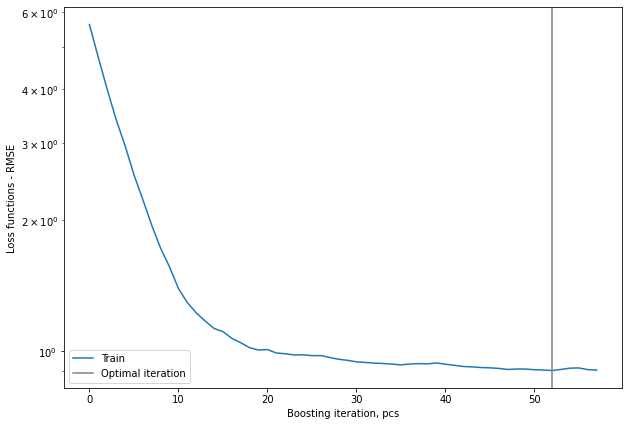

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.52
RMSE: 0.9
Relative RMSE(%):  0.128
MSE: 0.8
R square: 69.8%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 2.428
a1: 0.661
R^2: 0.701
Uncertainty
a0: 2.43+/-0.31
a1: 0.66+/-0.04


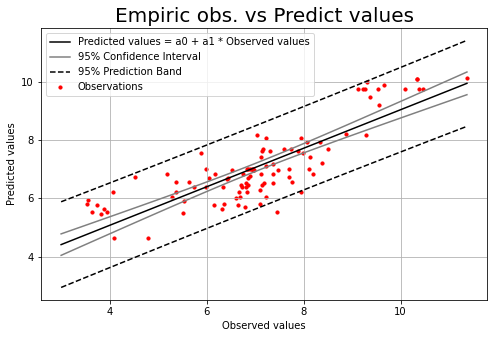

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

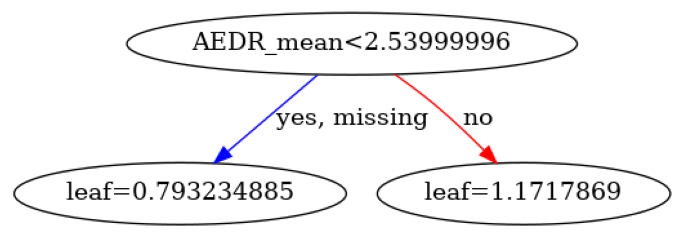

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

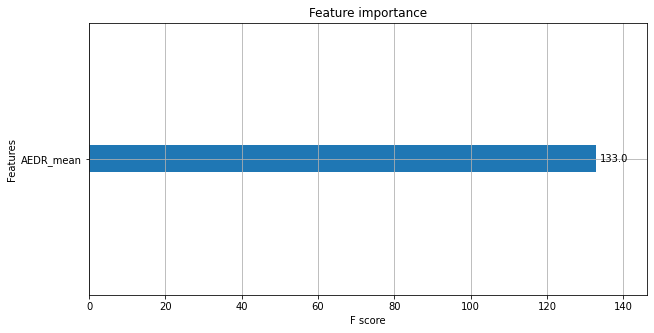

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

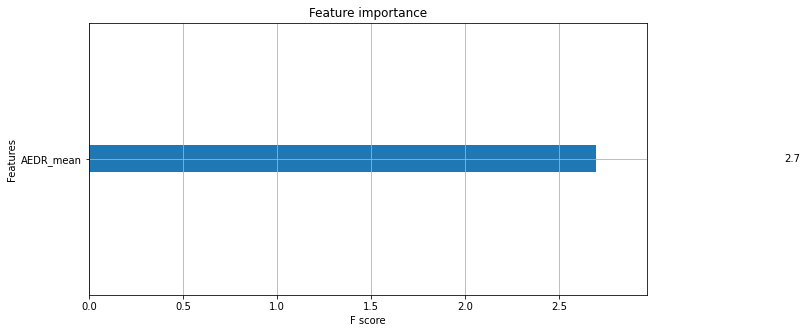

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

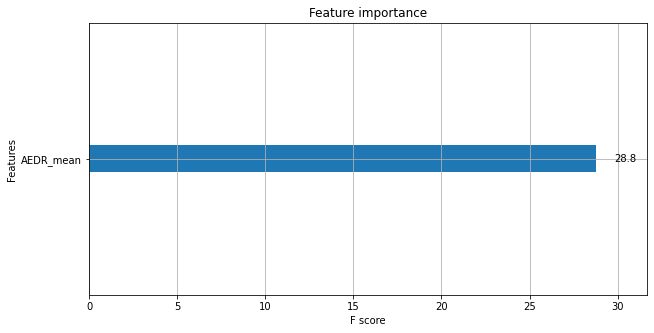

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


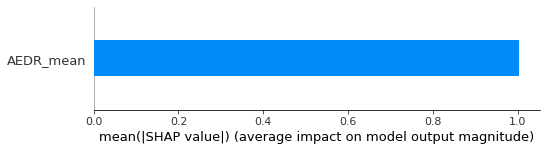

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

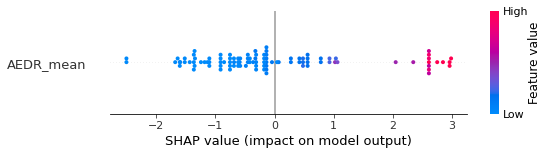

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

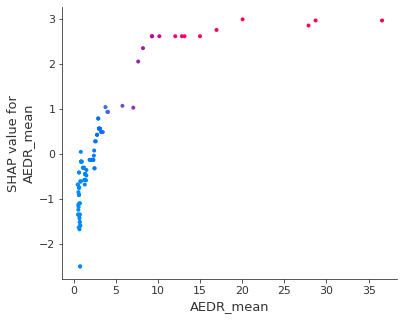

In [44]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model_AERD.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model_AERD&.txt")